İş Problemi
-----

Her bir eve ait özelliklerin ve ev fiyatlarının bulunduğu veriseti kullanılarak, farklı tipteki evlerin fiyatlarına ilişkin bir makine öğrenmesi projesi gerçekleştirilmek istenmektedir.

Veri Seti Hikayesi
-----
Ames, Lowa’daki konut evlerinden oluşan bu veri seti içerisinde 79 açıklayıcı değişken bulunduruyor. Kaggle üzerinde bir yarışması da bulunan projenin veri seti ve yarışma sayfasına aşağıdaki linkten ulaşabilirsiniz. Veri seti bir kaggle yarışmasına ait olduğundan dolayı train ve test olmak üzere iki farklı csv dosyası vardır. Test veri setinde ev fiyatları boş bırakılmış olup, bu değerleri sizin tahmin etmeniz beklenmektedir.
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation

Görev 1: Keşifçi Veri Analizi
-----

Adım 1: Train ve Test veri setlerini okutup birleştiriniz. Birleştirdiğiniz veri üzerinden ilerleyiniz.

In [158]:
import pandas as pd
import numpy as np

In [115]:
train = pd.read_csv("C:/Users/htcso/OneDrive/Masaüstü/pythonProject/machine_learning/data/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
test = pd.read_csv("C:/Users/htcso/OneDrive/Masaüstü/pythonProject/machine_learning/data/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [117]:
train.shape

(1460, 81)

In [118]:
test.shape

(1459, 80)

In [119]:
df = pd.concat([train, test])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [120]:
df.shape

(2919, 81)

Adım 2: Numerik ve kategorik değişkenleri yakalayınız.

In [121]:
import EDA as eda

In [122]:
cat_cols, num_cols, cat_but_car = eda.grab_col_names(df, cat_th = 10, car_th = 30)

Observations: 2919
Variables: 81
Cat_cols: 53
num_cols: 28
cat_but_car: 0
num_bat_cat: 10


Adım 3: Gerekli düzenlemeleri yapınız. (Tip hatası olan değişkenler gibi)

In [123]:
df[cat_cols]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,YrSold
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5,1.0,0.0,2,1,3,1,0,2.0,2008
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,8,0.0,1.0,2,0,3,1,1,2.0,2007
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5,1.0,0.0,2,1,3,1,1,2.0,2008
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,5,1.0,0.0,1,0,3,1,1,3.0,2006
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,5,1.0,0.0,2,1,4,1,1,3.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal,7,0.0,0.0,1,1,3,1,0,0.0,2006
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,5,0.0,0.0,1,1,3,1,0,1.0,2006
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,7,1.0,0.0,1,0,4,1,1,2.0,2006
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,5,0.0,1.0,1,0,3,1,0,0.0,2006


In [124]:
df[cat_cols].dtypes

MSZoning          object
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinType2      object
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
KitchenQual       object
Functional        object
FireplaceQu       object
GarageType        object
GarageFinish      object
GarageQual        object
GarageCond        object
PavedDrive        object
PoolQC            object
Fence             object


In [125]:
# cat but num
df[cat_cols].select_dtypes(["int64", "float64"]).nunique()

OverallCond     9
BsmtFullBath    4
BsmtHalfBath    3
FullBath        5
HalfBath        3
BedroomAbvGr    8
KitchenAbvGr    4
Fireplaces      5
GarageCars      6
YrSold          5
dtype: int64

In [126]:
cn = df[cat_cols].select_dtypes(["int64", "float64"]).nunique().index.tolist()
cn

['OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'YrSold']

In [127]:
cat_cols = [col for col in cat_cols if col not in cn]

In [128]:
num_cols = num_cols + cn

In [129]:
df[num_cols].nunique().sort_values(ascending=False)

Id               2919
LotArea          1951
GrLivArea        1292
BsmtUnfSF        1135
1stFlrSF         1083
TotalBsmtSF      1058
BsmtFinSF1        991
SalePrice         663
2ndFlrSF          635
GarageArea        603
MasVnrArea        444
WoodDeckSF        379
BsmtFinSF2        272
OpenPorchSF       252
EnclosedPorch     183
LotFrontage       128
ScreenPorch       121
YearBuilt         118
GarageYrBlt       103
YearRemodAdd       61
MiscVal            38
LowQualFinSF       36
3SsnPorch          31
MSSubClass         16
PoolArea           14
TotRmsAbvGrd       14
MoSold             12
OverallQual        10
OverallCond         9
BedroomAbvGr        8
GarageCars          6
Fireplaces          5
YrSold              5
FullBath            5
KitchenAbvGr        4
BsmtFullBath        4
HalfBath            3
BsmtHalfBath        3
dtype: int64

Adım 4: Numerik ve kategorik değişkenlerin veri içindeki dağılımını gözlemleyiniz.

         MSZoning      Ratio
RL           2265  77.595067
RM            460  15.758822
FV            139   4.761905
RH             26   0.890716
C (all)        25   0.856458
######################################


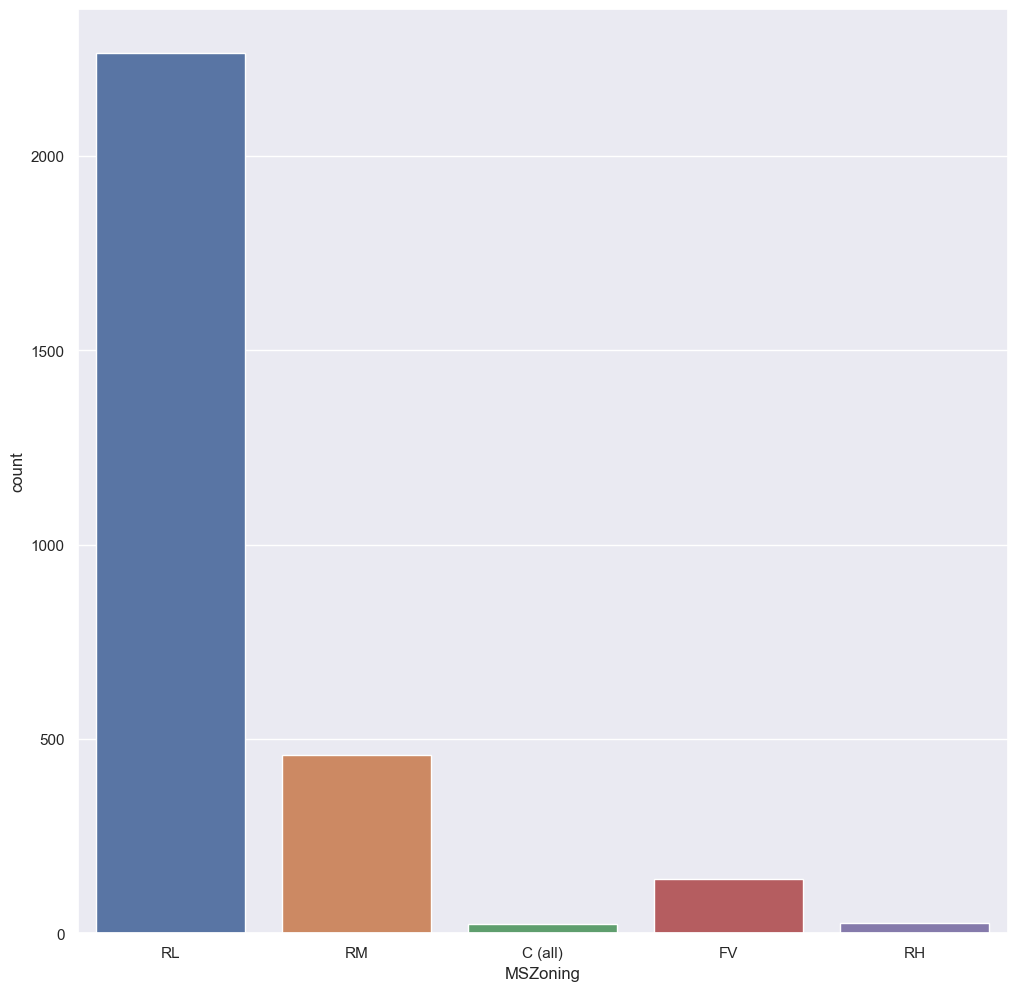

      Street    Ratio
Pave    2907  99.5889
Grvl      12   0.4111
######################################


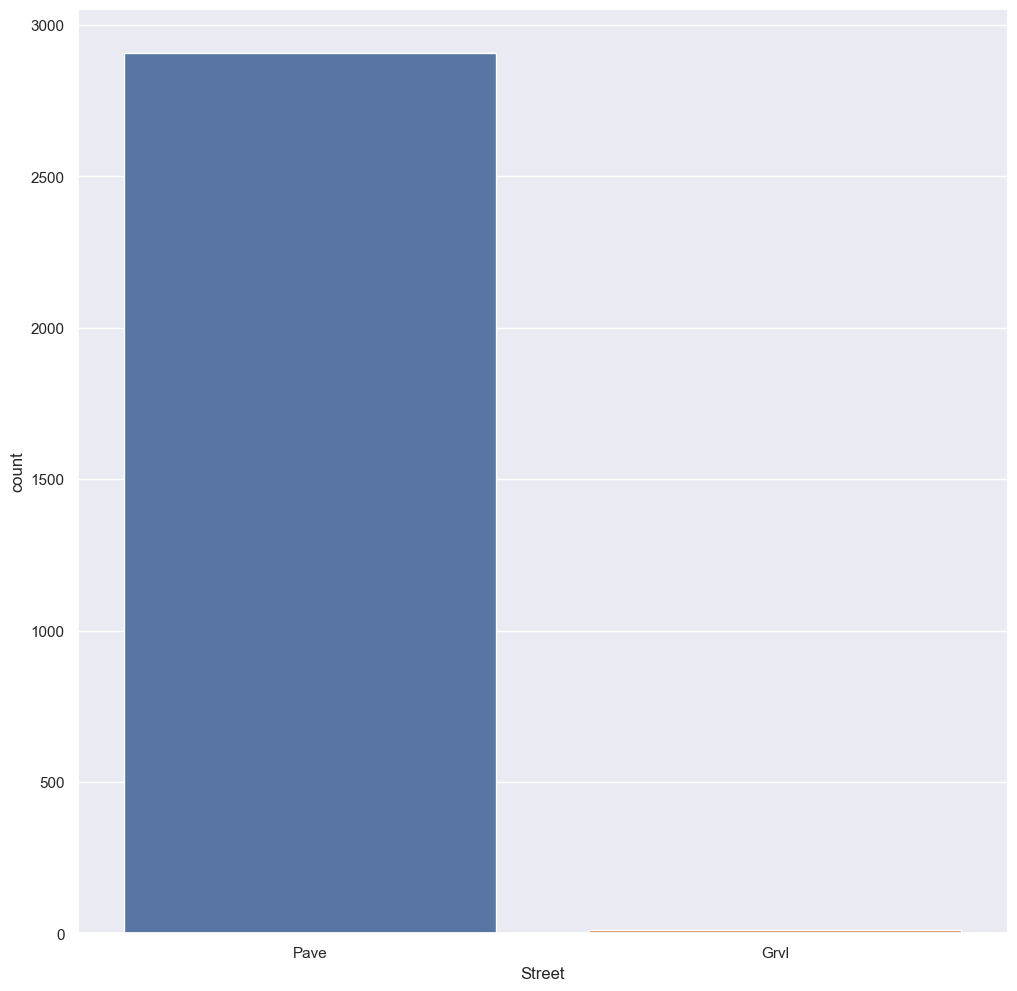

      Alley     Ratio
Grvl    120  4.110997
Pave     78  2.672148
######################################


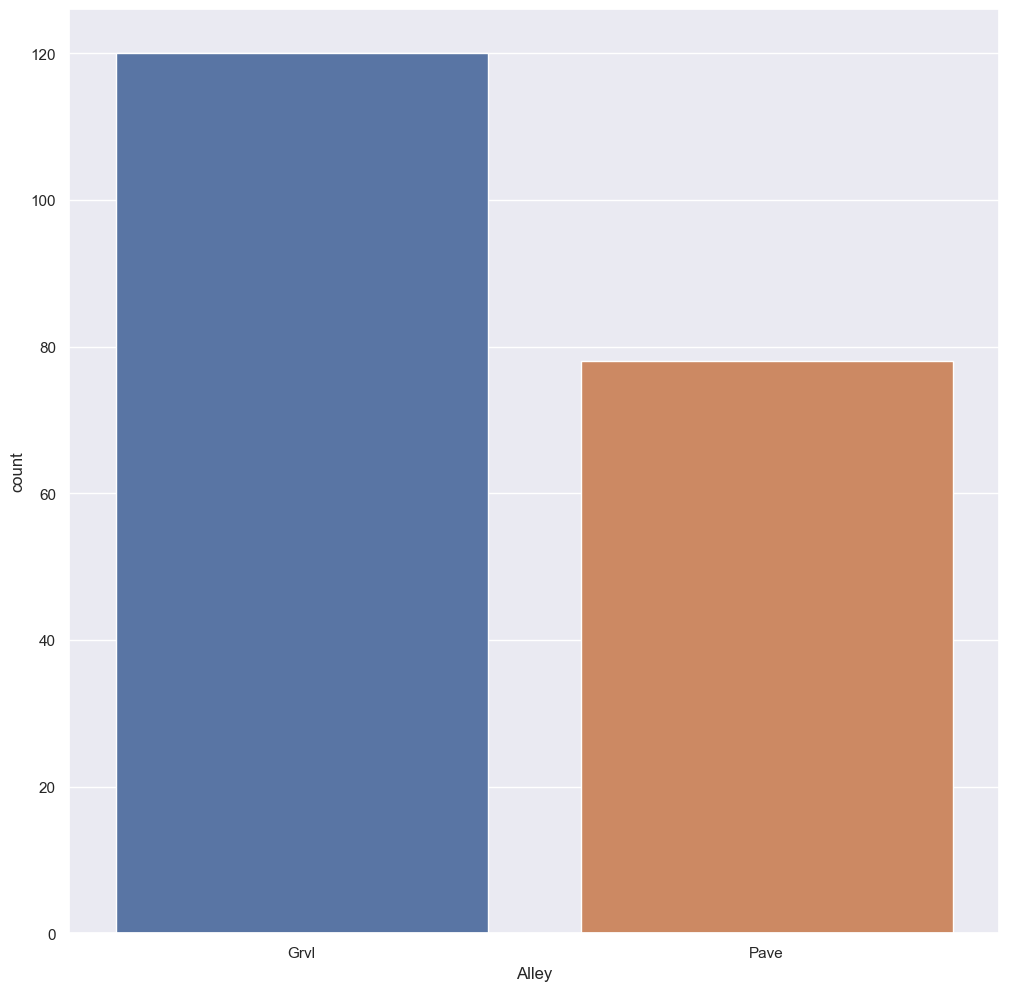

     LotShape      Ratio
Reg      1859  63.686194
IR1       968  33.162042
IR2        76   2.603631
IR3        16   0.548133
######################################


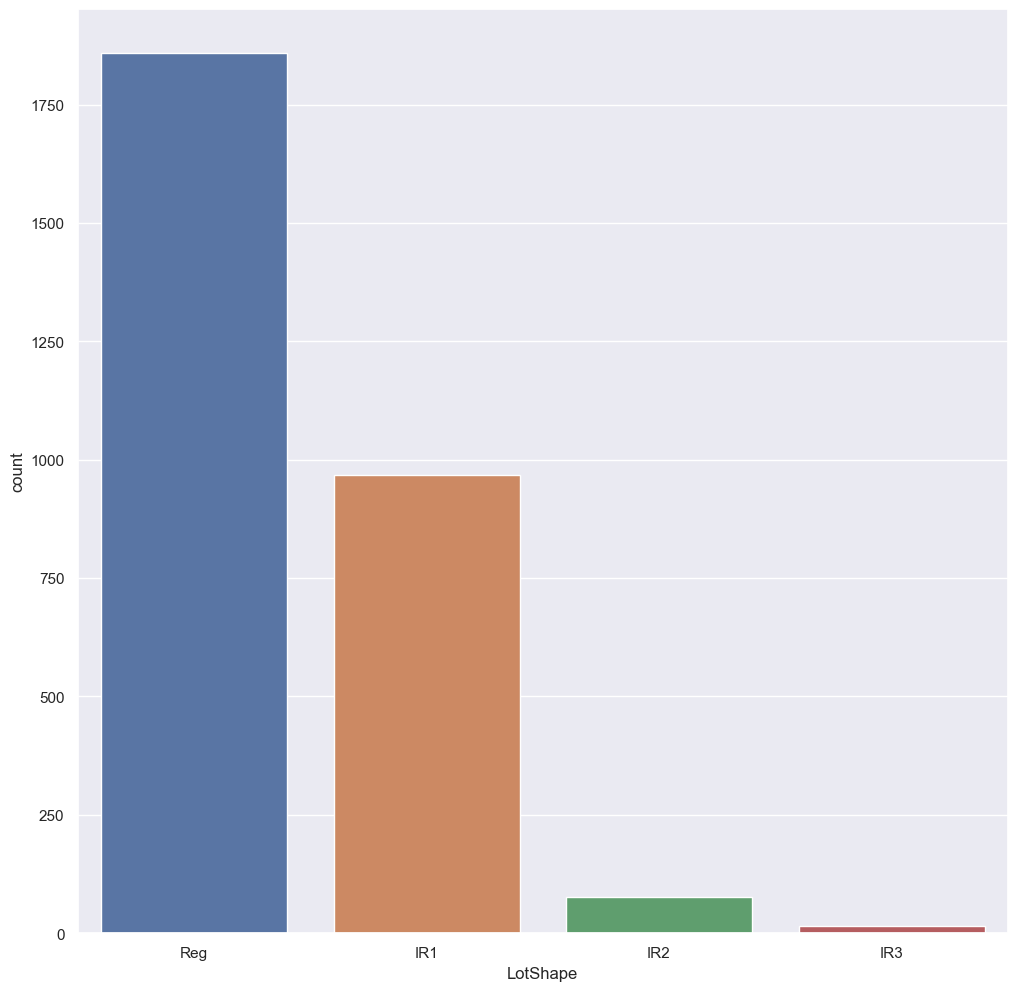

     LandContour      Ratio
Lvl         2622  89.825283
HLS          120   4.110997
Bnk          117   4.008222
Low           60   2.055498
######################################


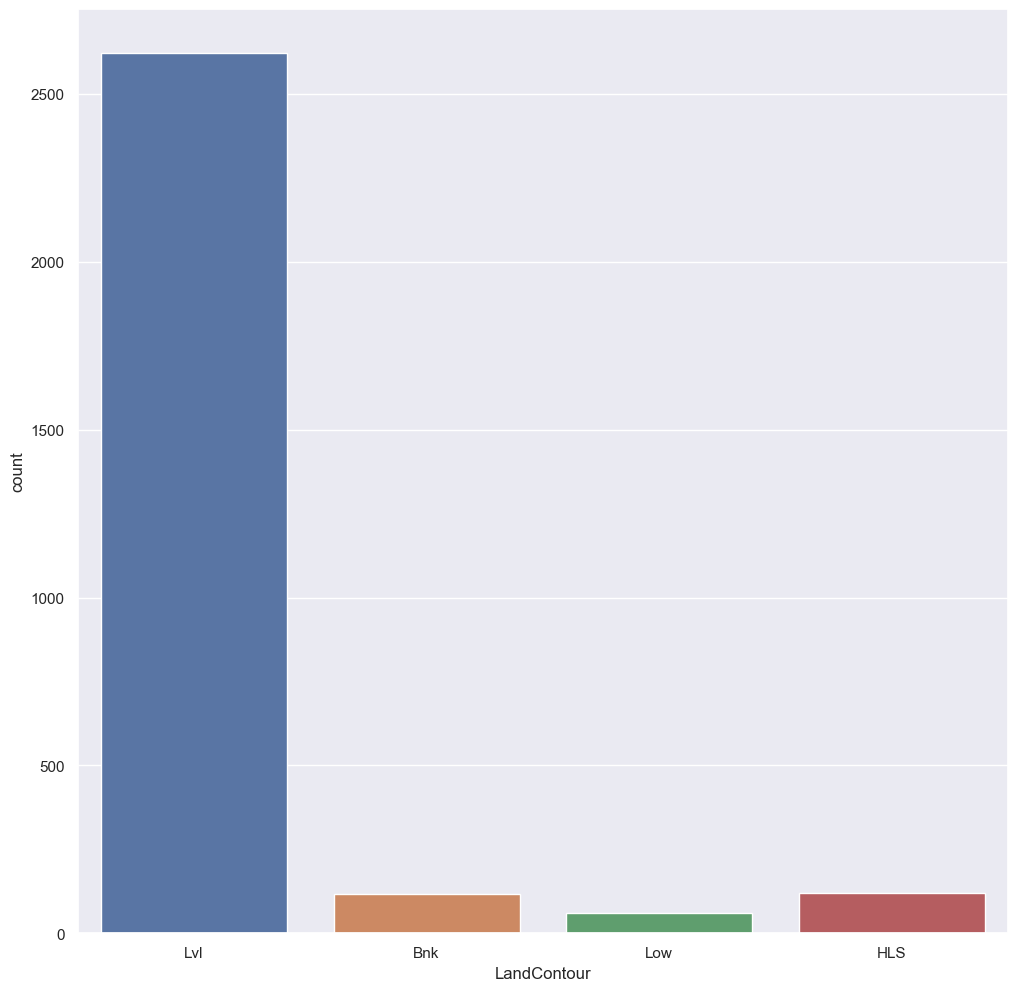

        Utilities      Ratio
AllPub       2916  99.897225
NoSeWa          1   0.034258
######################################


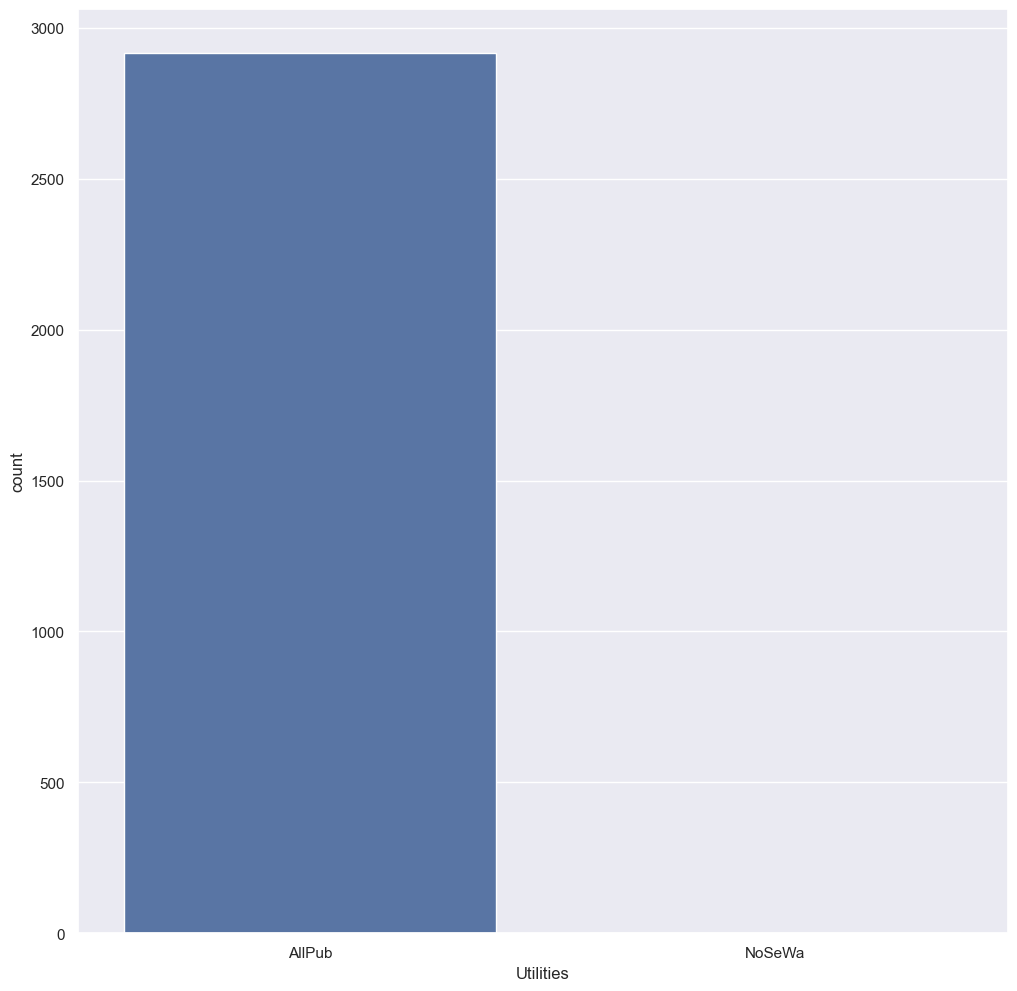

         LotConfig      Ratio
Inside        2133  73.072970
Corner         511  17.505995
CulDSac        176   6.029462
FR2             85   2.911956
FR3             14   0.479616
######################################


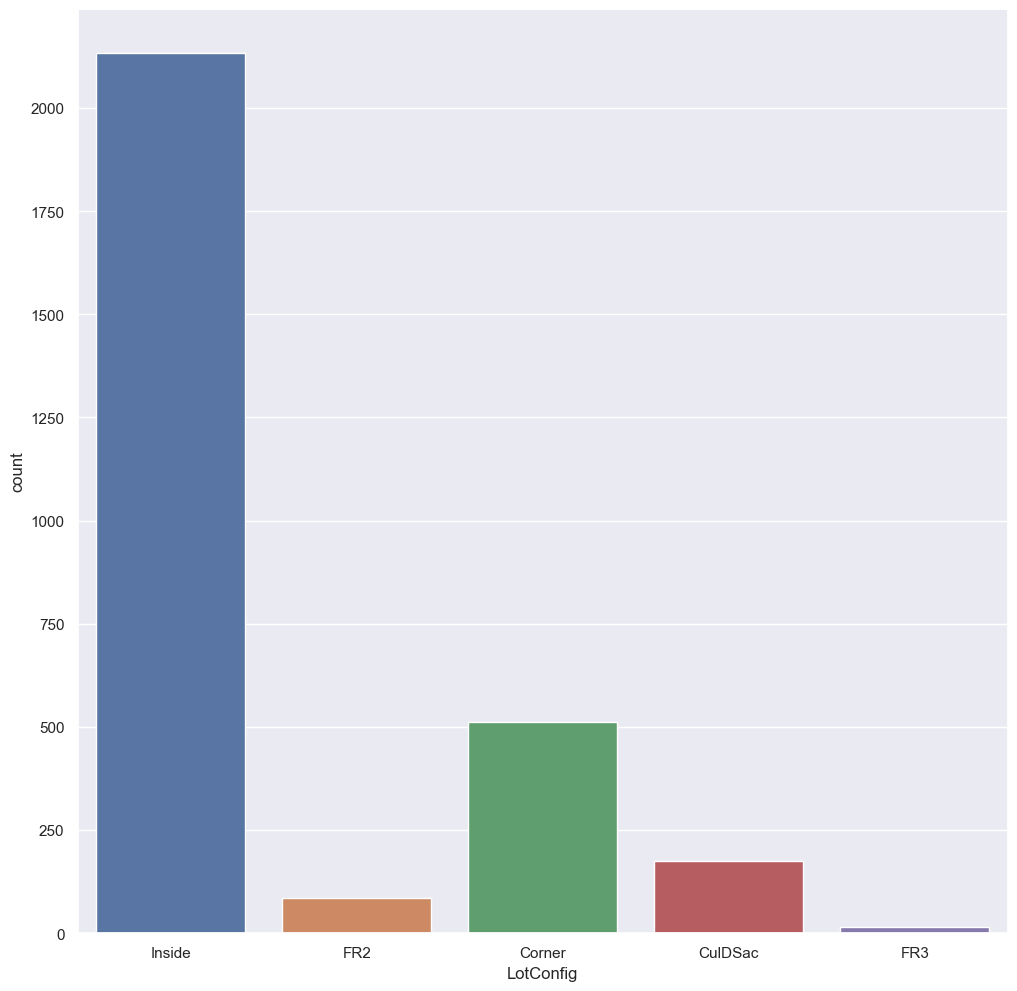

     LandSlope      Ratio
Gtl       2778  95.169579
Mod        125   4.282288
Sev         16   0.548133
######################################


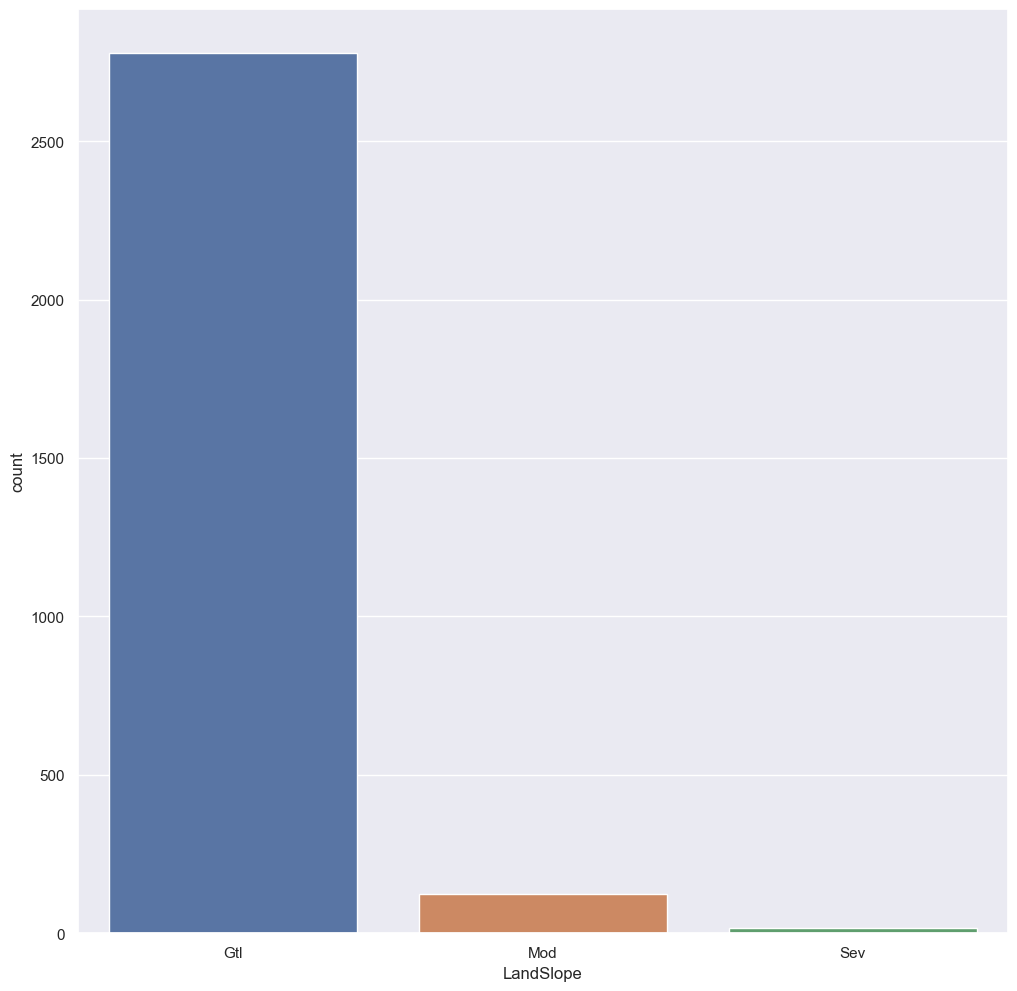

         Neighborhood      Ratio
NAmes             443  15.176430
CollgCr           267   9.146968
OldTown           239   8.187736
Edwards           194   6.646112
Somerst           182   6.235012
NridgHt           166   5.686879
Gilbert           165   5.652621
Sawyer            151   5.173004
NWAmes            131   4.487838
SawyerW           125   4.282288
Mitchel           114   3.905447
BrkSide           108   3.699897
Crawfor           103   3.528606
IDOTRR             93   3.186023
Timber             72   2.466598
NoRidge            71   2.432340
StoneBr            51   1.747174
SWISU              48   1.644399
ClearCr            44   1.507366
MeadowV            37   1.267557
BrDale             30   1.027749
Blmngtn            28   0.959233
Veenker            24   0.822199
NPkVill            23   0.787941
Blueste            10   0.342583
######################################


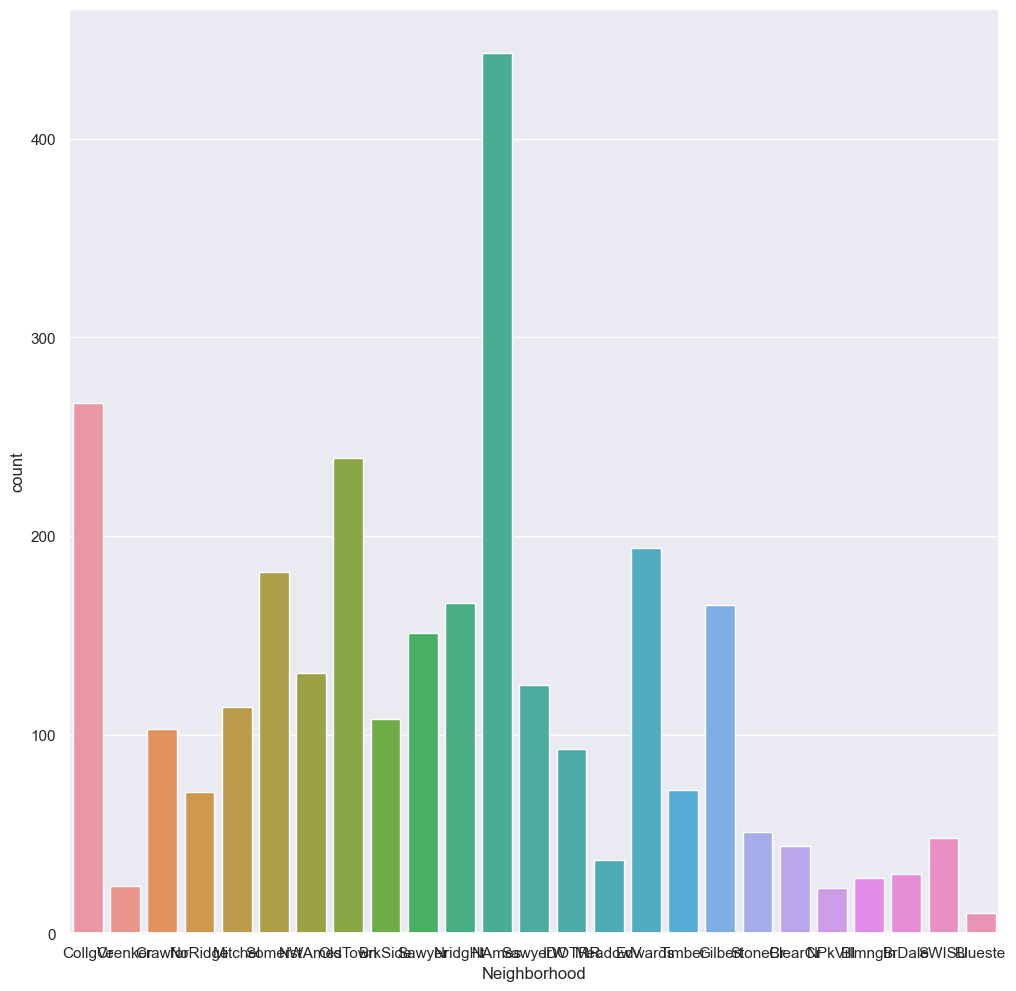

        Condition1      Ratio
Norm          2511  86.022610
Feedr          164   5.618362
Artery          92   3.151764
RRAn            50   1.712915
PosN            39   1.336074
RRAe            28   0.959233
PosA            20   0.685166
RRNn             9   0.308325
RRNe             6   0.205550
######################################


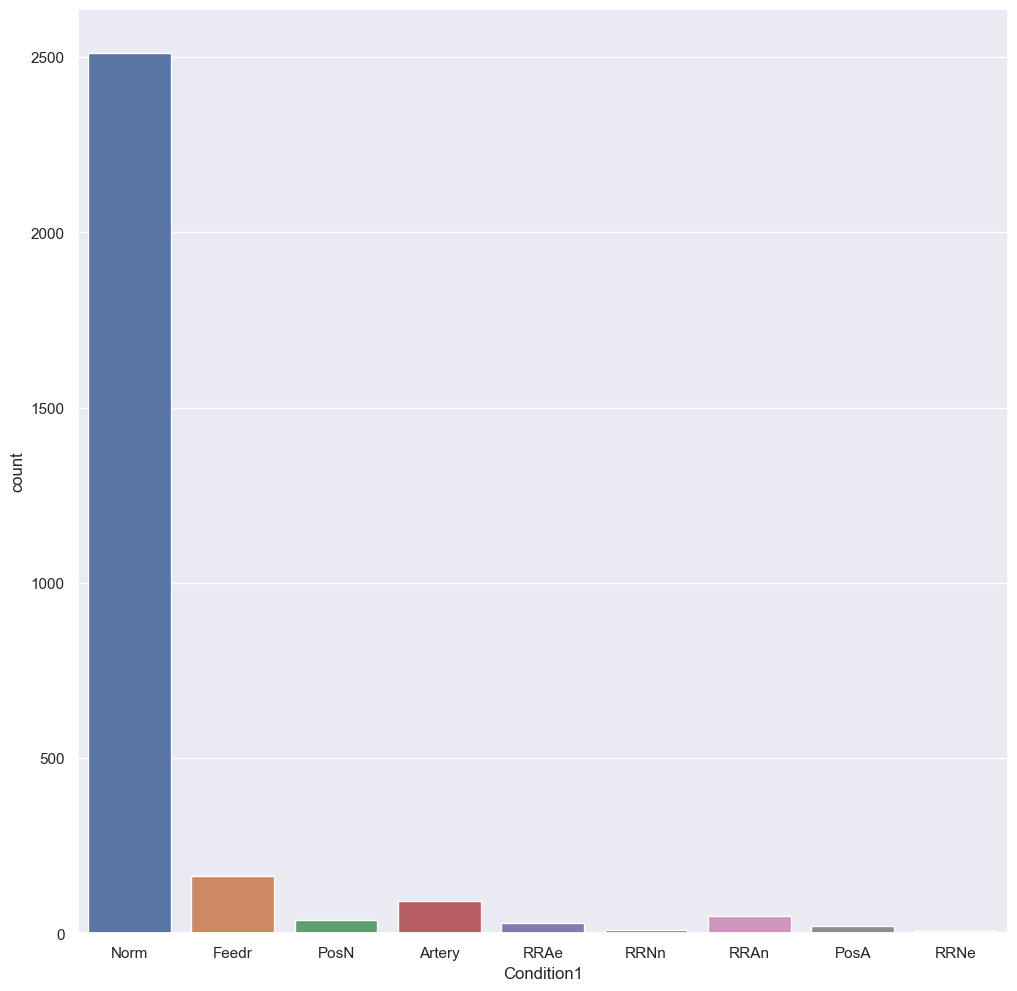

        Condition2      Ratio
Norm          2889  98.972251
Feedr           13   0.445358
Artery           5   0.171292
PosN             4   0.137033
PosA             4   0.137033
RRNn             2   0.068517
RRAn             1   0.034258
RRAe             1   0.034258
######################################


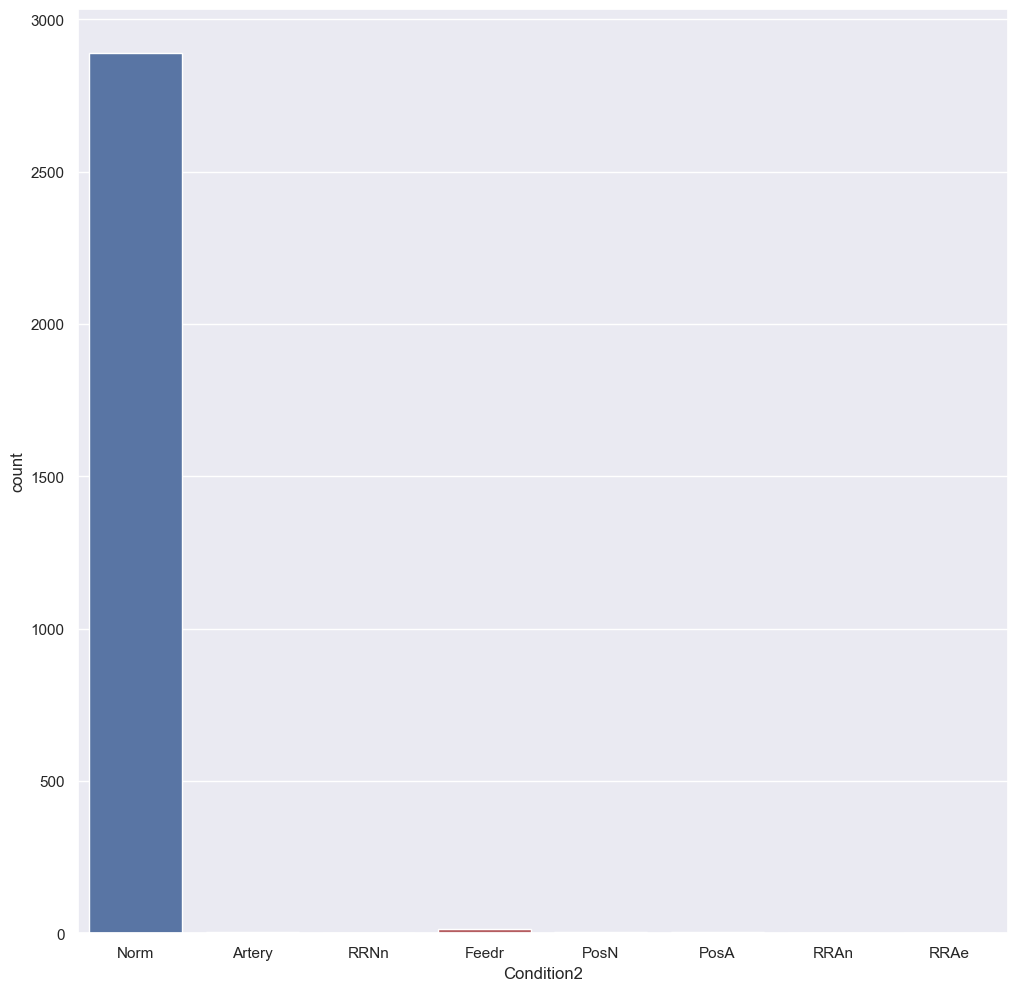

        BldgType      Ratio
1Fam        2425  83.076396
TwnhsE       227   7.776636
Duplex       109   3.734156
Twnhs         96   3.288798
2fmCon        62   2.124015
######################################


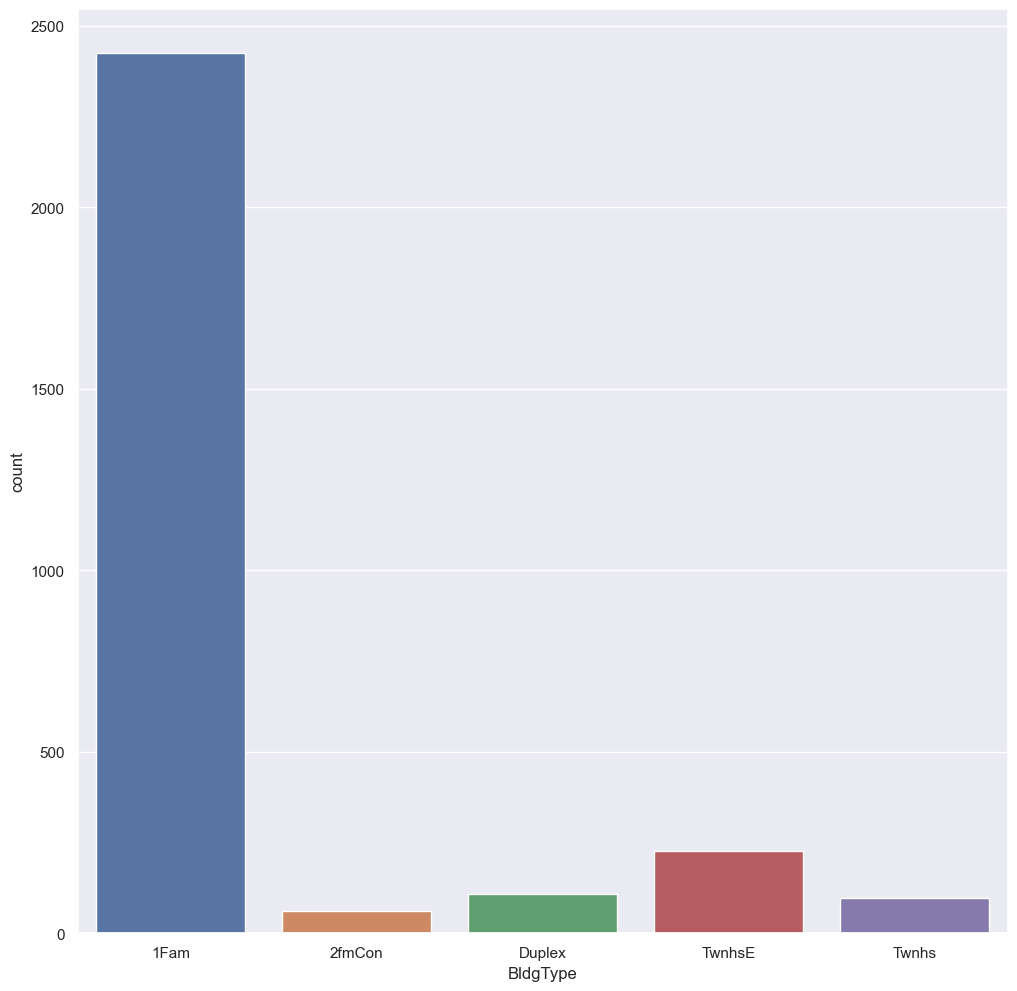

        HouseStyle      Ratio
1Story        1471  50.393971
2Story         872  29.873244
1.5Fin         314  10.757109
SLvl           128   4.385063
SFoyer          83   2.843440
2.5Unf          24   0.822199
1.5Unf          19   0.650908
2.5Fin           8   0.274066
######################################


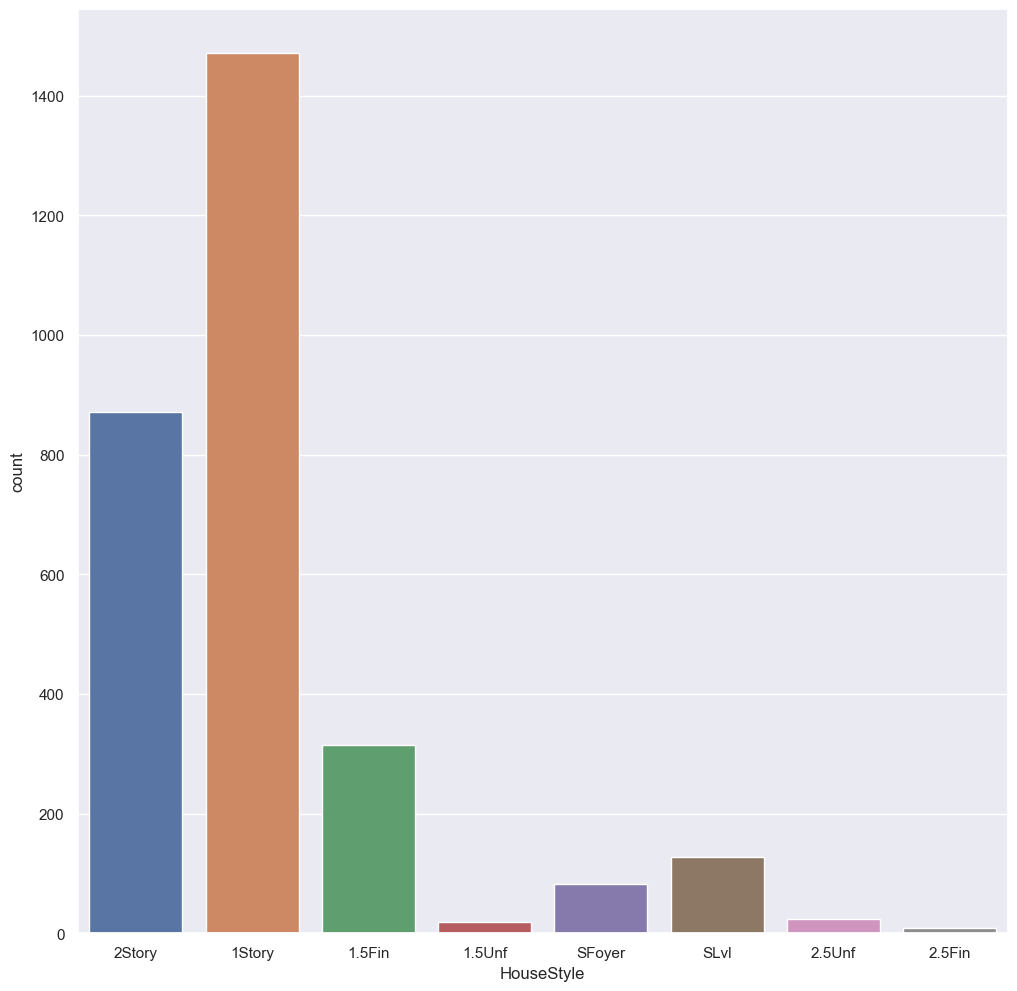

         RoofStyle      Ratio
Gable         2310  79.136691
Hip            551  18.876328
Gambrel         22   0.753683
Flat            20   0.685166
Mansard         11   0.376841
Shed             5   0.171292
######################################


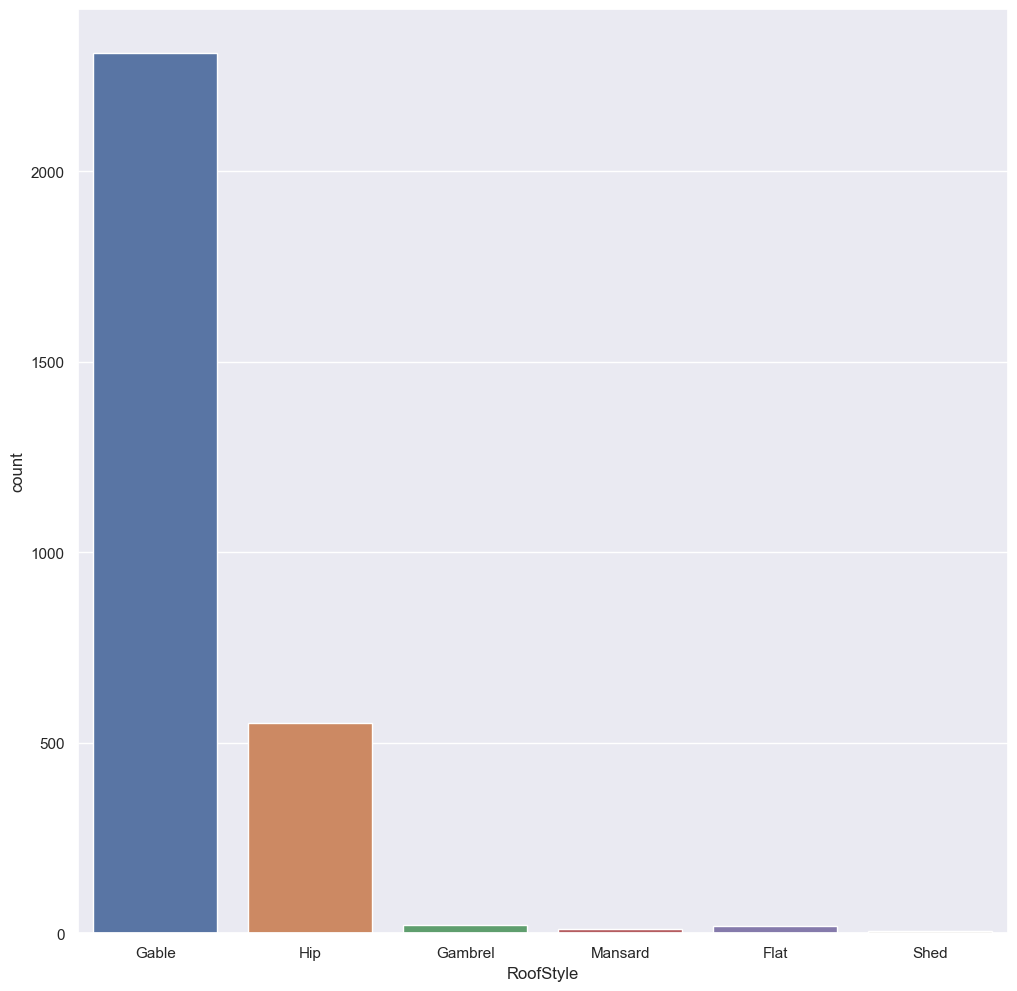

         RoofMatl      Ratio
CompShg      2876  98.526893
Tar&Grv        23   0.787941
WdShake         9   0.308325
WdShngl         7   0.239808
Metal           1   0.034258
Membran         1   0.034258
Roll            1   0.034258
ClyTile         1   0.034258
######################################


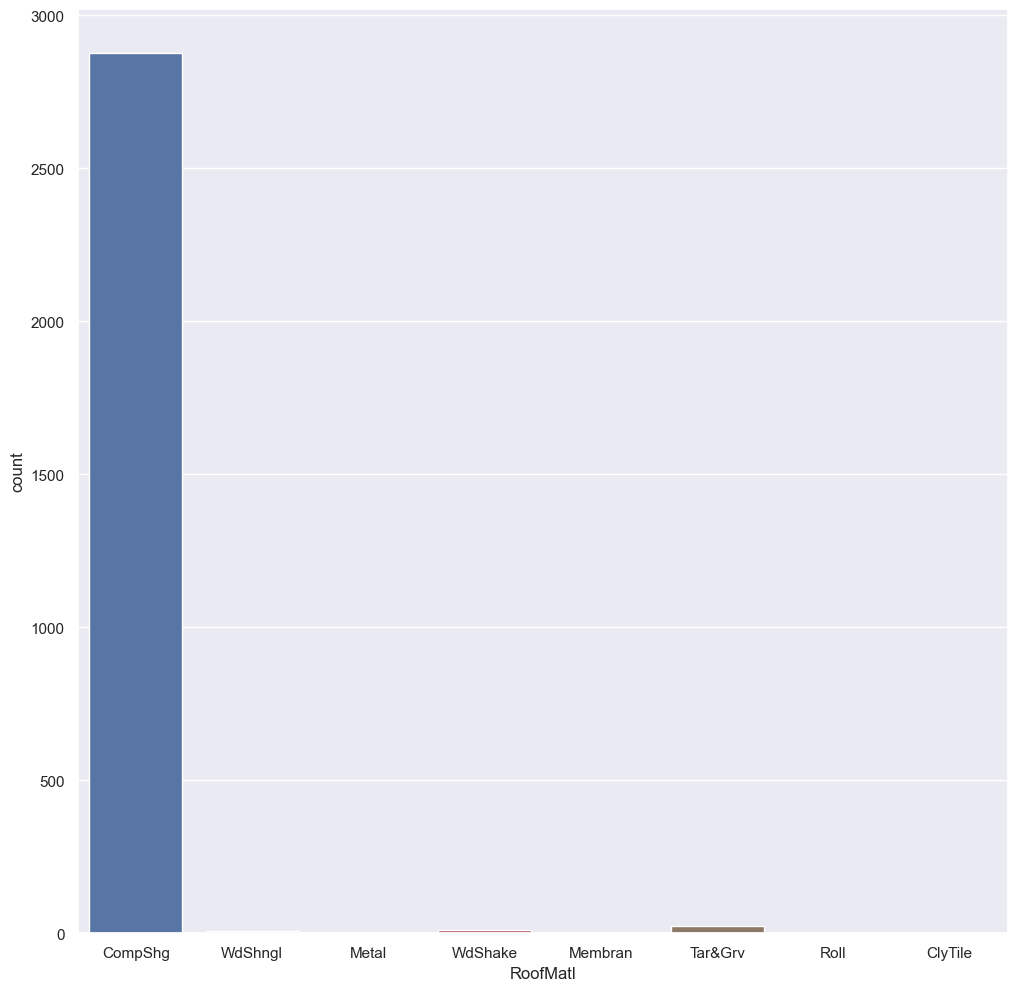

         Exterior1st      Ratio
VinylSd         1025  35.114765
MetalSd          450  15.416238
HdBoard          442  15.142172
Wd Sdng          411  14.080164
Plywood          221   7.571086
CemntBd          126   4.316547
BrkFace           87   2.980473
WdShing           56   1.918465
AsbShng           44   1.507366
Stucco            43   1.473107
BrkComm            6   0.205550
AsphShn            2   0.068517
Stone              2   0.068517
CBlock             2   0.068517
ImStucc            1   0.034258
######################################


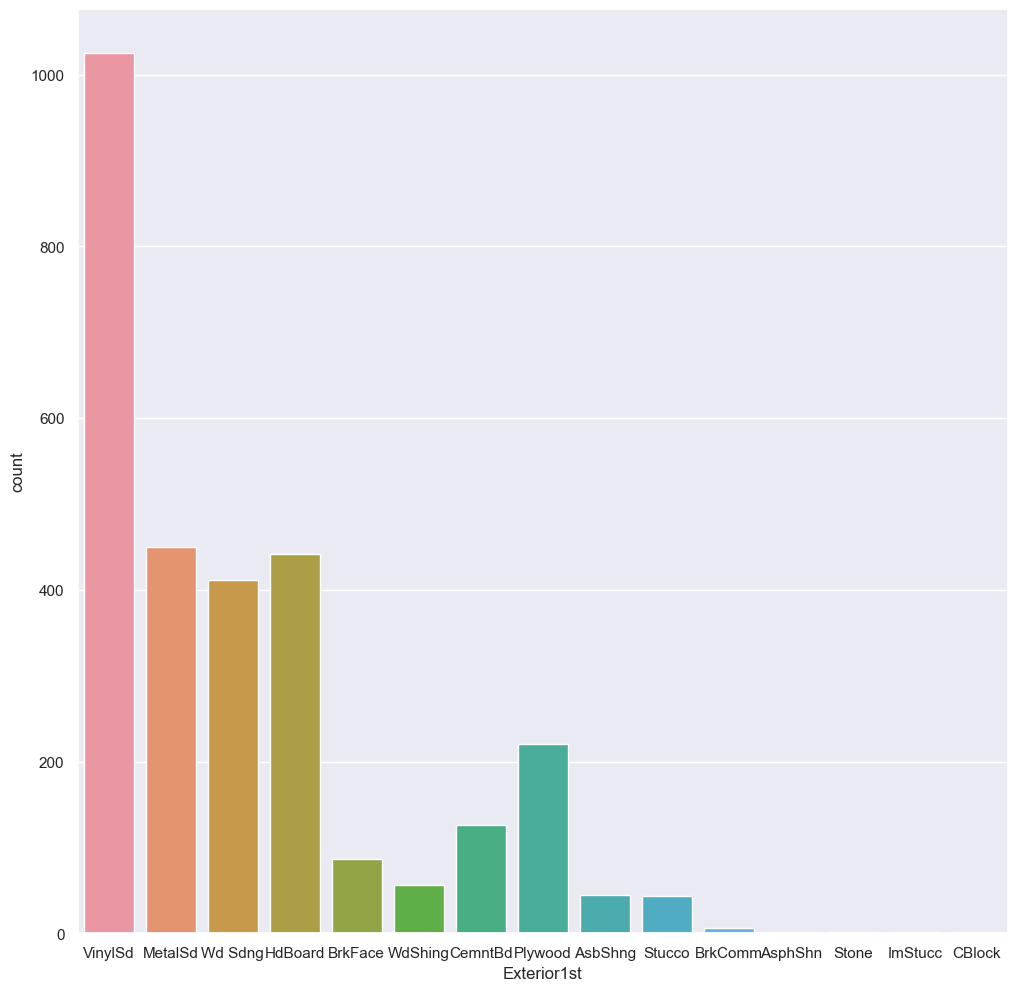

         Exterior2nd      Ratio
VinylSd         1014  34.737924
MetalSd          447  15.313464
HdBoard          406  13.908873
Wd Sdng          391  13.394998
Plywood          270   9.249743
CmentBd          126   4.316547
Wd Shng           81   2.774923
BrkFace           47   1.610140
Stucco            47   1.610140
AsbShng           38   1.301816
Brk Cmn           22   0.753683
ImStucc           15   0.513875
Stone              6   0.205550
AsphShn            4   0.137033
CBlock             3   0.102775
Other              1   0.034258
######################################


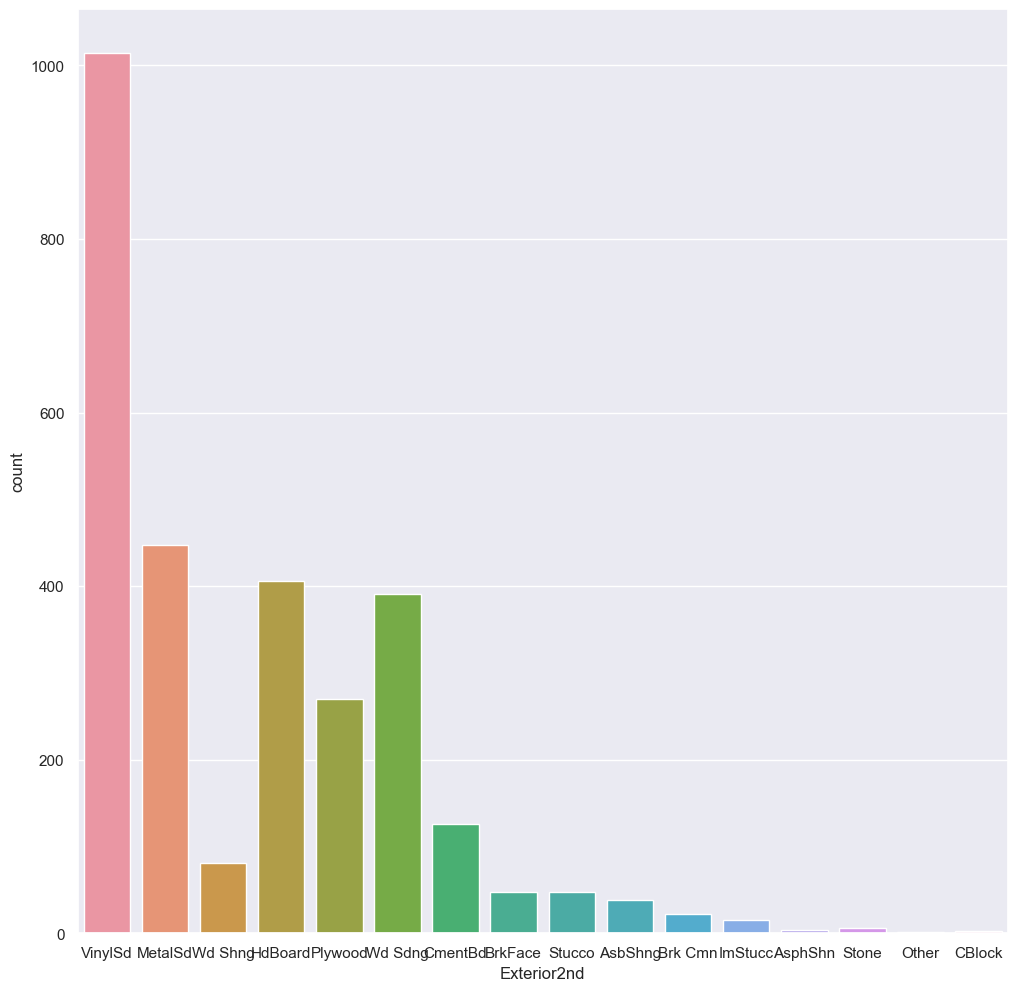

         MasVnrType      Ratio
None           1742  59.677972
BrkFace         879  30.113052
Stone           249   8.530319
BrkCmn           25   0.856458
######################################


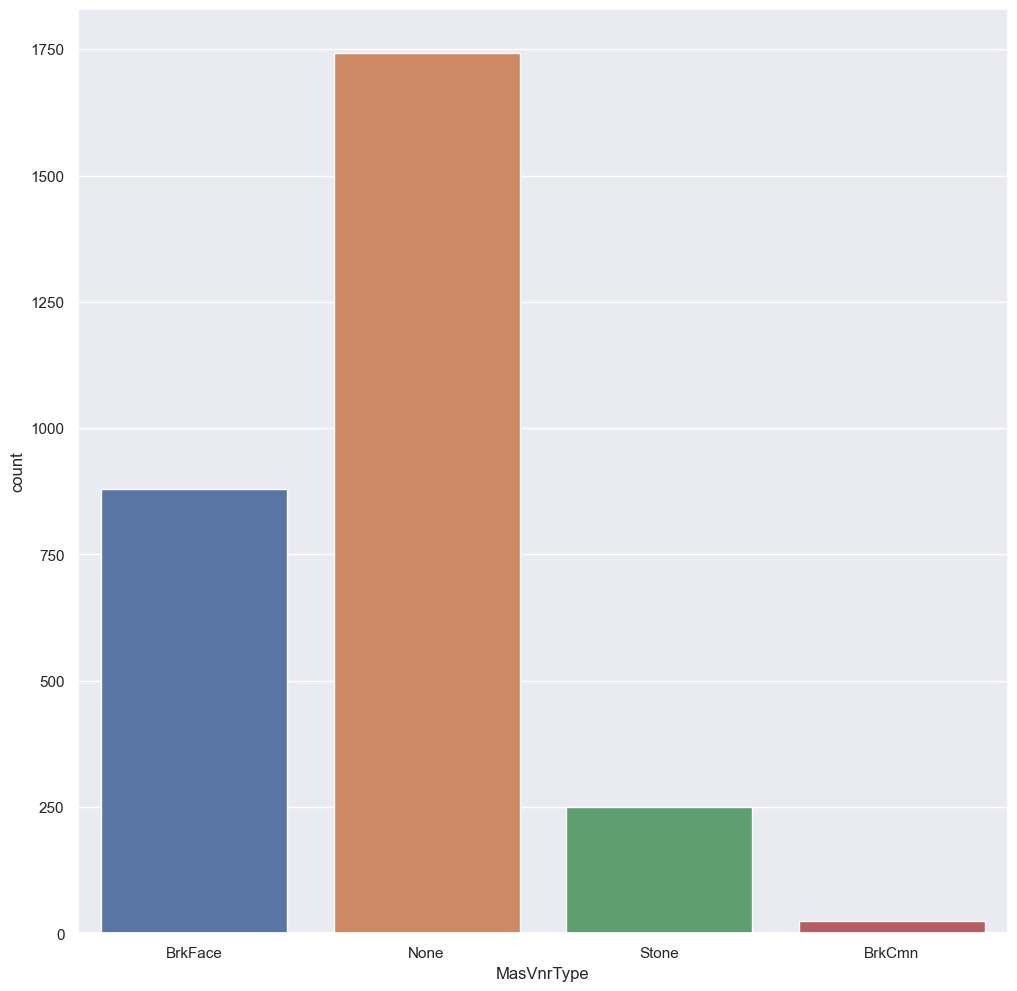

    ExterQual      Ratio
TA       1798  61.596437
Gd        979  33.538883
Ex        107   3.665639
Fa         35   1.199041
######################################


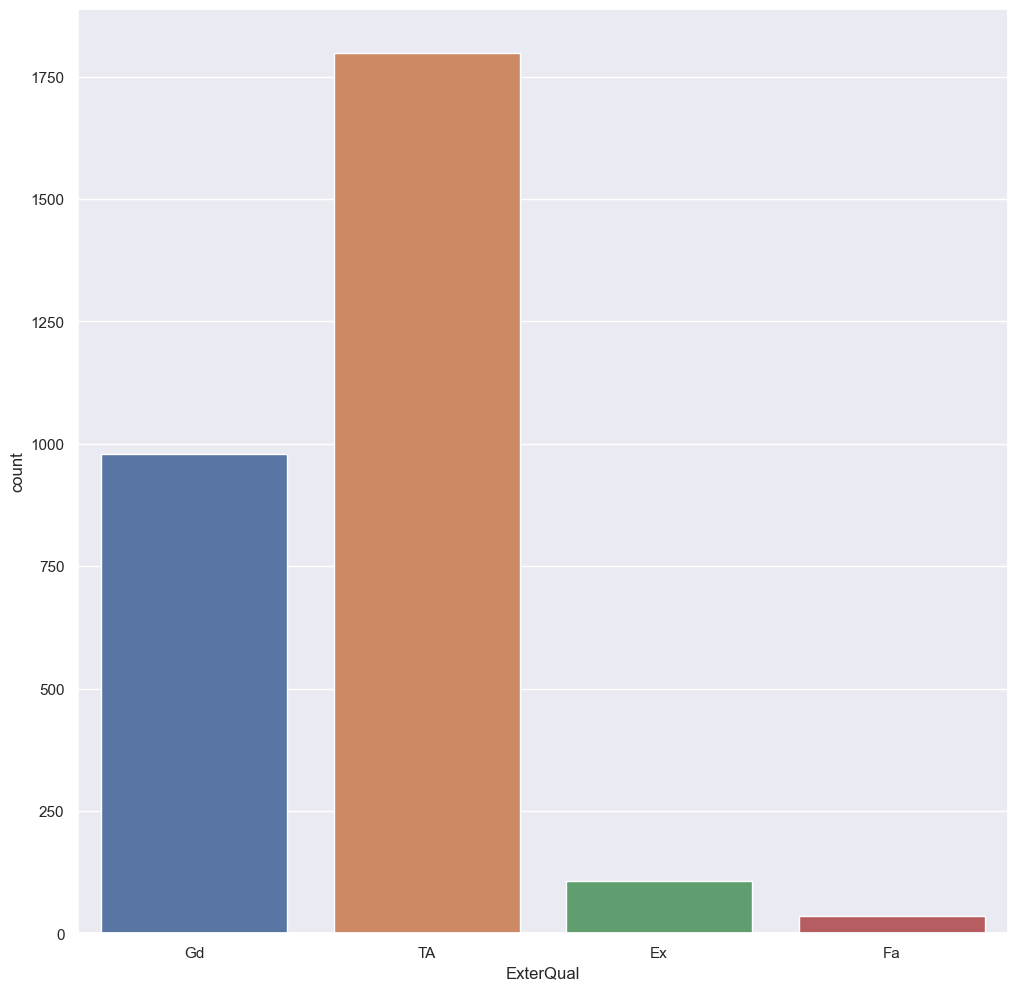

    ExterCond      Ratio
TA       2538  86.947585
Gd        299  10.243234
Fa         67   2.295307
Ex         12   0.411100
Po          3   0.102775
######################################


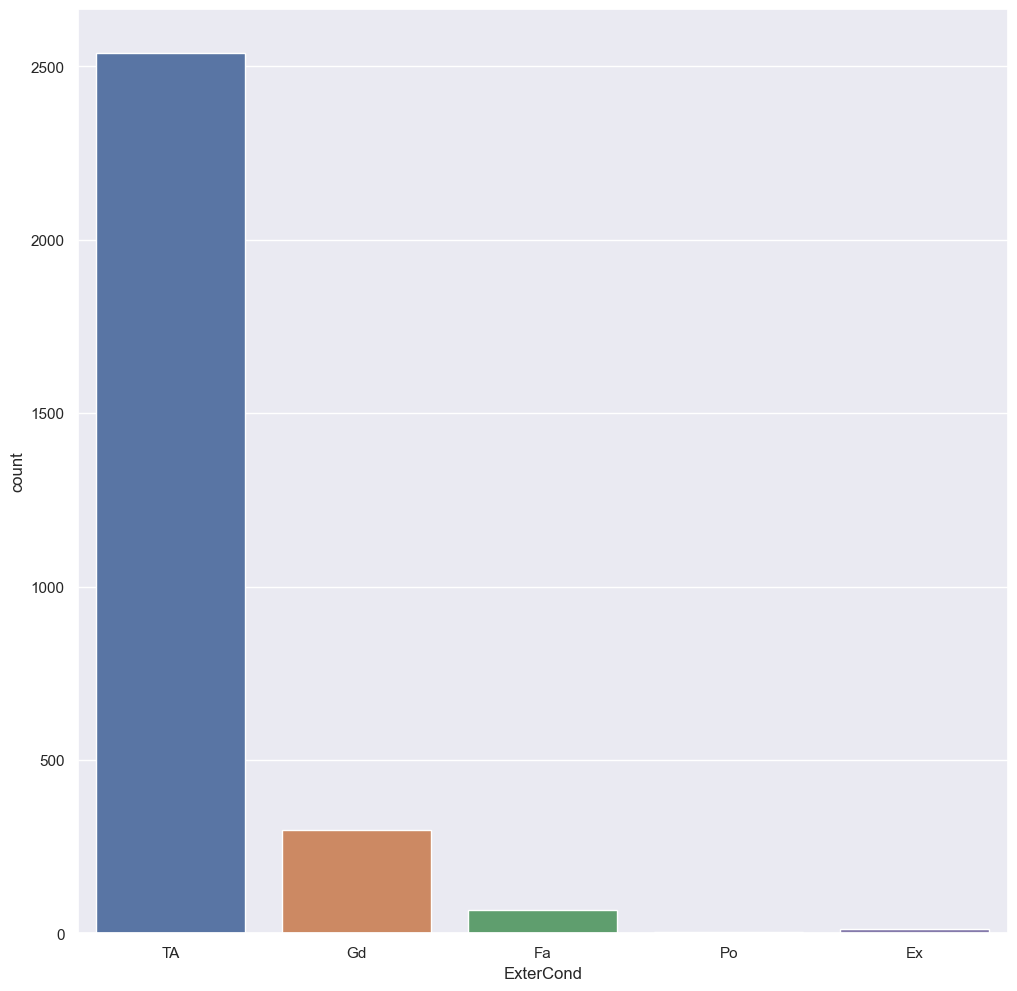

        Foundation      Ratio
PConc         1308  44.809866
CBlock        1235  42.309010
BrkTil         311  10.654334
Slab            49   1.678657
Stone           11   0.376841
Wood             5   0.171292
######################################


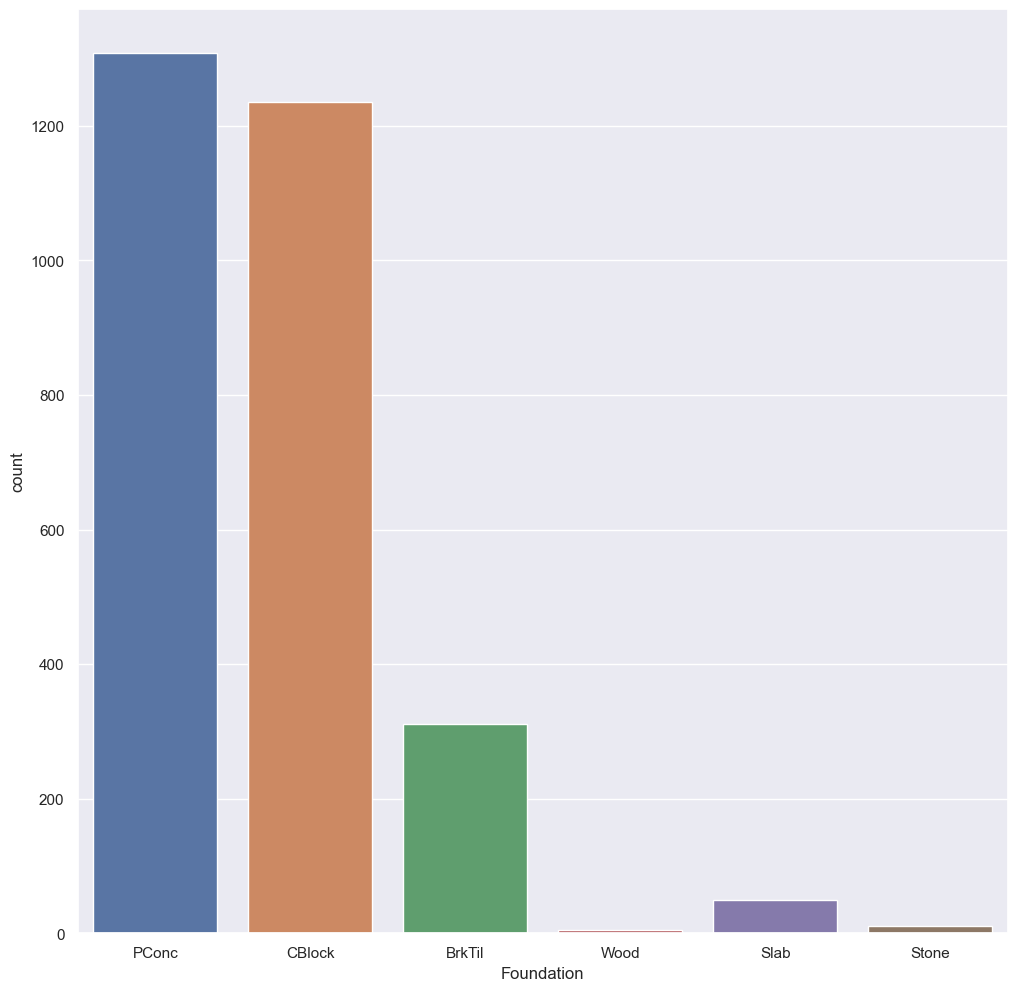

    BsmtQual      Ratio
TA      1283  43.953409
Gd      1209  41.418294
Ex       258   8.838643
Fa        88   3.014731
######################################


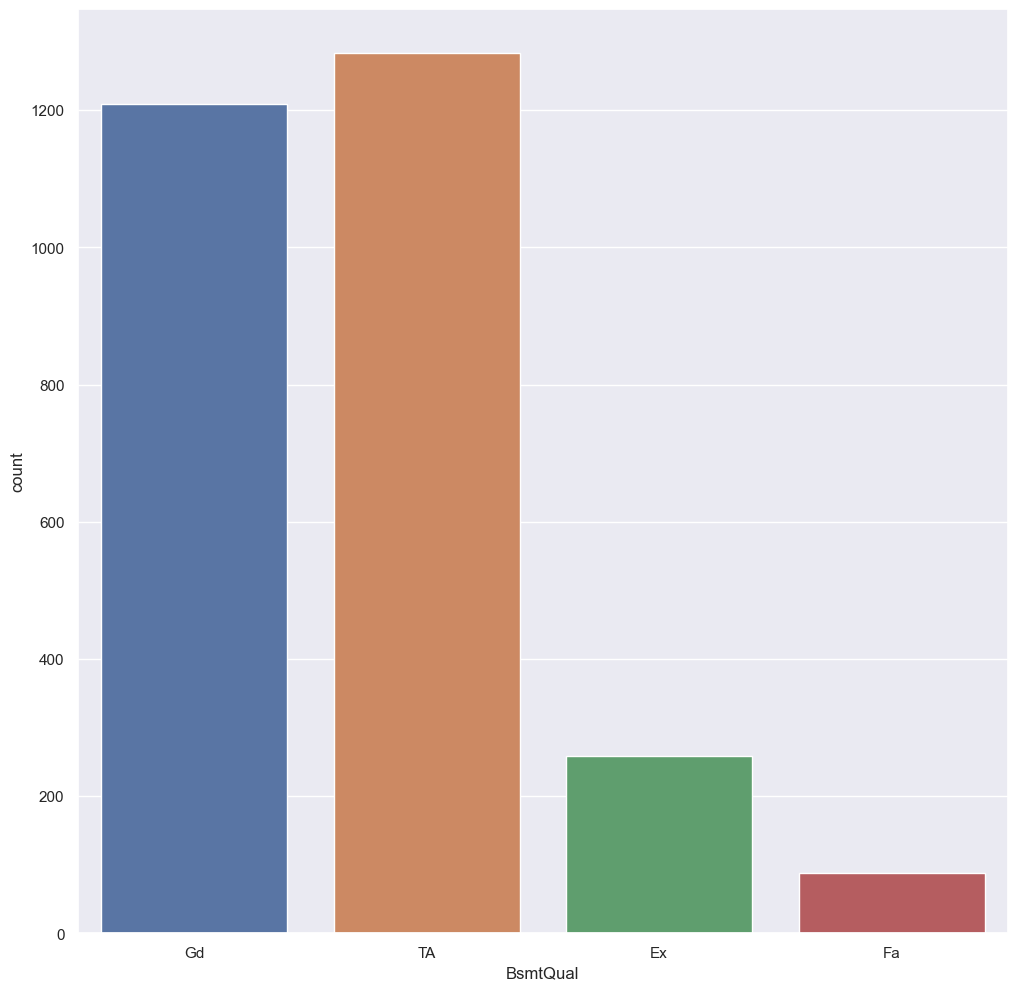

    BsmtCond      Ratio
TA      2606  89.277150
Gd       122   4.179514
Fa       104   3.562864
Po         5   0.171292
######################################


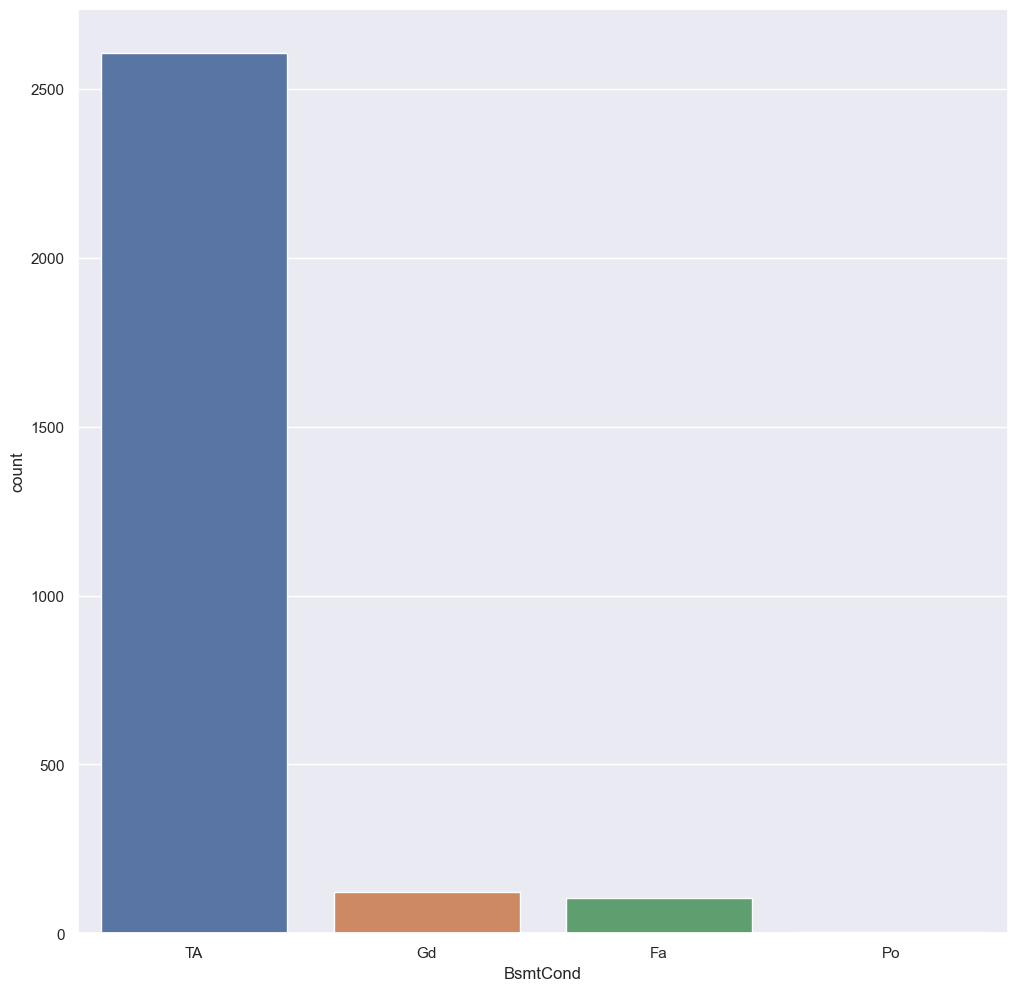

    BsmtExposure      Ratio
No          1904  65.227818
Av           418  14.319973
Gd           276   9.455293
Mn           239   8.187736
######################################


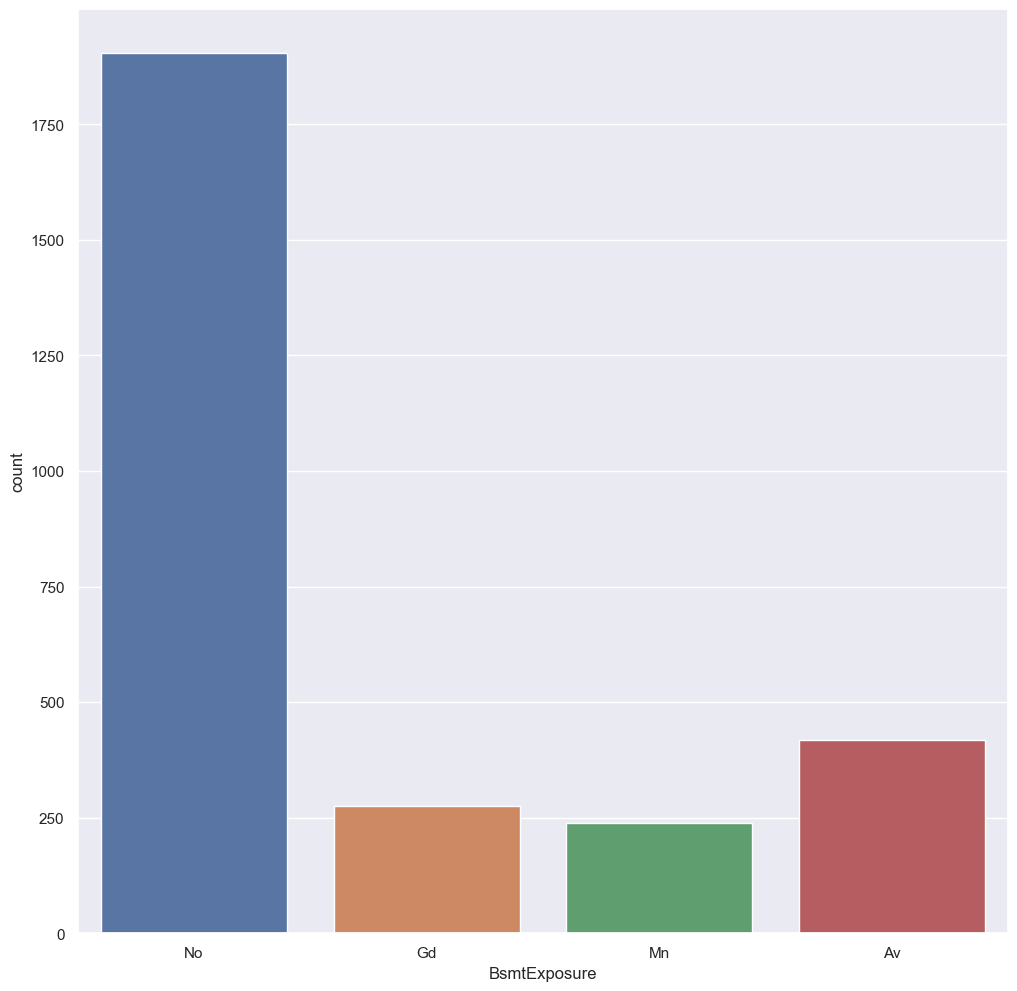

     BsmtFinType1      Ratio
Unf           851  29.153820
GLQ           849  29.085303
ALQ           429  14.696814
Rec           288   9.866393
BLQ           269   9.215485
LwQ           154   5.275779
######################################


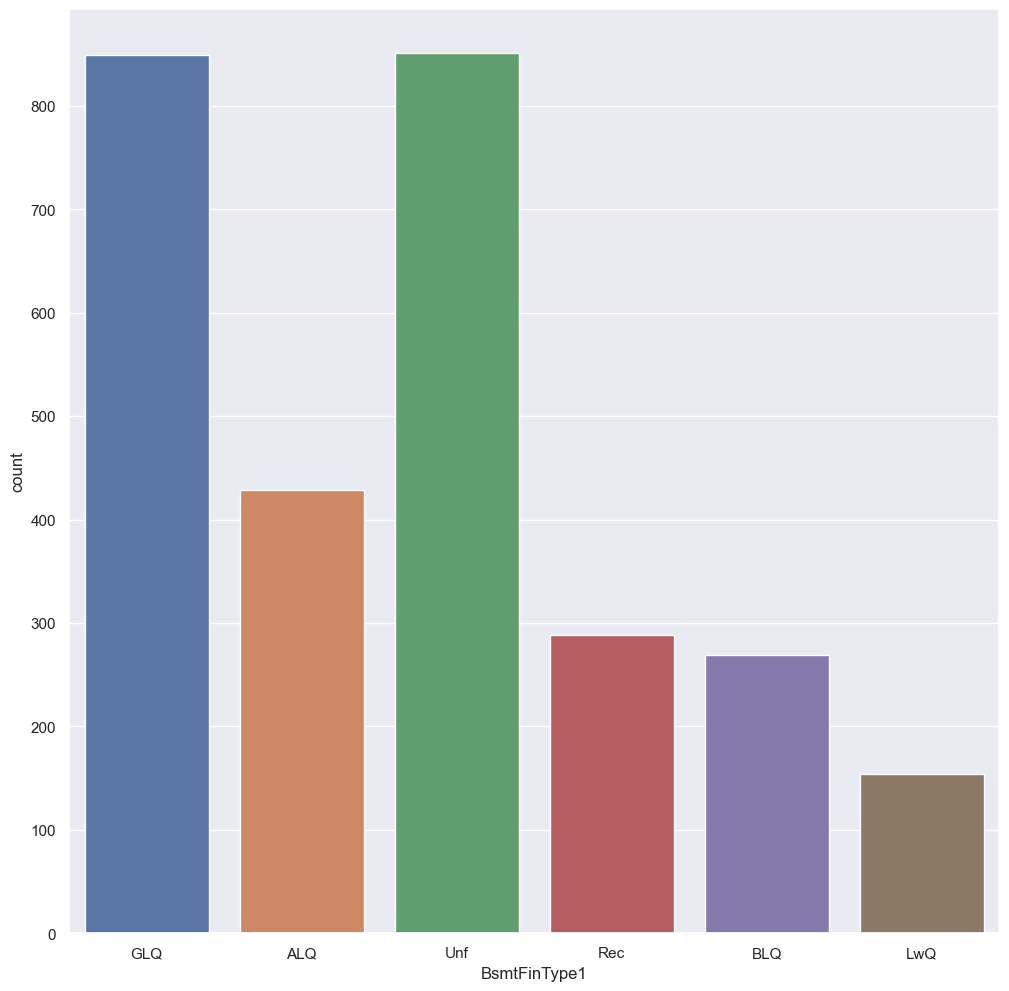

     BsmtFinType2      Ratio
Unf          2493  85.405961
Rec           105   3.597122
LwQ            87   2.980473
BLQ            68   2.329565
ALQ            52   1.781432
GLQ            34   1.164782
######################################


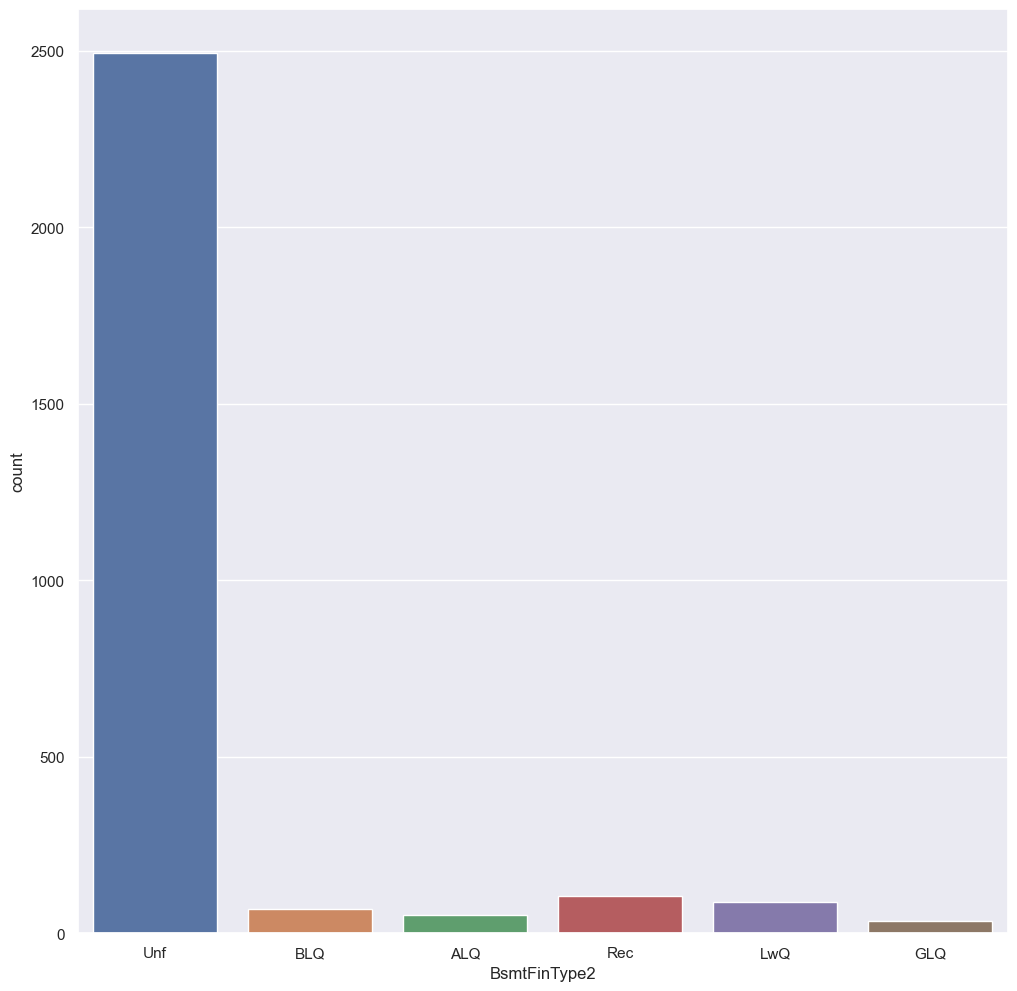

       Heating      Ratio
GasA      2874  98.458376
GasW        27   0.924974
Grav         9   0.308325
Wall         6   0.205550
OthW         2   0.068517
Floor        1   0.034258
######################################


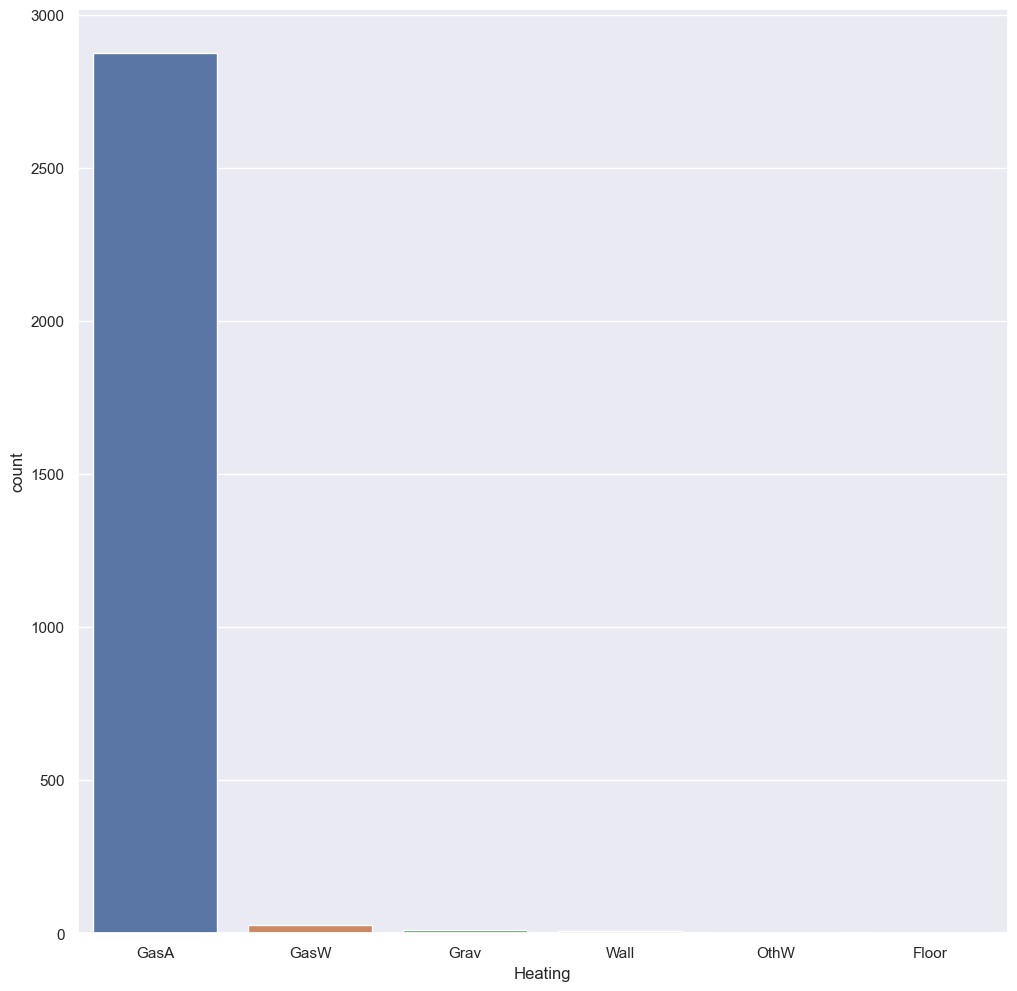

    HeatingQC      Ratio
Ex       1493  51.147653
TA        857  29.359370
Gd        474  16.238438
Fa         92   3.151764
Po          3   0.102775
######################################


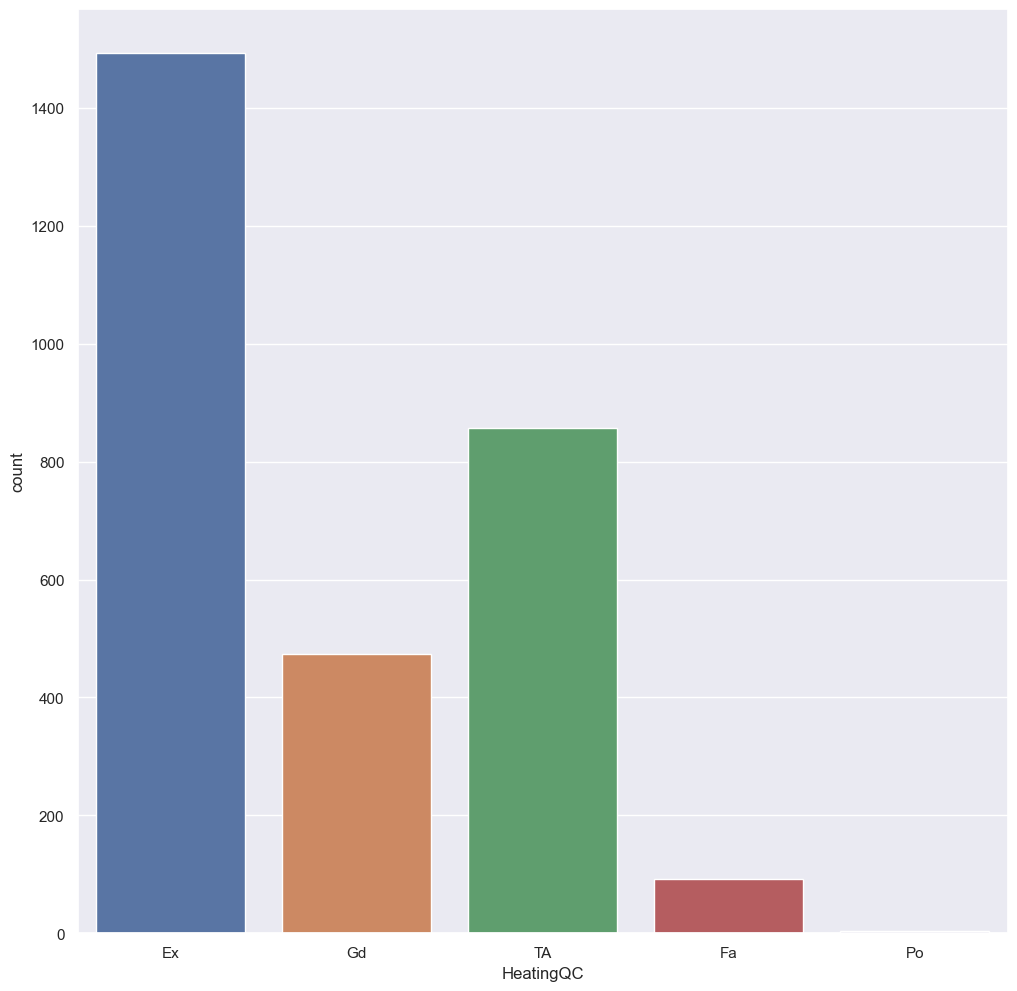

   CentralAir      Ratio
Y        2723  93.285372
N         196   6.714628
######################################


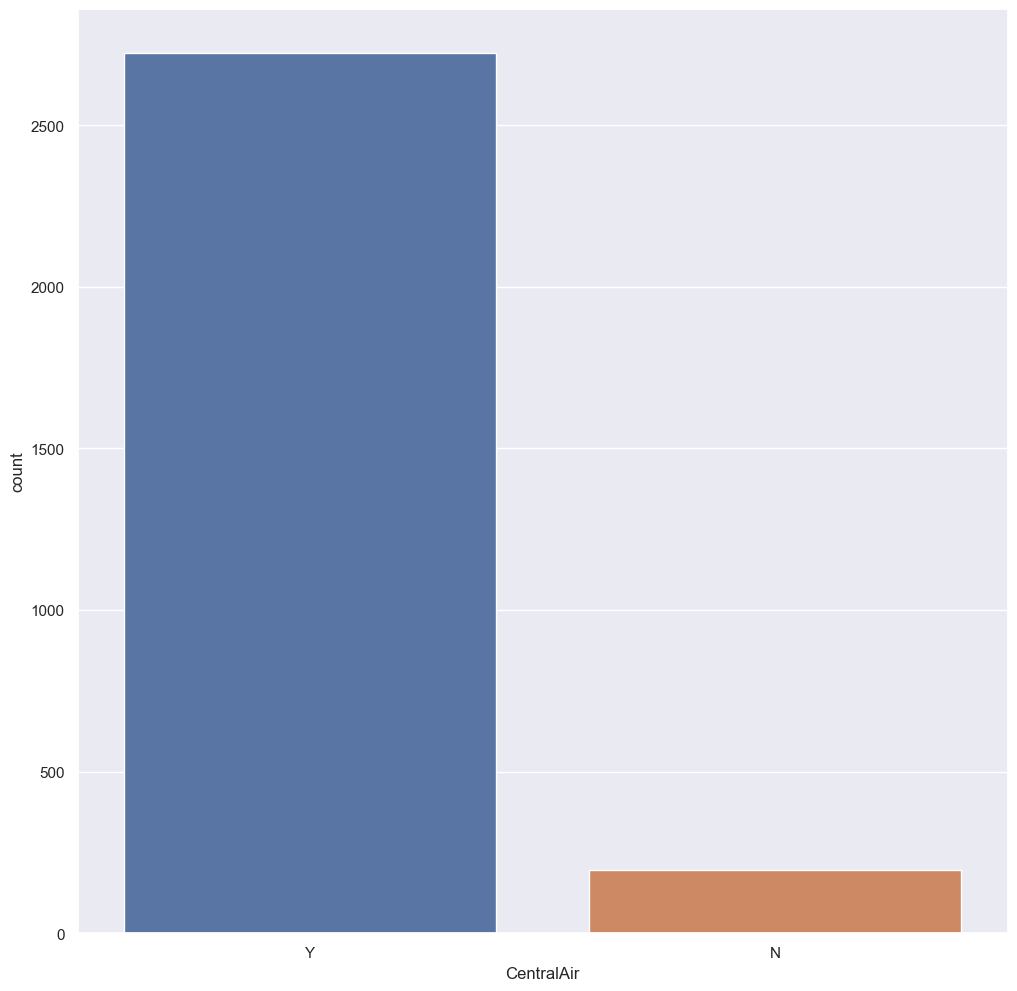

       Electrical      Ratio
SBrkr        2671  91.503940
FuseA         188   6.440562
FuseF          50   1.712915
FuseP           8   0.274066
Mix             1   0.034258
######################################


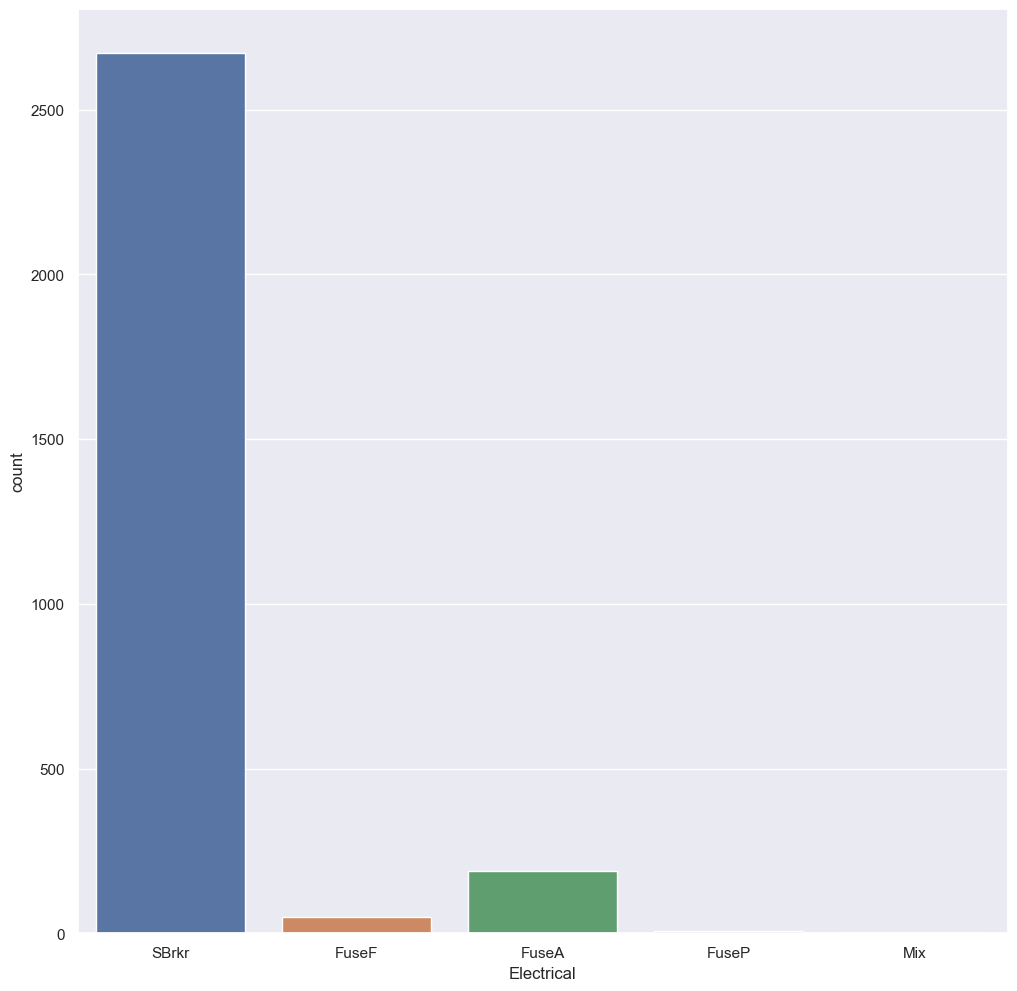

    KitchenQual      Ratio
TA         1492  51.113395
Gd         1151  39.431312
Ex          205   7.022953
Fa           70   2.398082
######################################


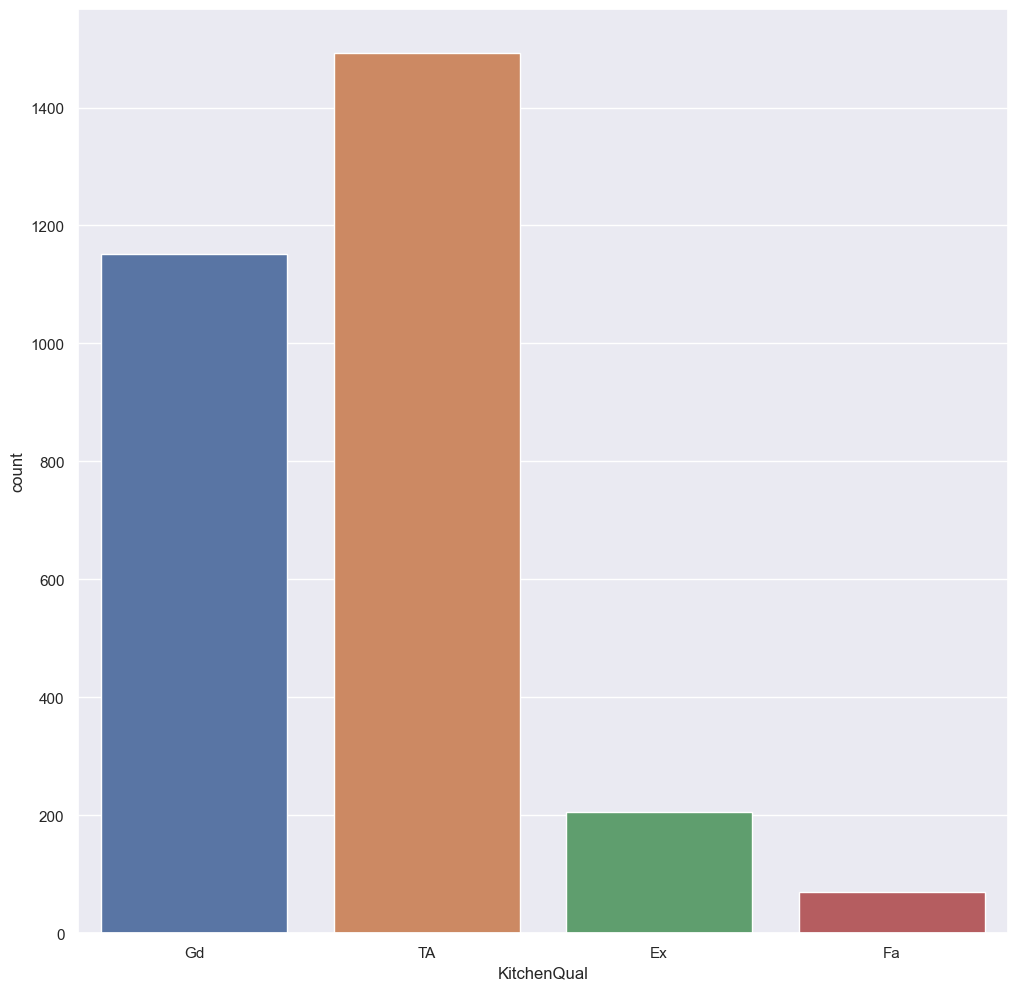

      Functional      Ratio
Typ         2717  93.079822
Min2          70   2.398082
Min1          65   2.226790
Mod           35   1.199041
Maj1          19   0.650908
Maj2           9   0.308325
Sev            2   0.068517
######################################


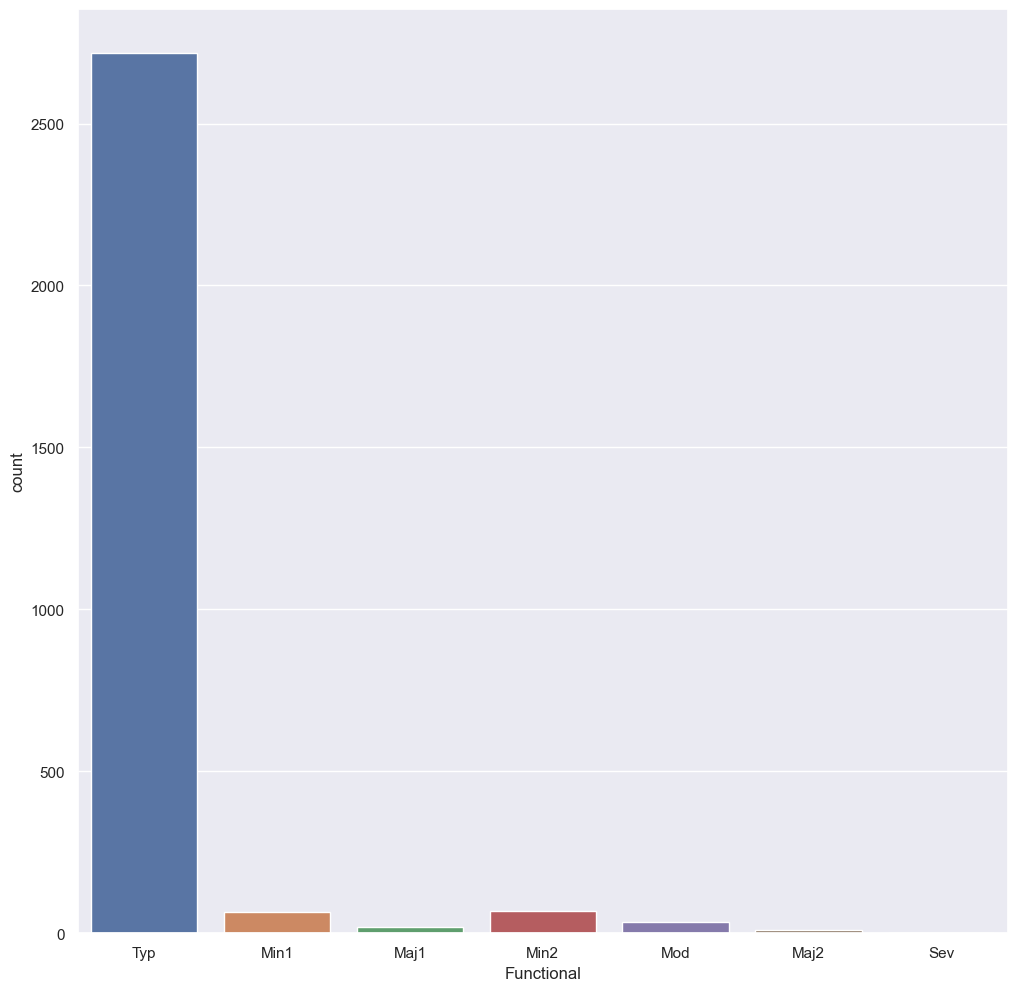

    FireplaceQu      Ratio
Gd          744  25.488181
TA          592  20.280918
Fa           74   2.535115
Po           46   1.575882
Ex           43   1.473107
######################################


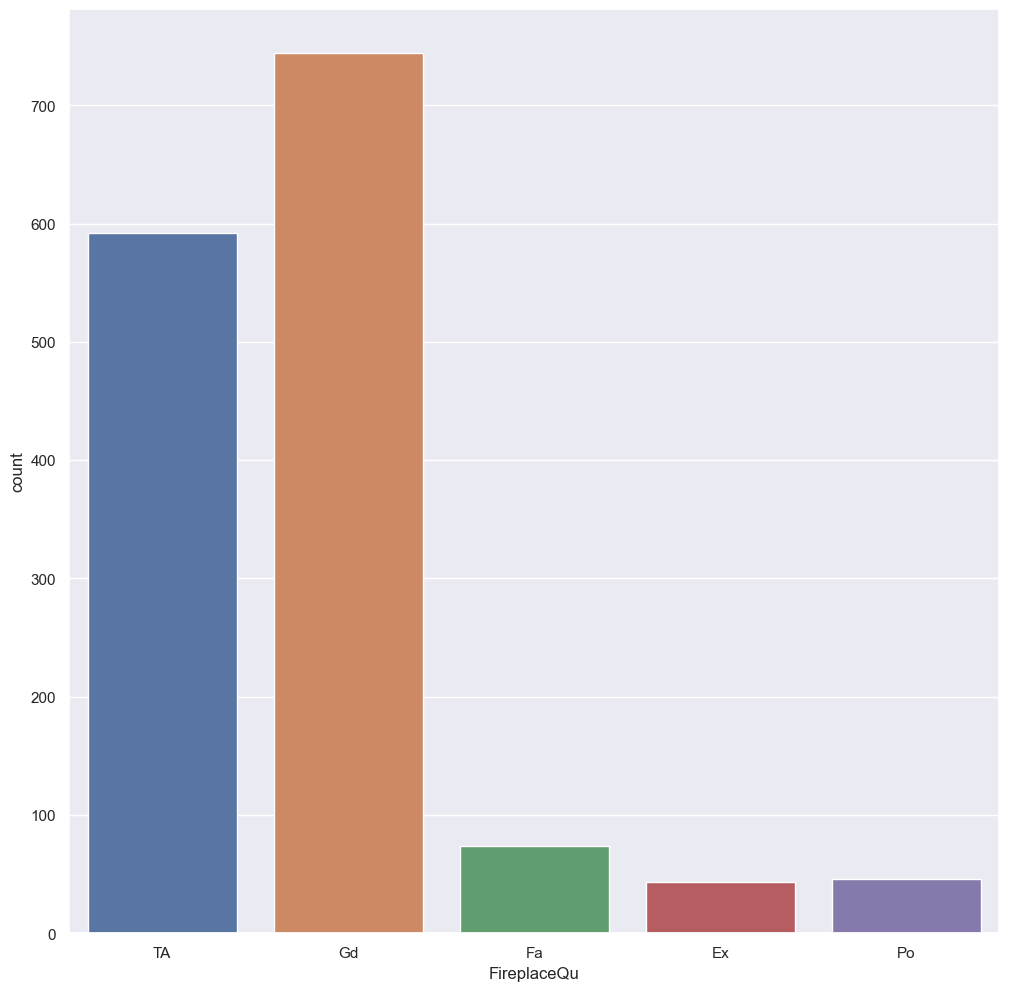

         GarageType      Ratio
Attchd         1723  59.027064
Detchd          779  26.687222
BuiltIn         186   6.372045
Basment          36   1.233299
2Types           23   0.787941
CarPort          15   0.513875
######################################


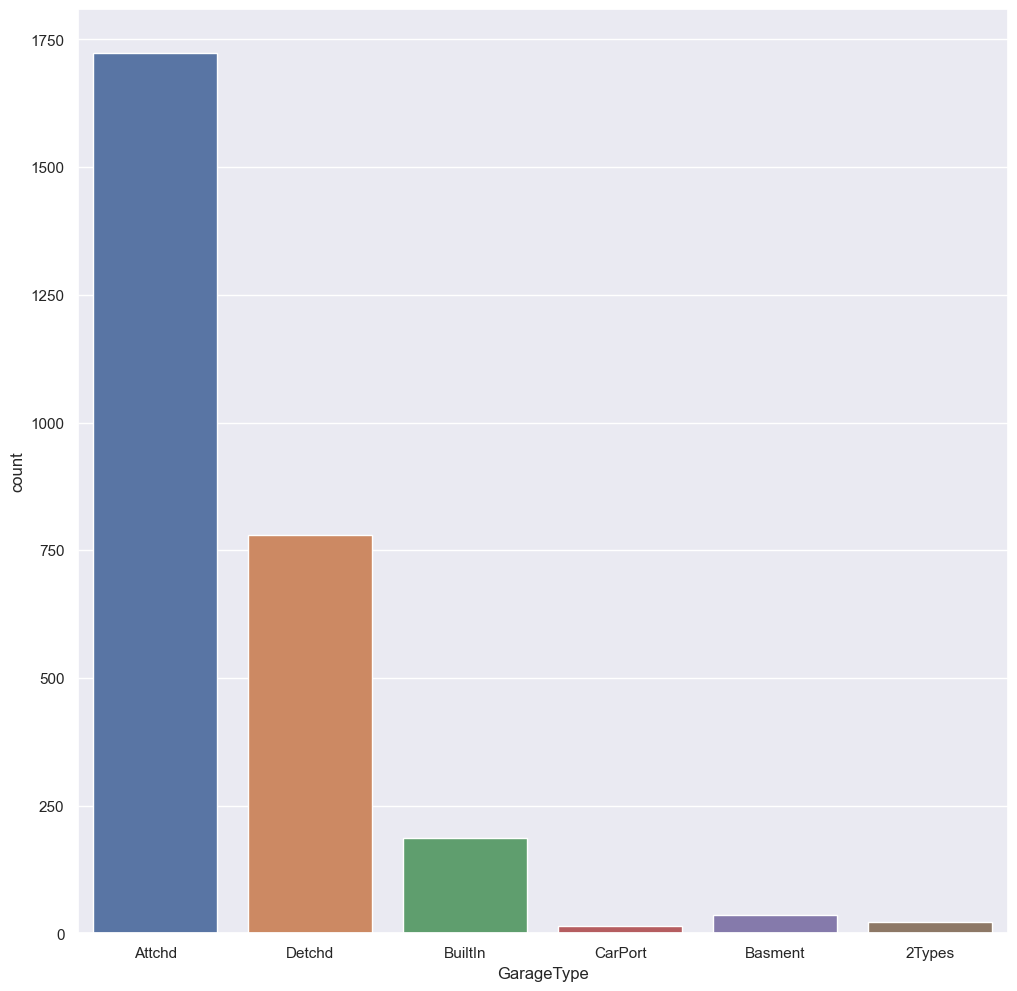

     GarageFinish      Ratio
Unf          1230  42.137718
RFn           811  27.783487
Fin           719  24.631723
######################################


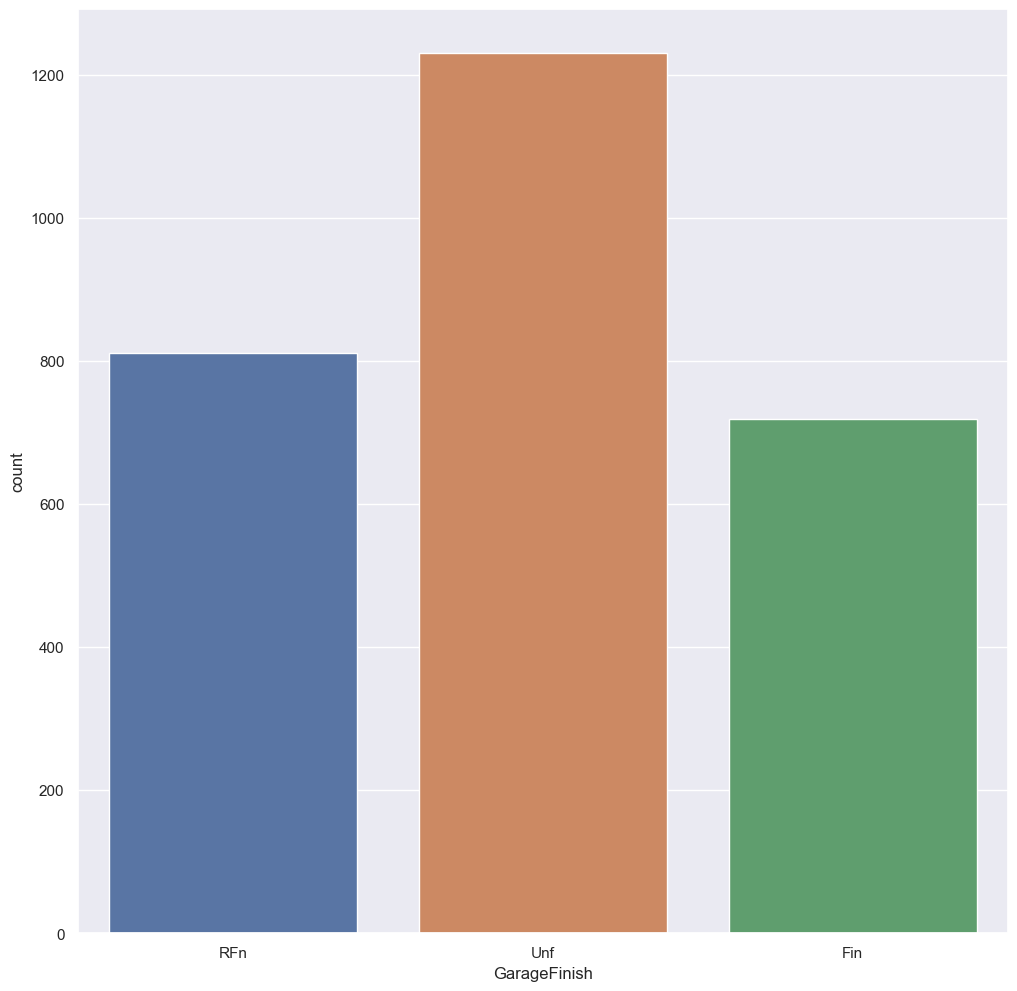

    GarageQual      Ratio
TA        2604  89.208633
Fa         124   4.248030
Gd          24   0.822199
Po           5   0.171292
Ex           3   0.102775
######################################


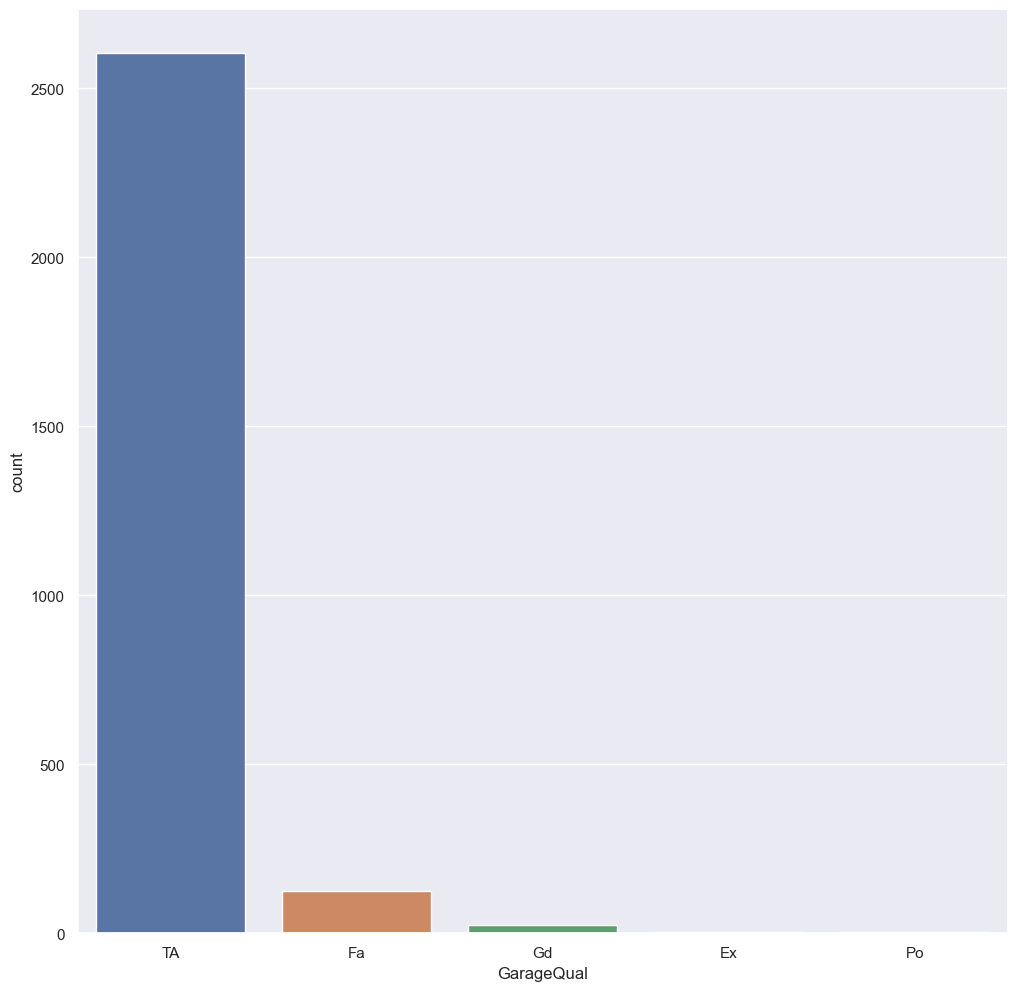

    GarageCond      Ratio
TA        2654  90.921548
Fa          74   2.535115
Gd          15   0.513875
Po          14   0.479616
Ex           3   0.102775
######################################


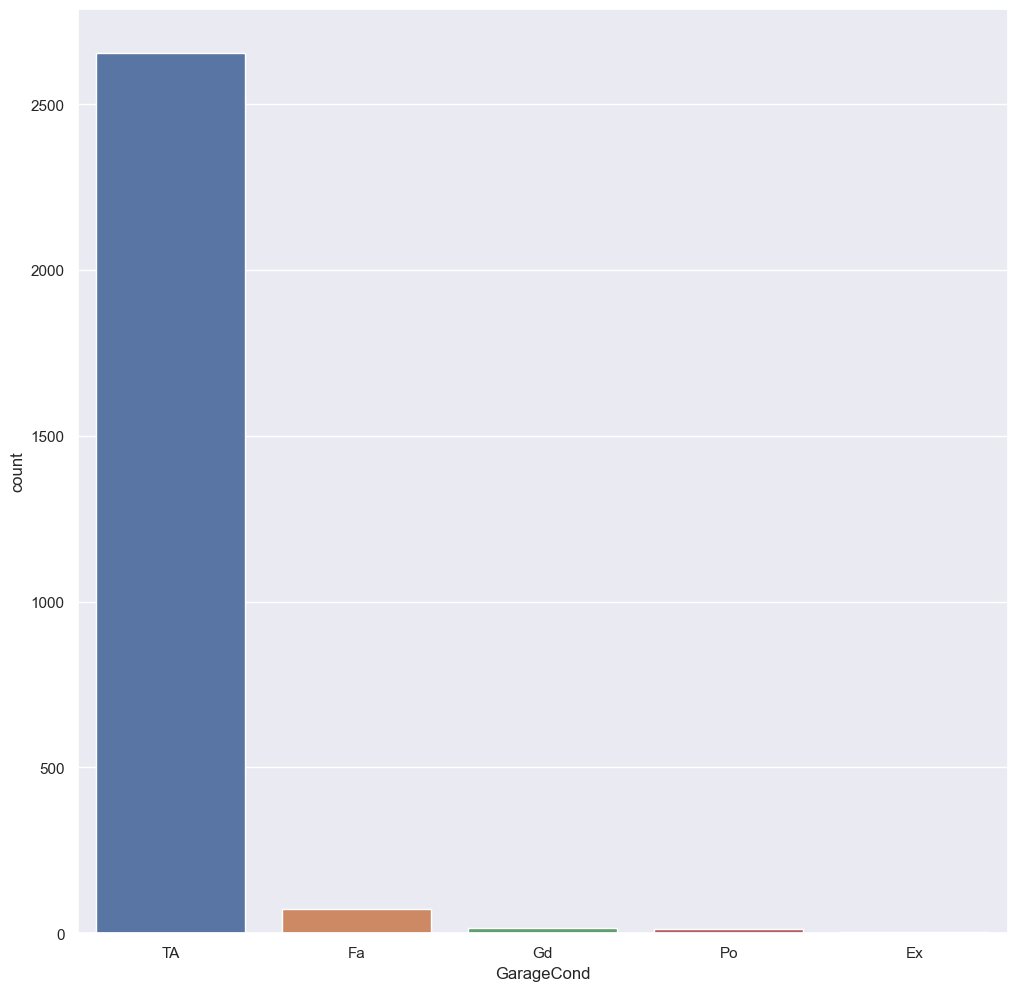

   PavedDrive      Ratio
Y        2641  90.476190
N         216   7.399794
P          62   2.124015
######################################


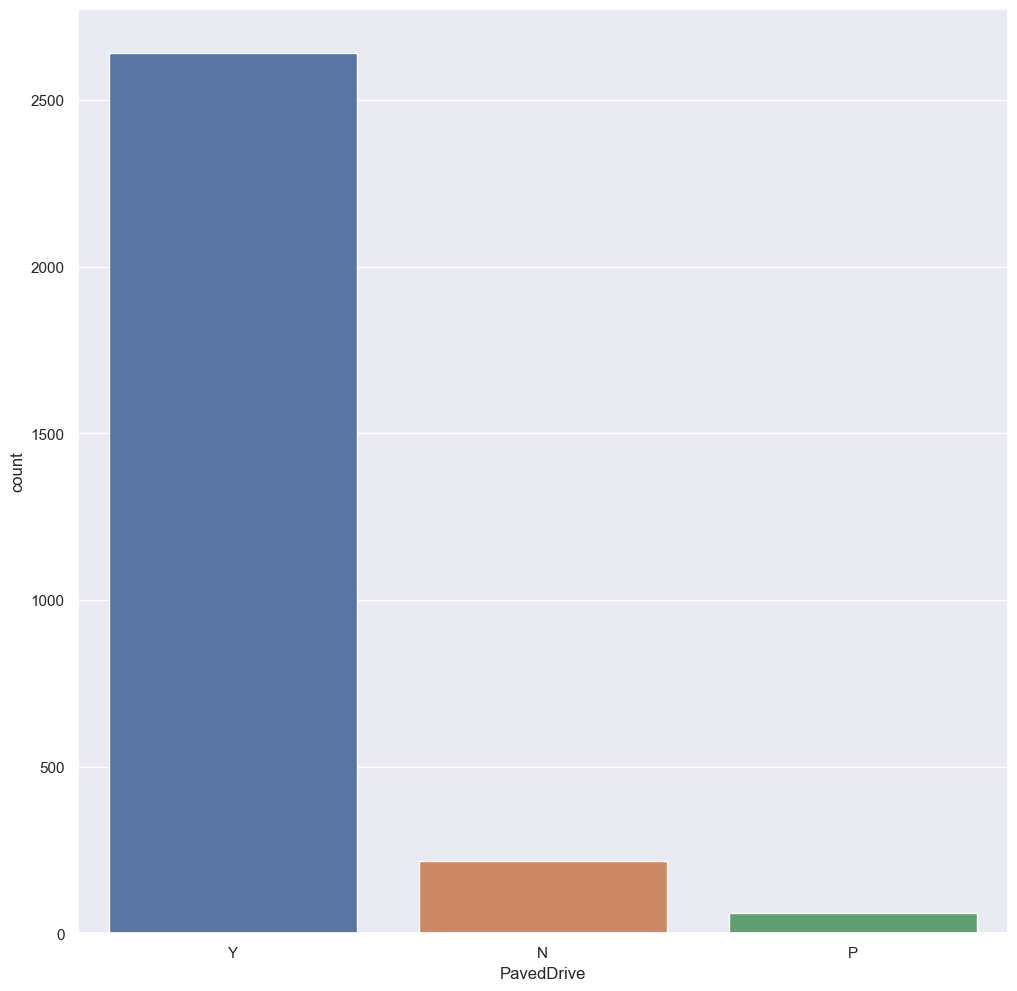

    PoolQC     Ratio
Ex       4  0.137033
Gd       4  0.137033
Fa       2  0.068517
######################################


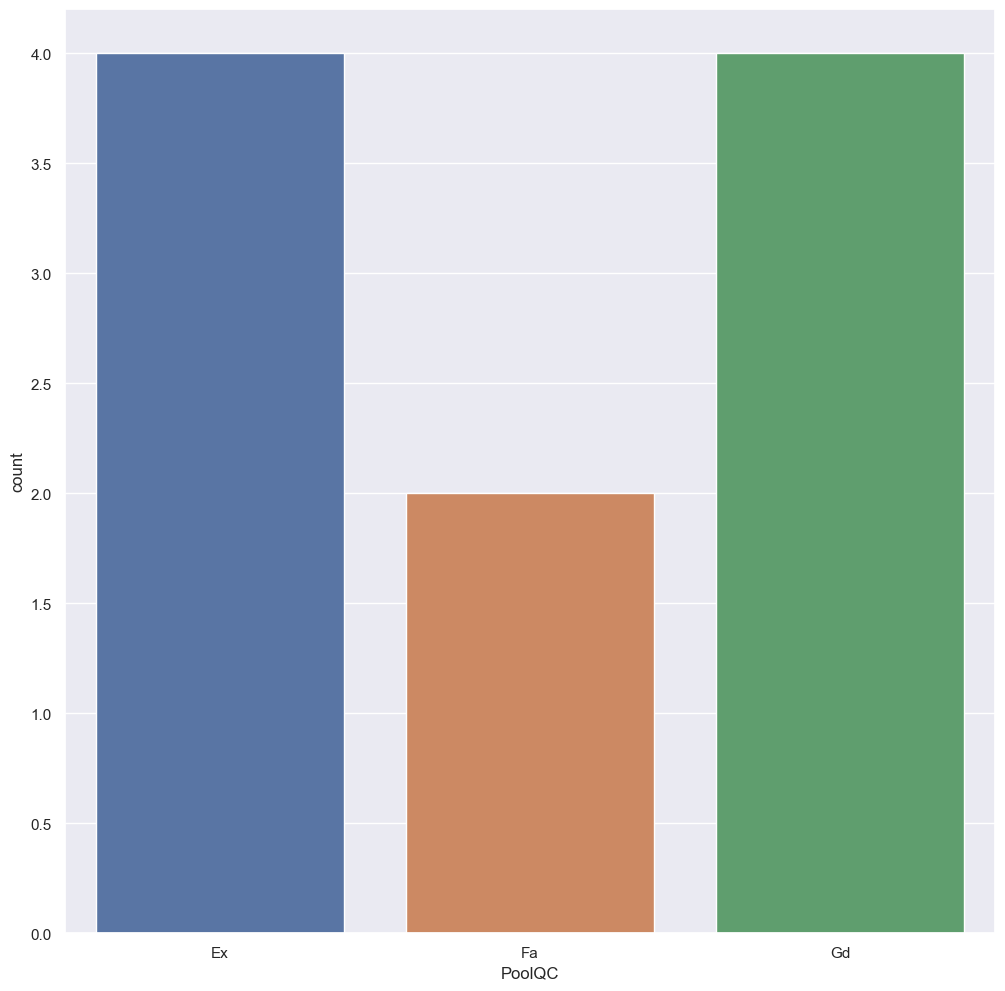

       Fence      Ratio
MnPrv    329  11.270983
GdPrv    118   4.042480
GdWo     112   3.836930
MnWw      12   0.411100
######################################


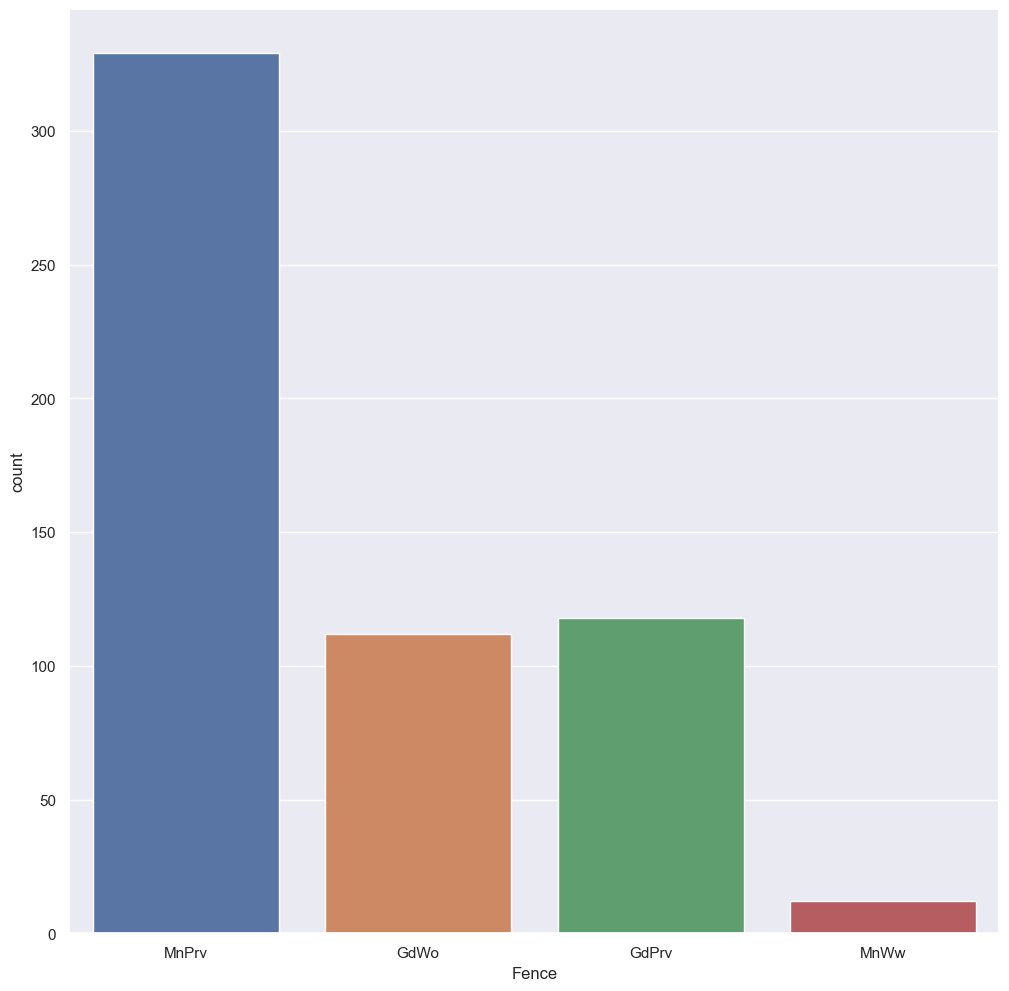

      MiscFeature     Ratio
Shed           95  3.254539
Gar2            5  0.171292
Othr            4  0.137033
TenC            1  0.034258
######################################


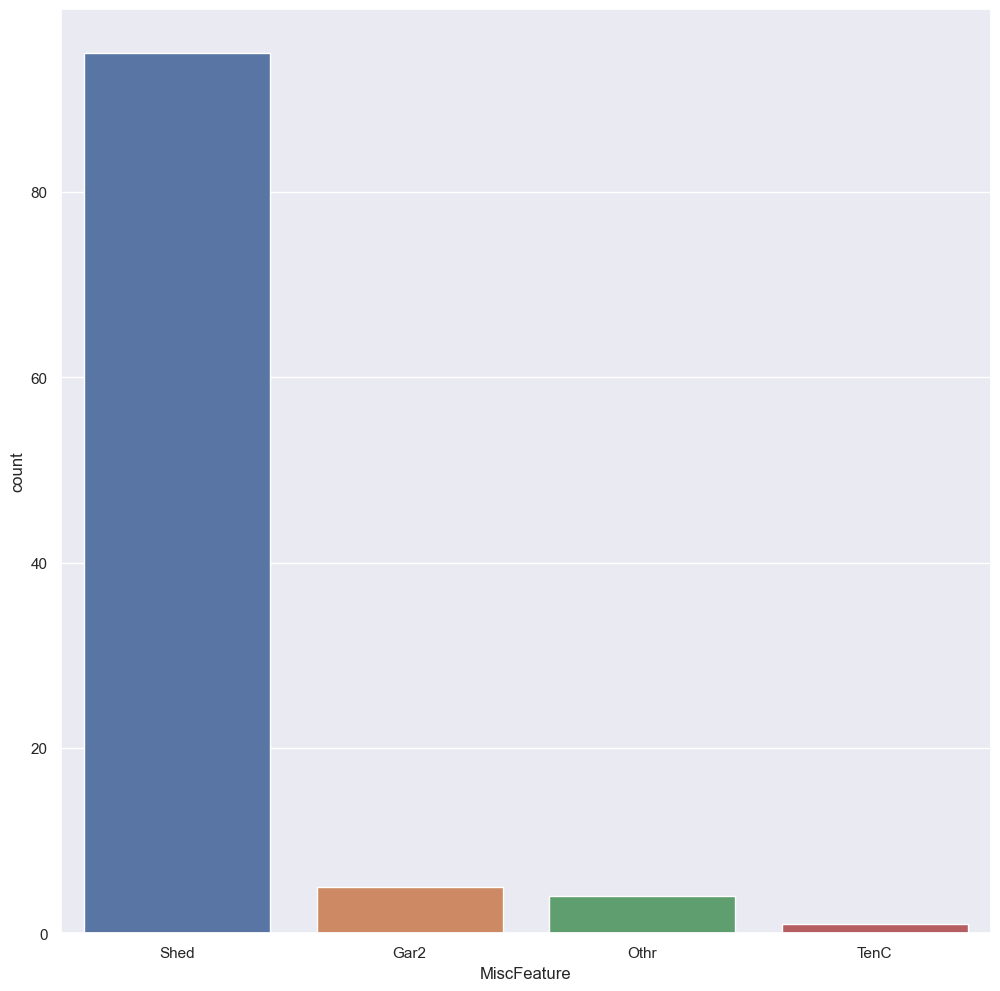

       SaleType      Ratio
WD         2525  86.502227
New         239   8.187736
COD          87   2.980473
ConLD        26   0.890716
CWD          12   0.411100
ConLI         9   0.308325
ConLw         8   0.274066
Oth           7   0.239808
Con           5   0.171292
######################################


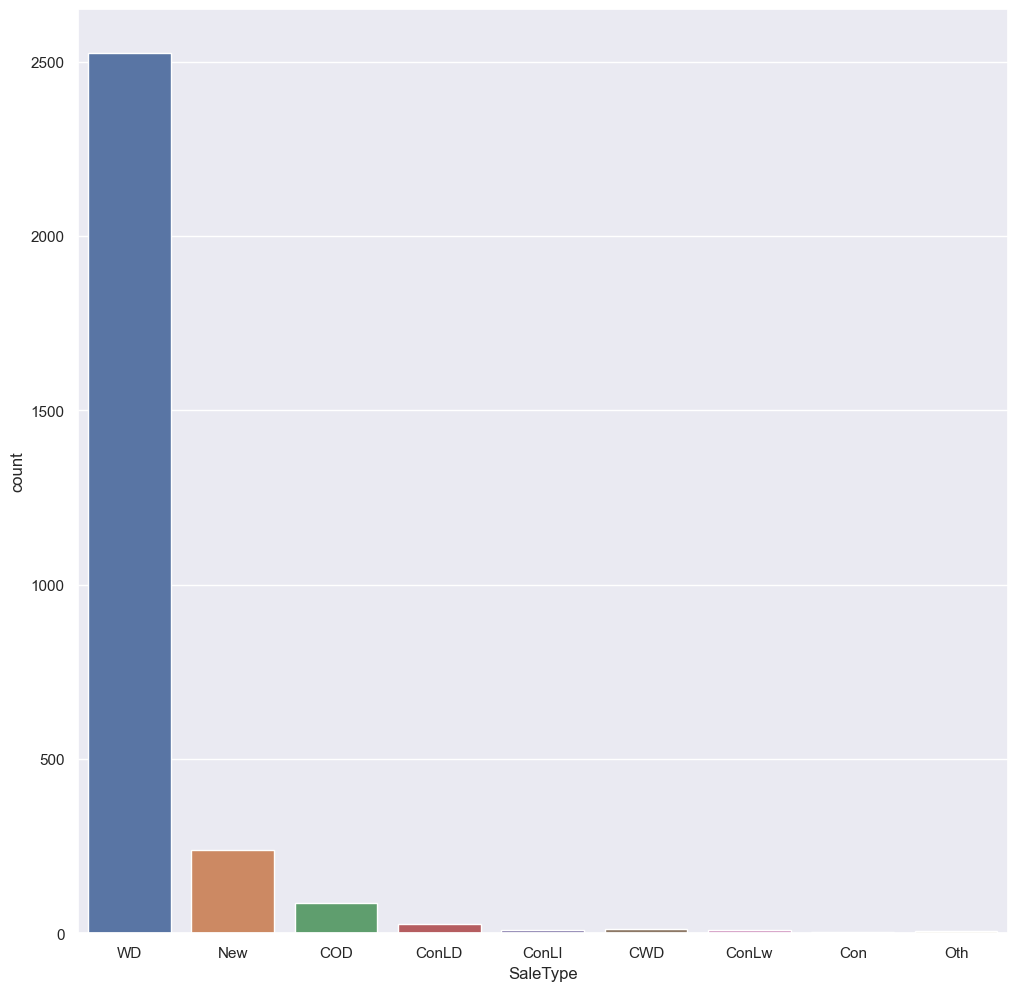

         SaleCondition      Ratio
Normal            2402  82.288455
Partial            245   8.393285
Abnorml            190   6.509078
Family              46   1.575882
Alloca              24   0.822199
AdjLand             12   0.411100
######################################


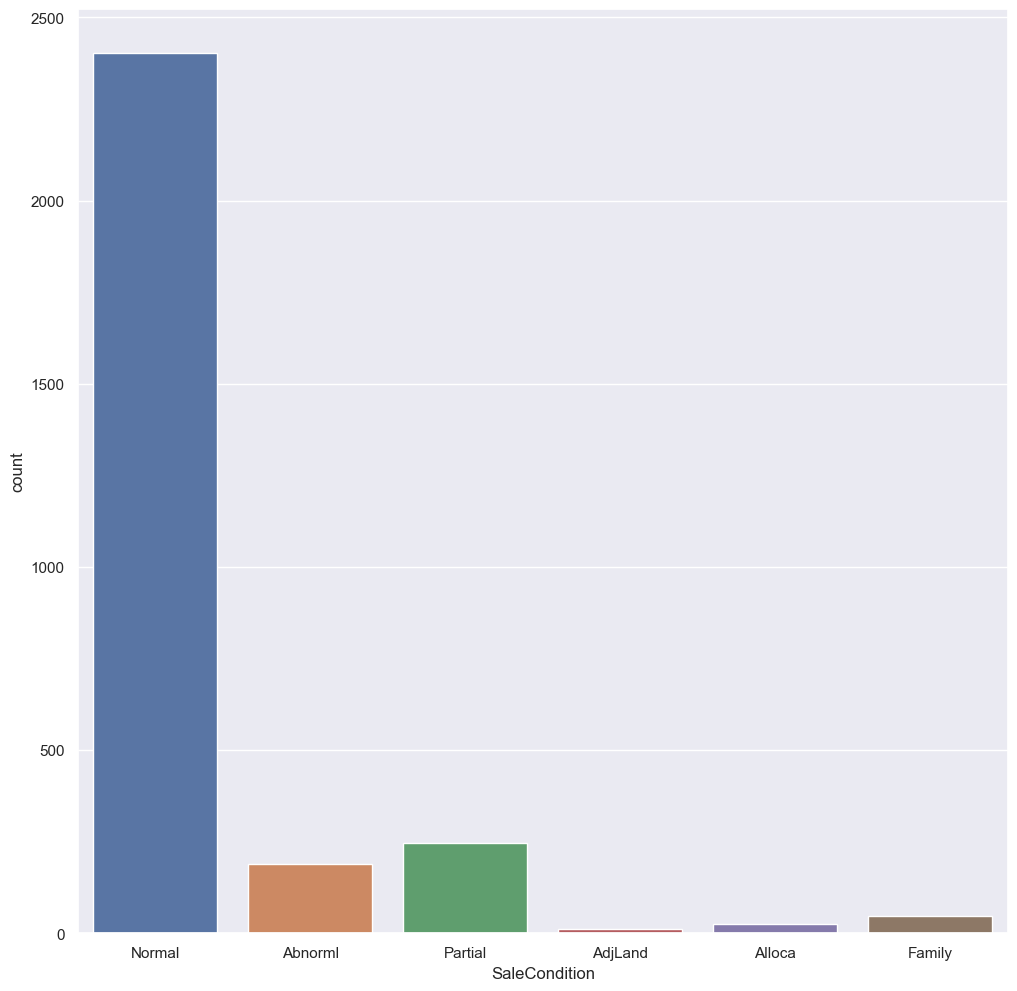

In [130]:
for col in cat_cols:
    eda.cat_summary(df, col_name = col, plot = True)

count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
1%         20.000000
10%        20.000000
20%        20.000000
30%        20.000000
40%        30.000000
50%        50.000000
60%        60.000000
70%        60.000000
80%        80.000000
90%       120.000000
max       190.000000
Name: MSSubClass, dtype: float64
######################################


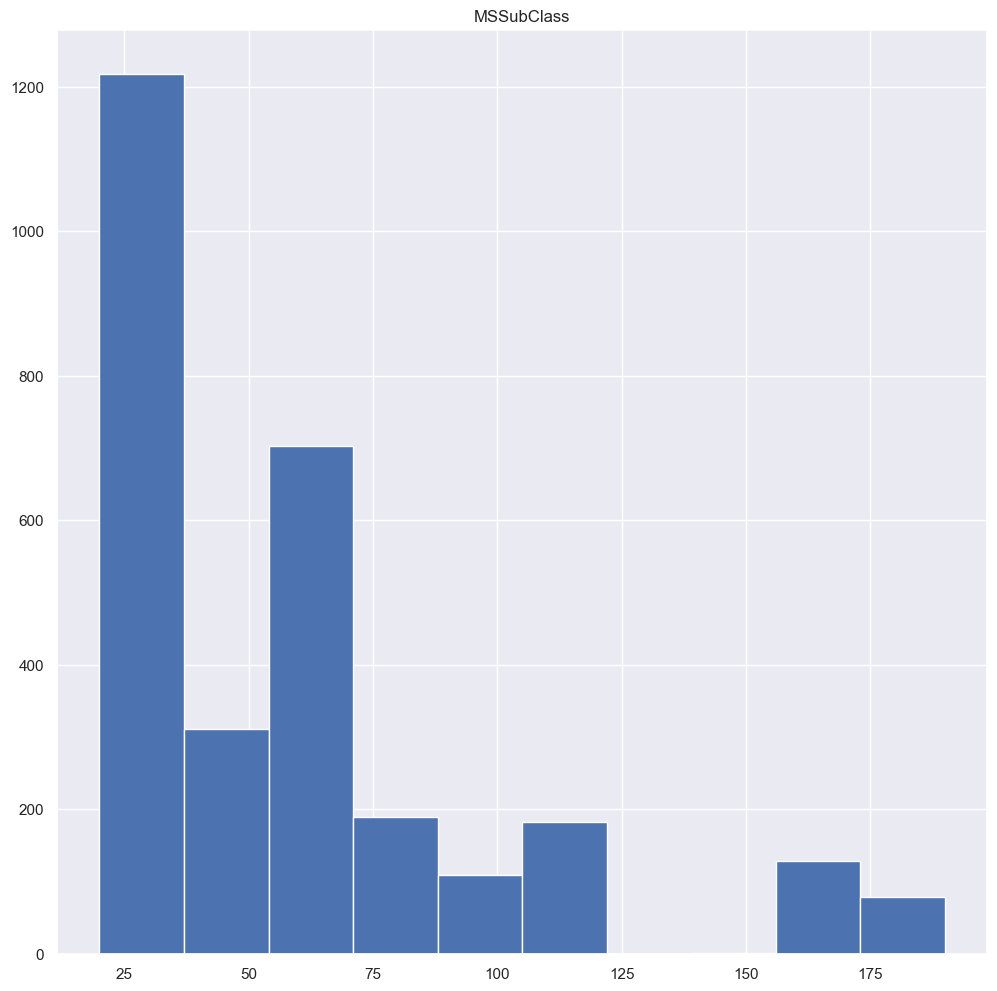

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
1%         21.000000
10%        43.000000
20%        53.000000
30%        60.000000
40%        63.000000
50%        68.000000
60%        73.000000
70%        78.000000
80%        84.000000
90%        95.000000
max       313.000000
Name: LotFrontage, dtype: float64
######################################


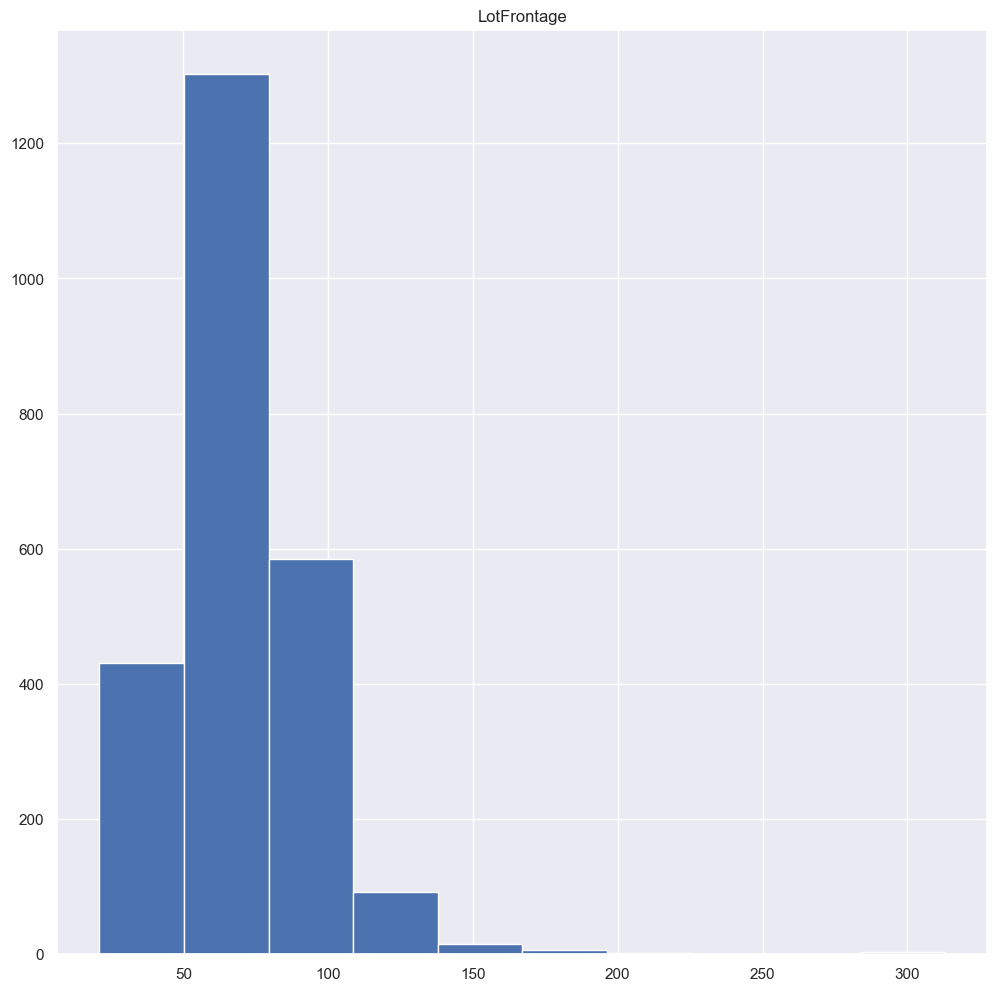

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
1%         1680.000000
10%        4922.400000
20%        7007.600000
30%        7960.400000
40%        8741.000000
50%        9453.000000
60%       10151.600000
70%       11001.200000
80%       12203.800000
90%       14300.600000
max      215245.000000
Name: LotArea, dtype: float64
######################################


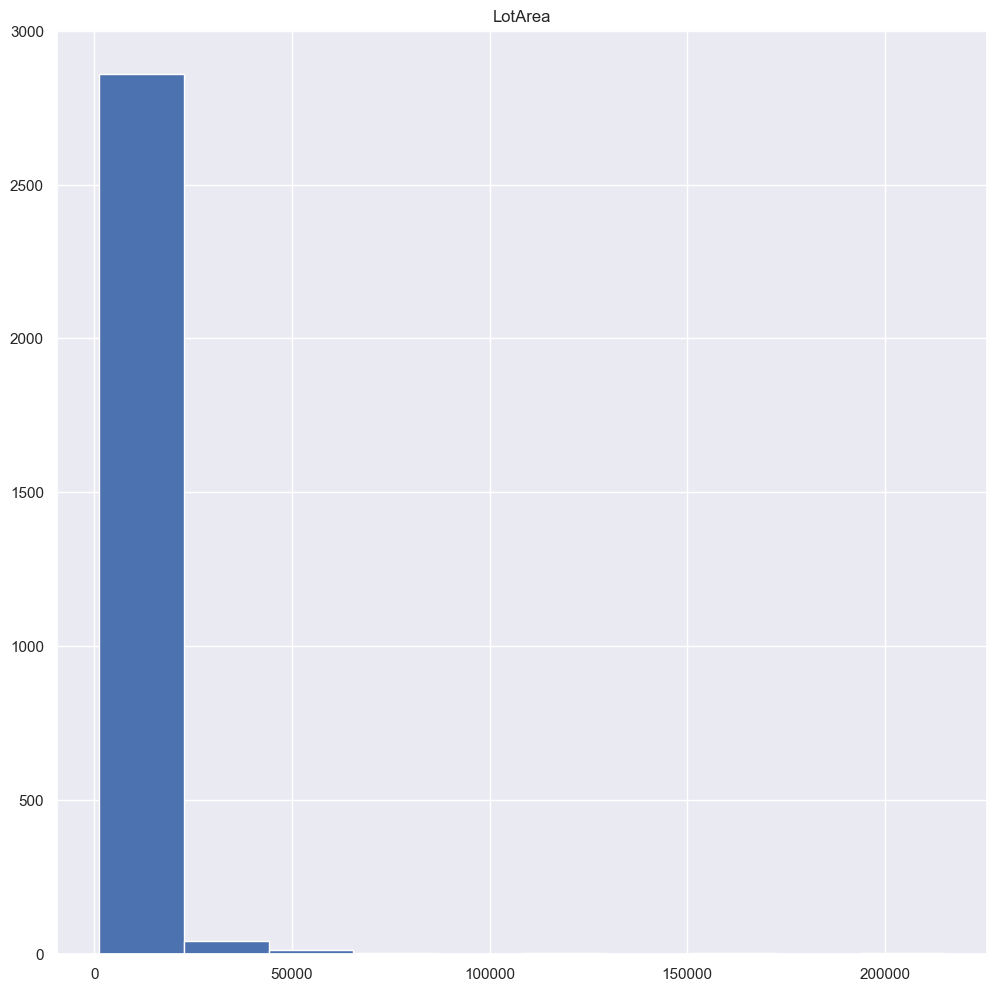

count    2919.000000
mean        6.089072
std         1.409947
min         1.000000
1%          3.000000
10%         5.000000
20%         5.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         6.000000
70%         7.000000
80%         7.000000
90%         8.000000
max        10.000000
Name: OverallQual, dtype: float64
######################################


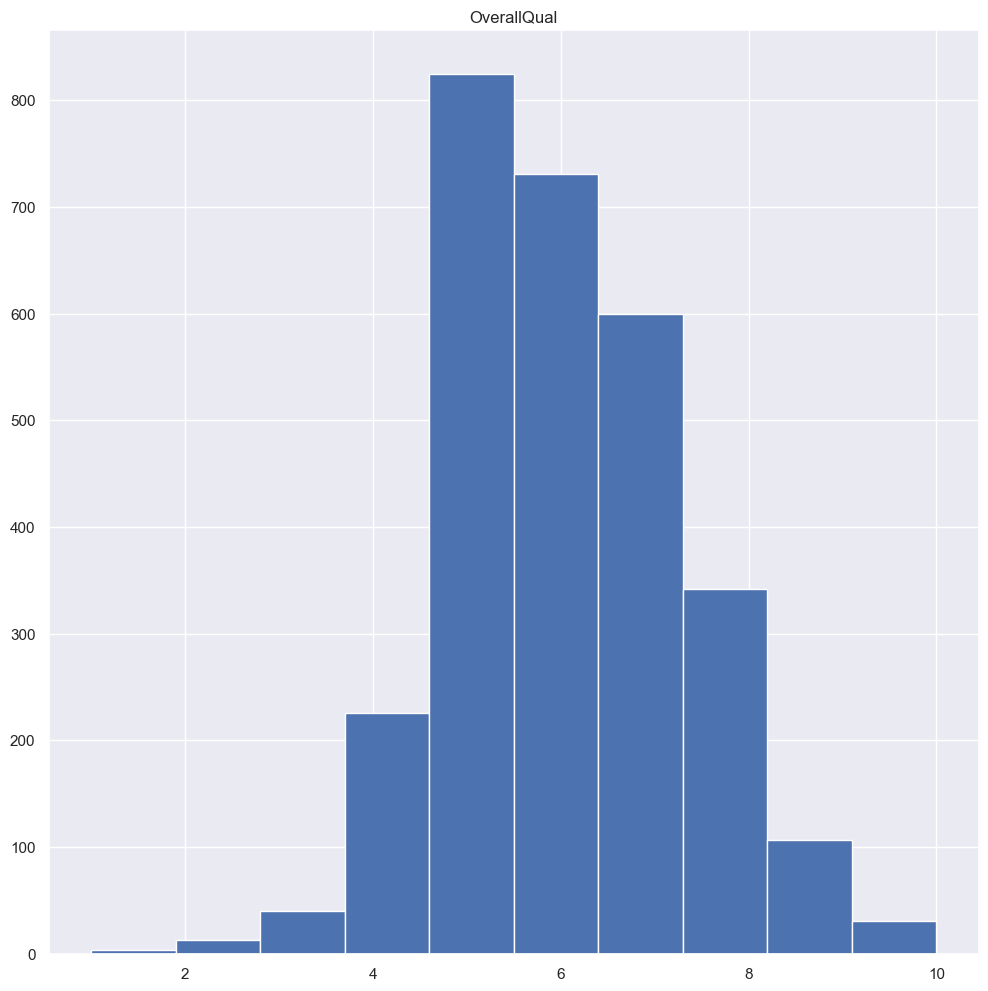

count    2919.000000
mean     1971.312778
std        30.291442
min      1872.000000
1%       1900.000000
10%      1924.000000
20%      1947.000000
30%      1957.000000
40%      1965.000000
50%      1973.000000
60%      1984.000000
70%      1998.000000
80%      2003.000000
90%      2006.000000
max      2010.000000
Name: YearBuilt, dtype: float64
######################################


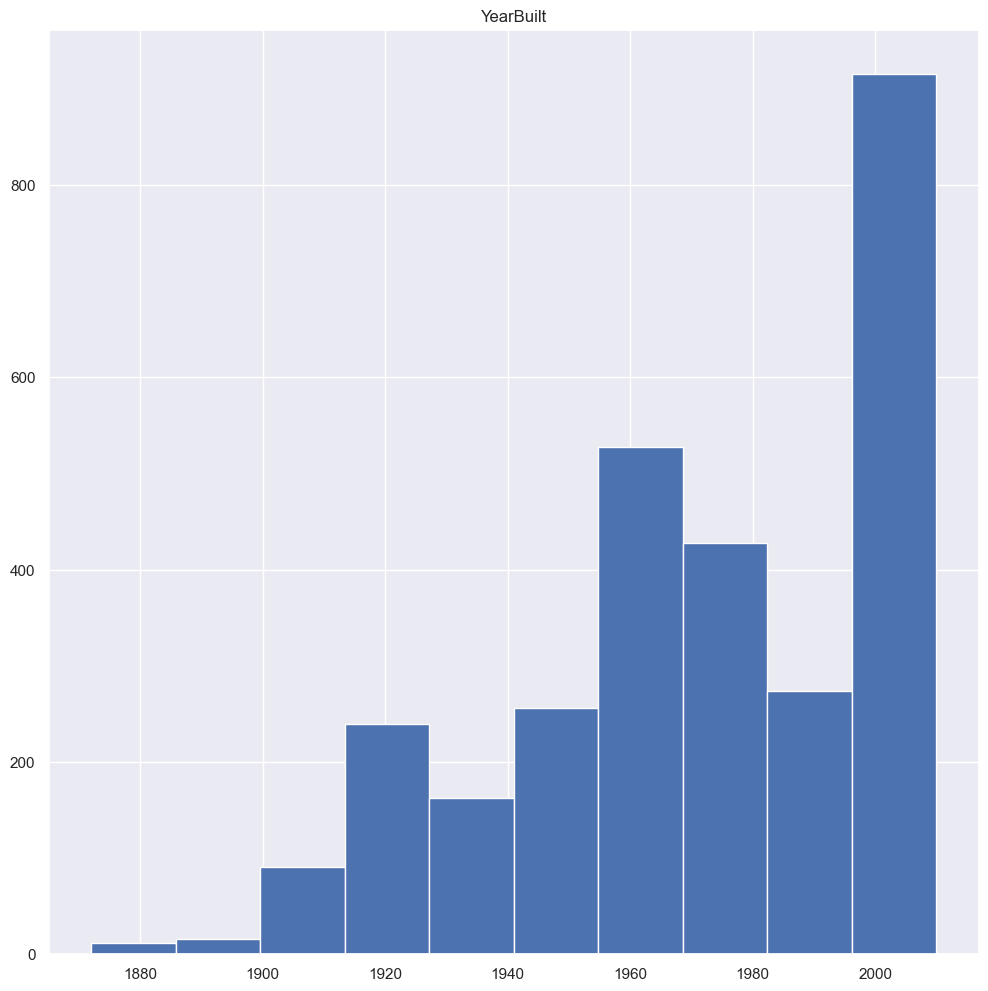

count    2919.000000
mean     1984.264474
std        20.894344
min      1950.000000
1%       1950.000000
10%      1950.000000
20%      1960.000000
30%      1970.000000
40%      1978.000000
50%      1993.000000
60%      1998.000000
70%      2002.000000
80%      2005.000000
90%      2006.200000
max      2010.000000
Name: YearRemodAdd, dtype: float64
######################################


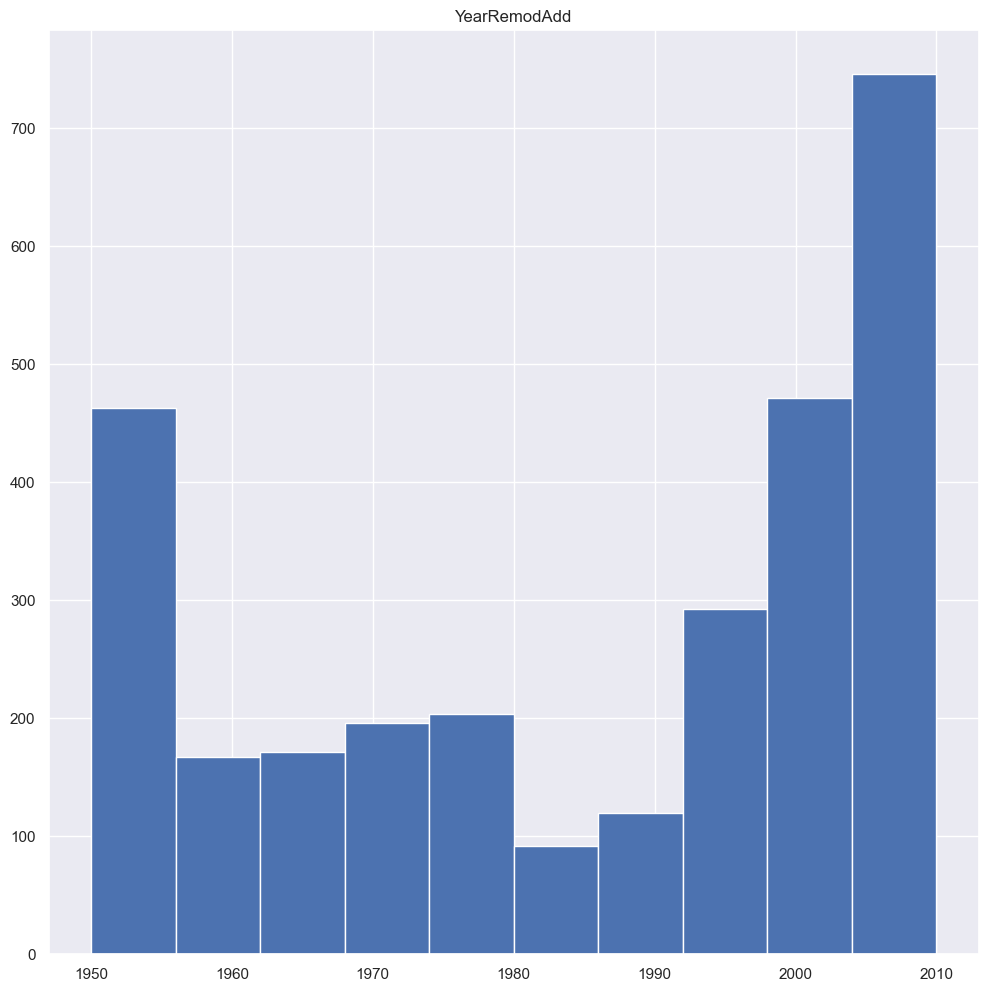

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%       120.000000
80%       202.000000
90%       325.500000
max      1600.000000
Name: MasVnrArea, dtype: float64
######################################


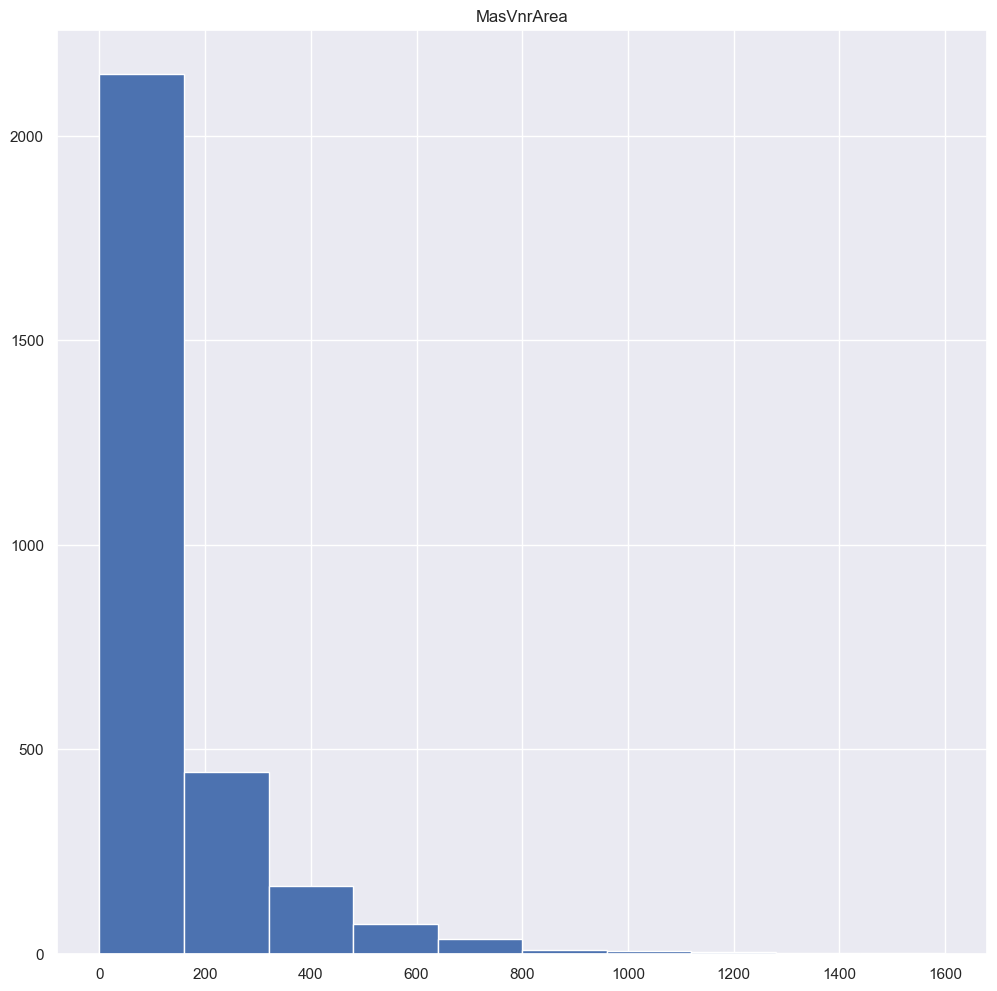

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%       202.600000
50%       368.500000
60%       515.200000
70%       656.000000
80%       812.000000
90%      1056.900000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
######################################


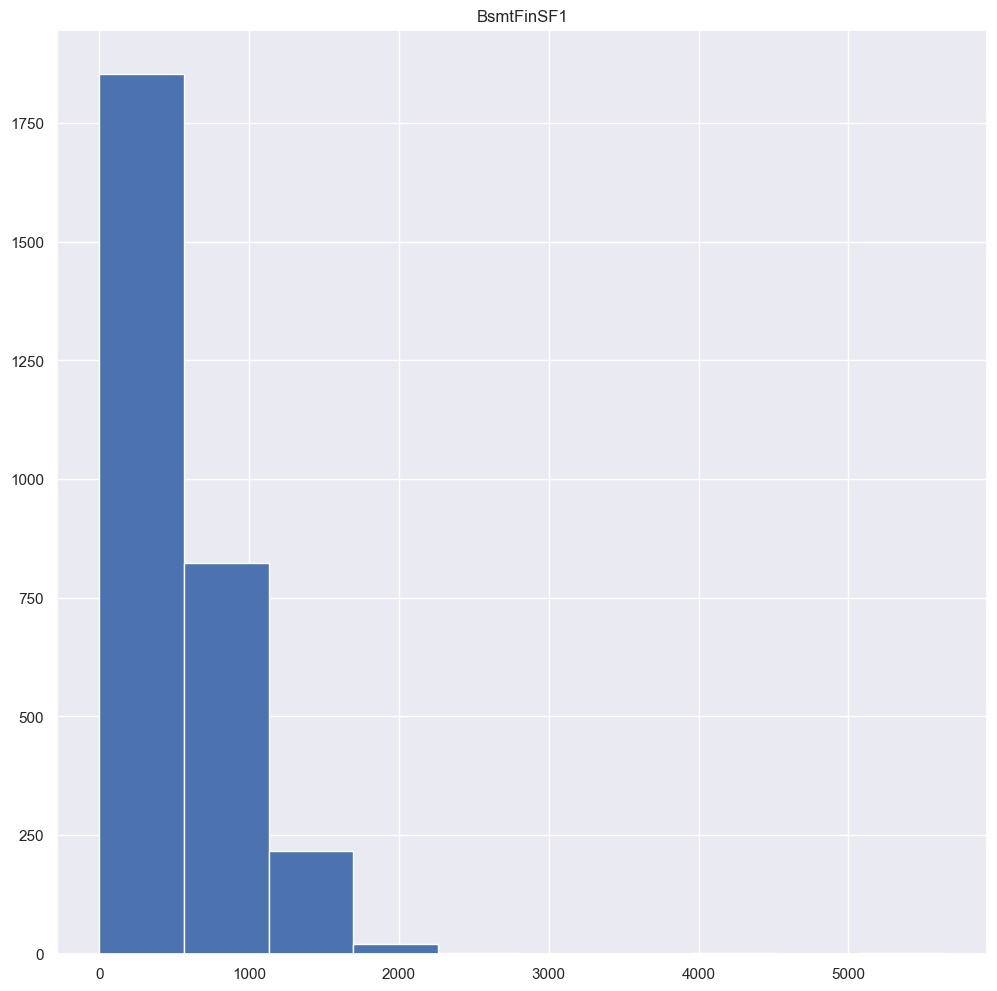

count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       125.600000
max      1526.000000
Name: BsmtFinSF2, dtype: float64
######################################


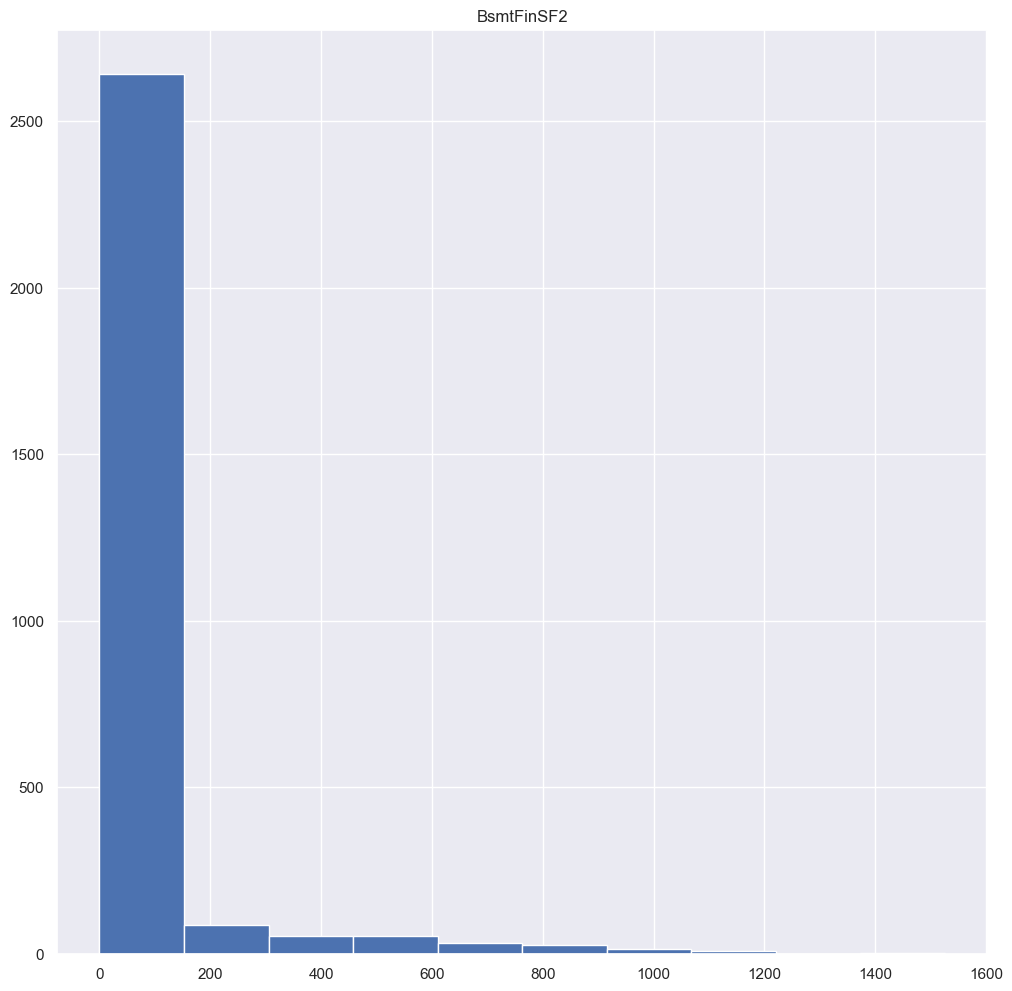

count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
1%          0.000000
10%        56.000000
20%       174.000000
30%       270.000000
40%       365.800000
50%       467.000000
60%       595.000000
70%       732.000000
80%       892.600000
90%      1212.600000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
######################################


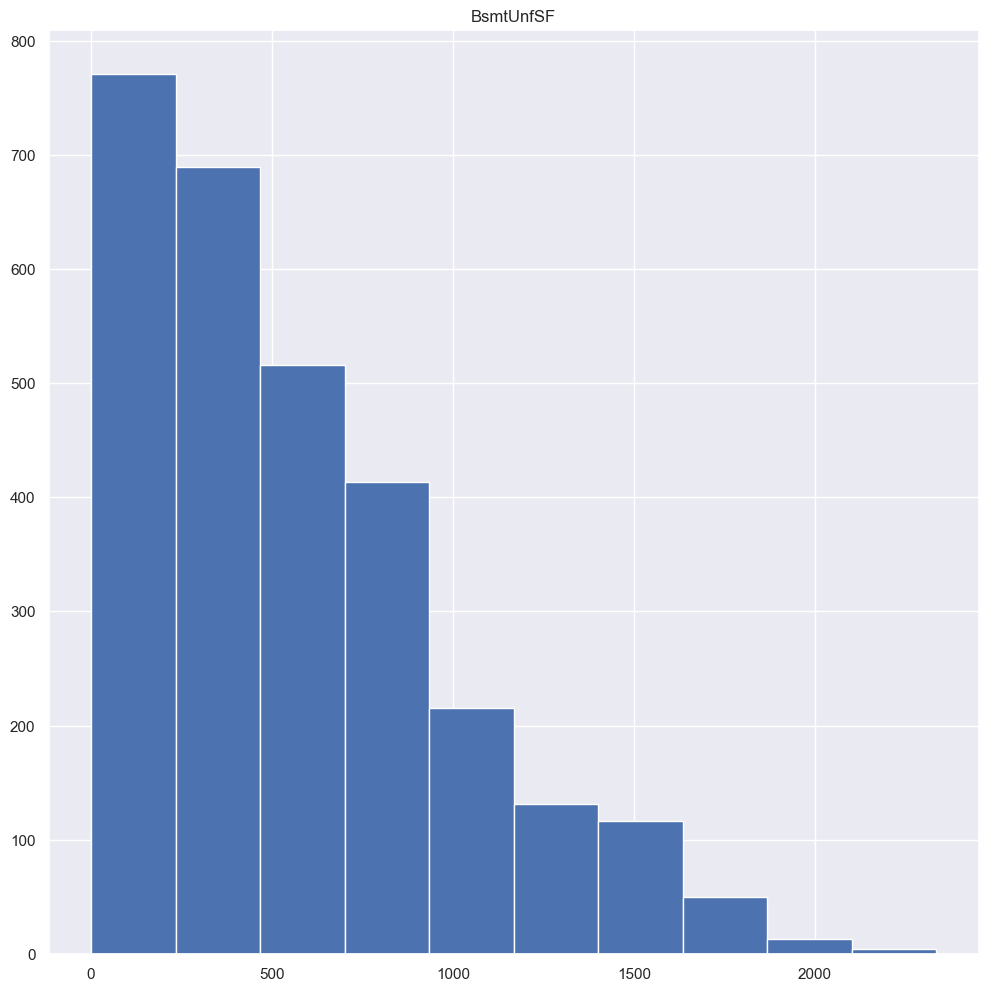

count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
1%          0.000000
10%       600.000000
20%       741.000000
30%       836.000000
40%       911.000000
50%       989.500000
60%      1089.200000
70%      1216.000000
80%      1392.000000
90%      1614.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
######################################


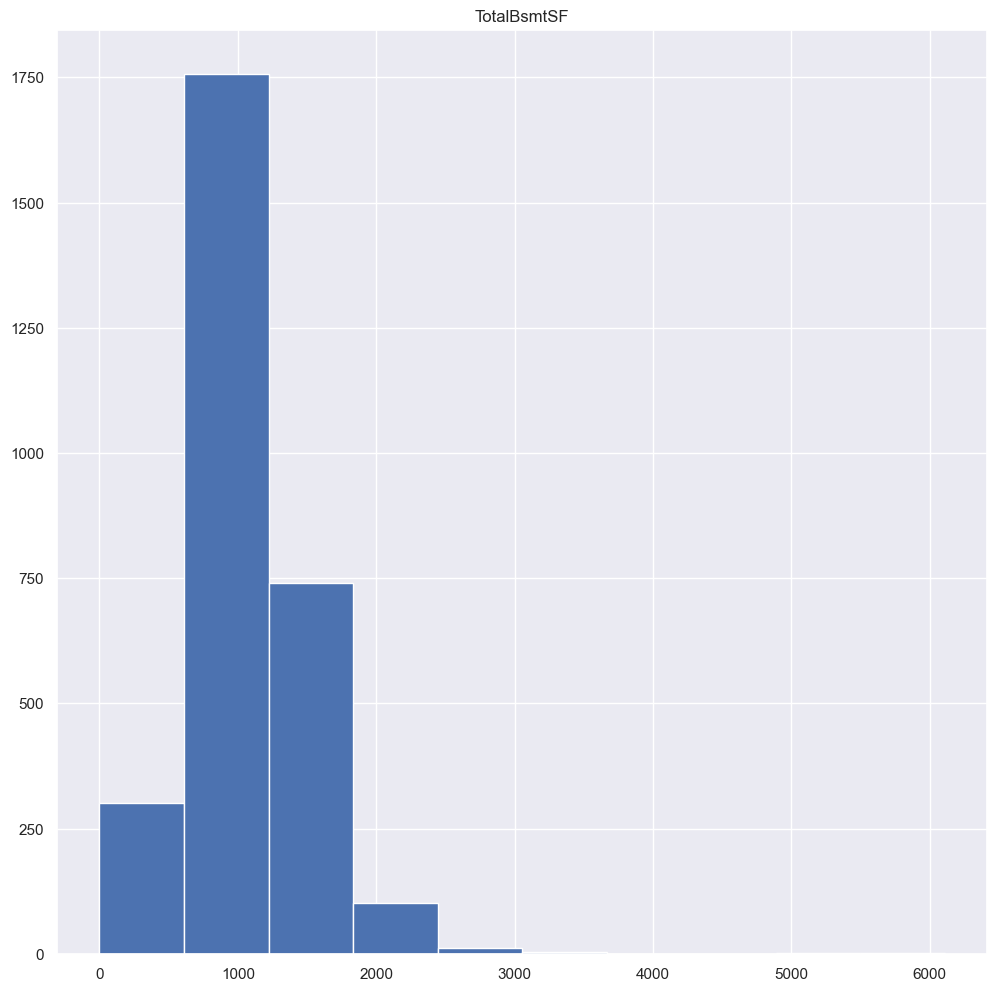

count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
1%        520.000000
10%       744.800000
20%       847.000000
30%       914.000000
40%       996.200000
50%      1082.000000
60%      1180.000000
70%      1314.000000
80%      1483.400000
90%      1675.000000
max      5095.000000
Name: 1stFlrSF, dtype: float64
######################################


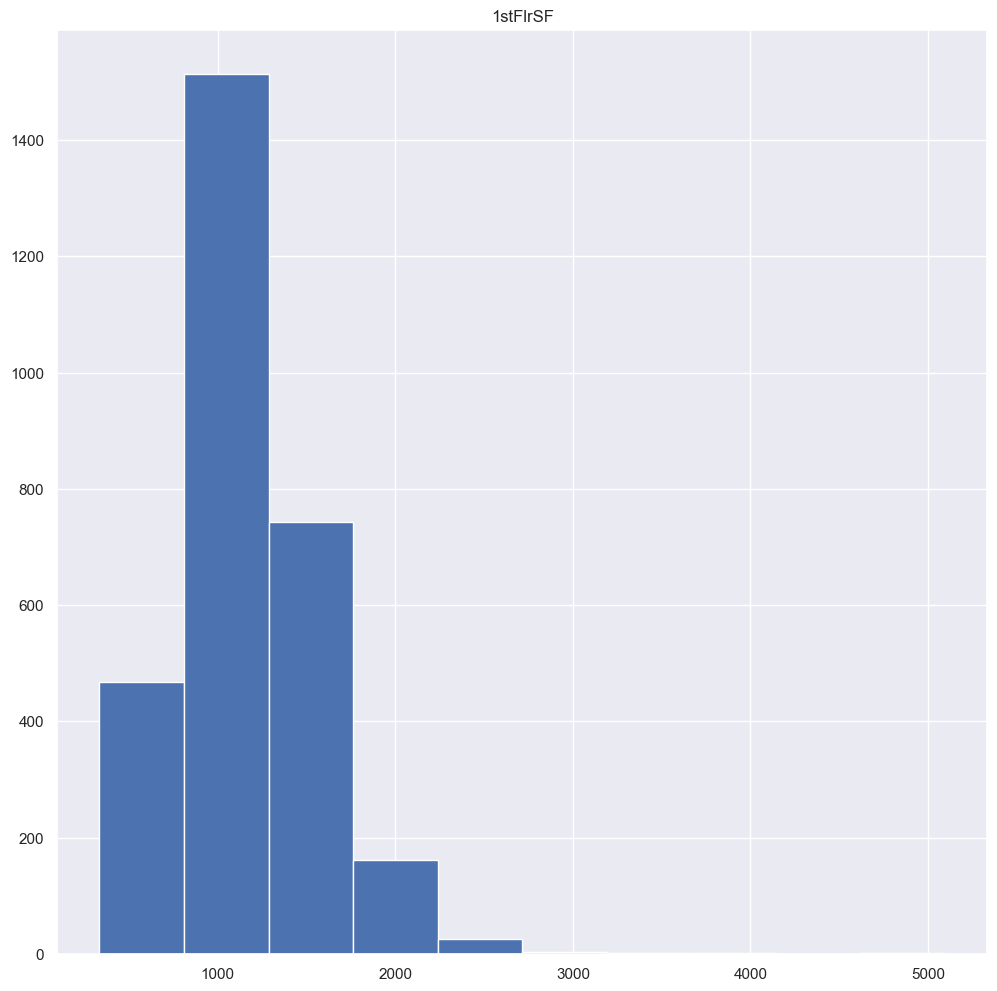

count    2919.000000
mean      336.483727
std       428.701456
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       427.400000
70%       636.000000
80%       770.800000
90%       925.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
######################################


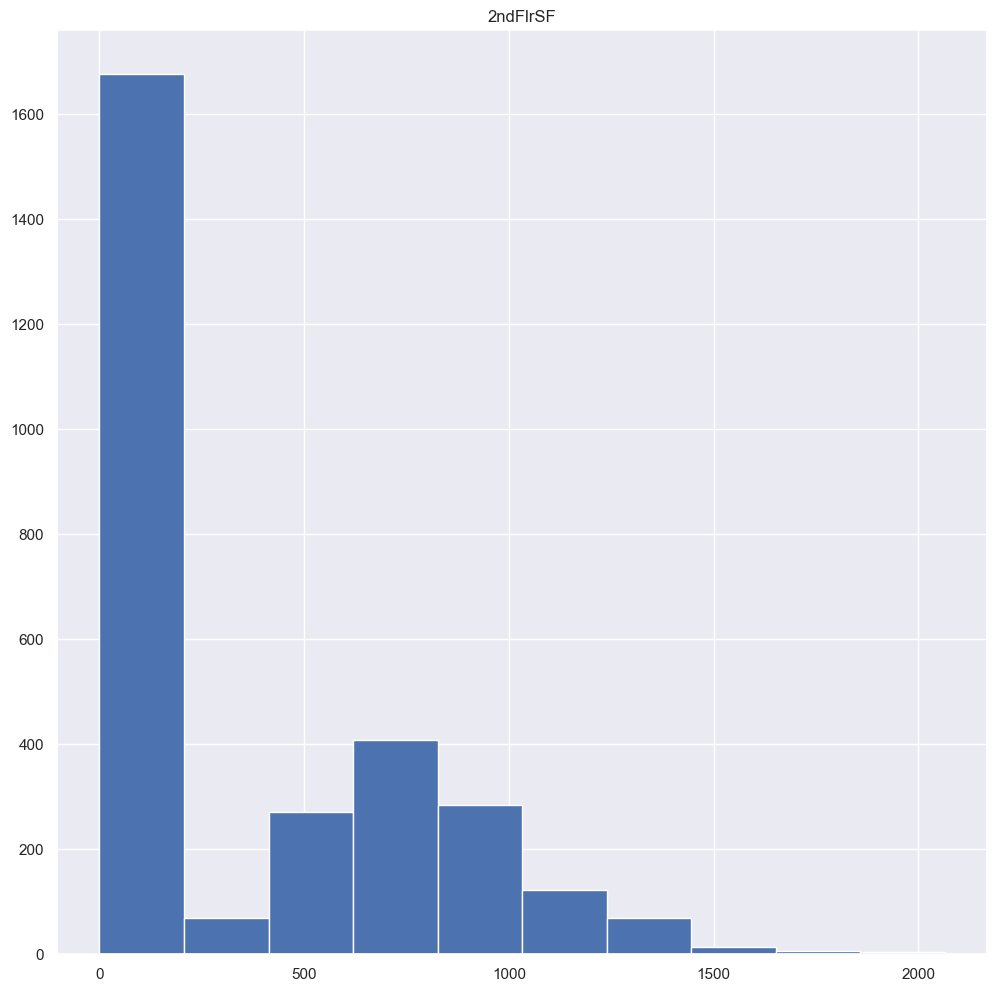

count    2919.000000
mean        4.694416
std        46.396825
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
max      1064.000000
Name: LowQualFinSF, dtype: float64
######################################


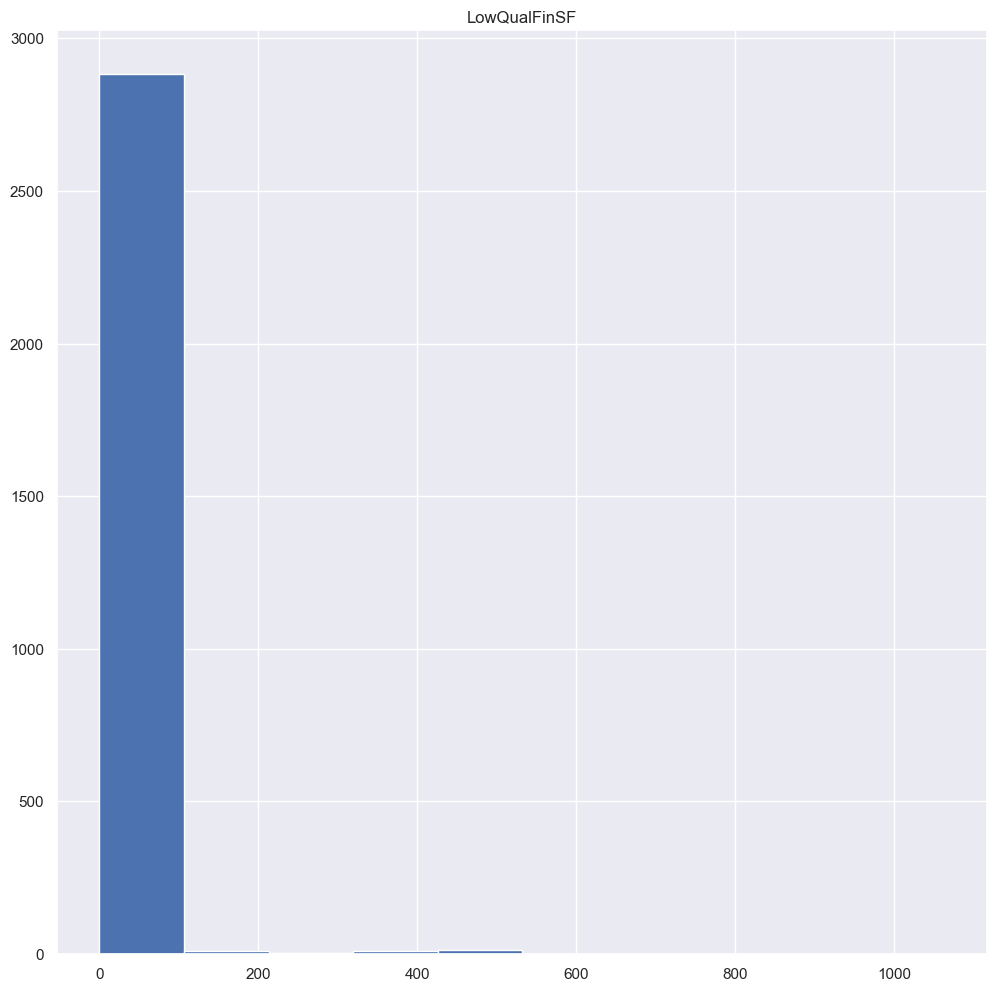

count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
1%        675.420000
10%       923.800000
20%      1064.600000
30%      1200.000000
40%      1329.200000
50%      1444.000000
60%      1560.000000
70%      1680.000000
80%      1838.400000
90%      2153.200000
max      5642.000000
Name: GrLivArea, dtype: float64
######################################


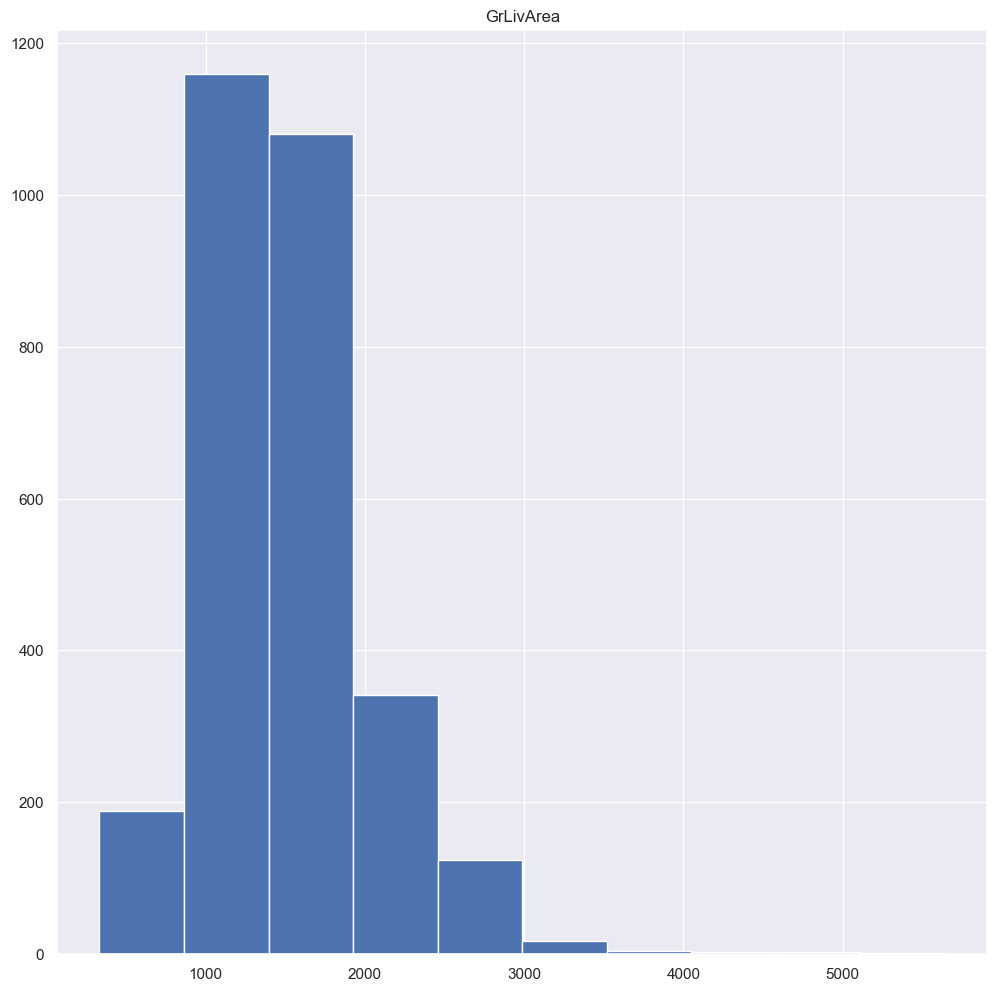

count    2919.000000
mean        6.451524
std         1.569379
min         2.000000
1%          4.000000
10%         5.000000
20%         5.000000
30%         6.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%         8.000000
max        15.000000
Name: TotRmsAbvGrd, dtype: float64
######################################


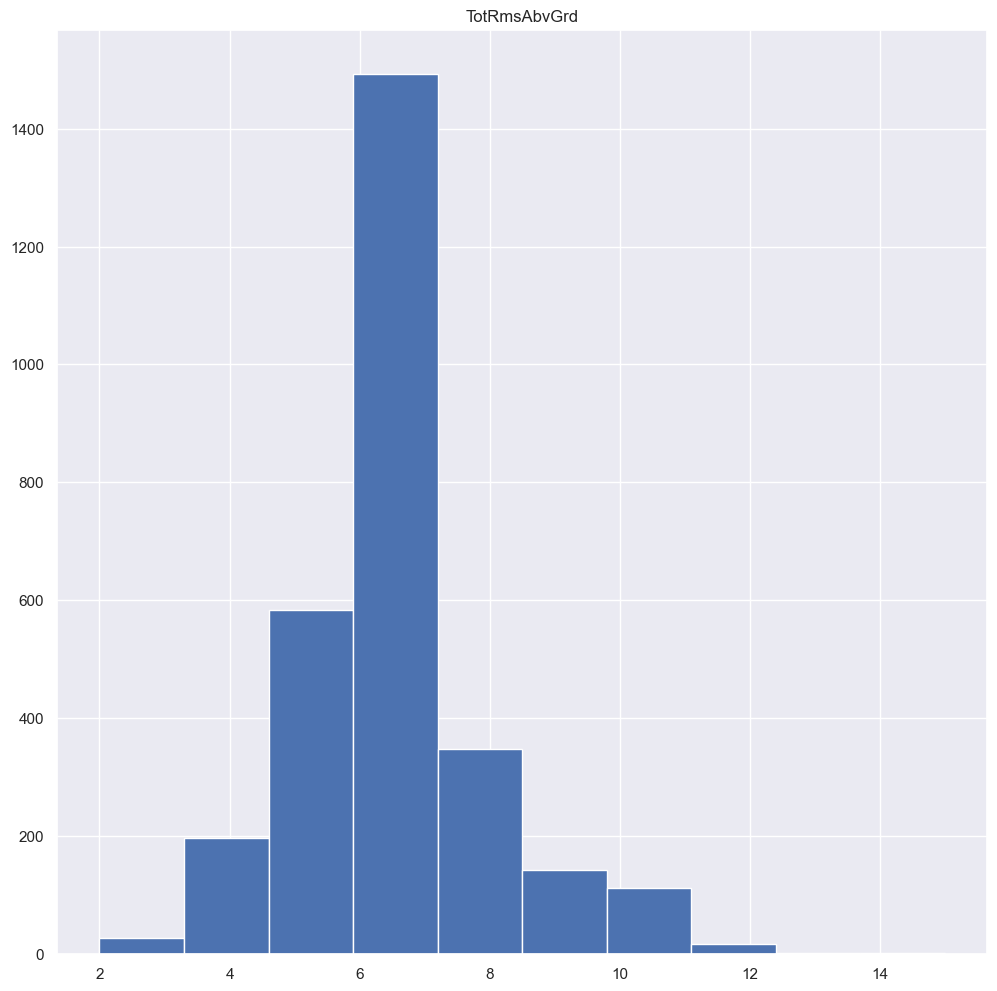

count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
1%       1915.000000
10%      1941.000000
20%      1957.000000
30%      1964.000000
40%      1972.000000
50%      1979.000000
60%      1993.000000
70%      1999.000000
80%      2004.000000
90%      2006.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64
######################################


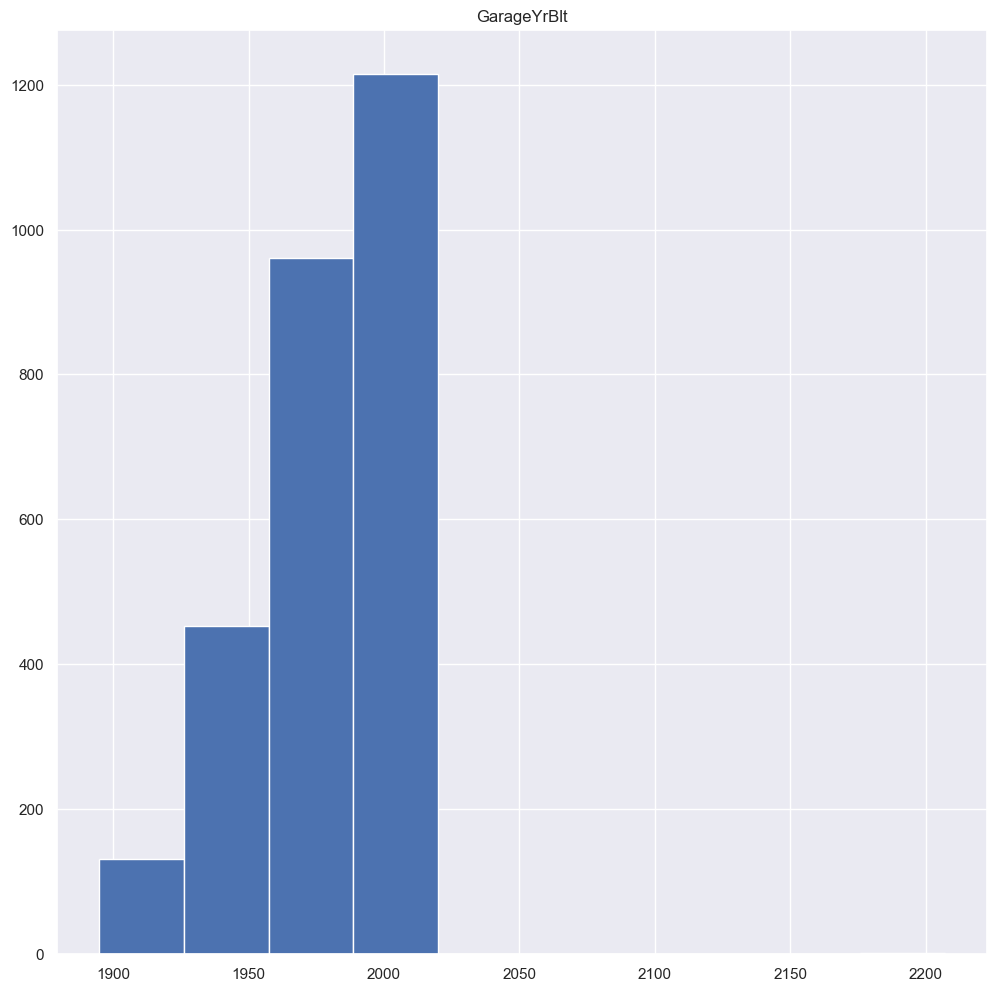

count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
1%          0.000000
10%       240.000000
20%       296.000000
30%       379.000000
40%       440.000000
50%       480.000000
60%       513.000000
70%       560.900000
80%       621.000000
90%       758.000000
max      1488.000000
Name: GarageArea, dtype: float64
######################################


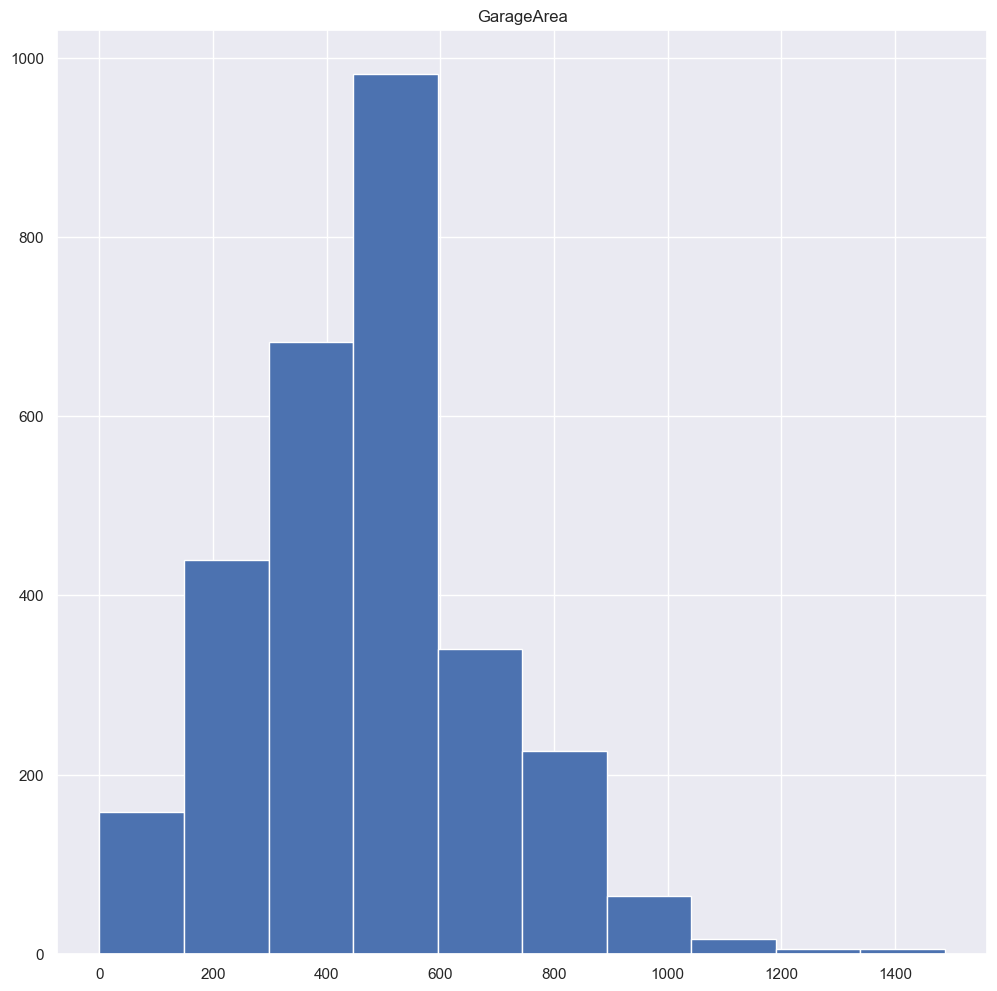

count    2919.000000
mean       93.709832
std       126.526589
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       100.000000
70%       144.000000
80%       192.000000
90%       257.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64
######################################


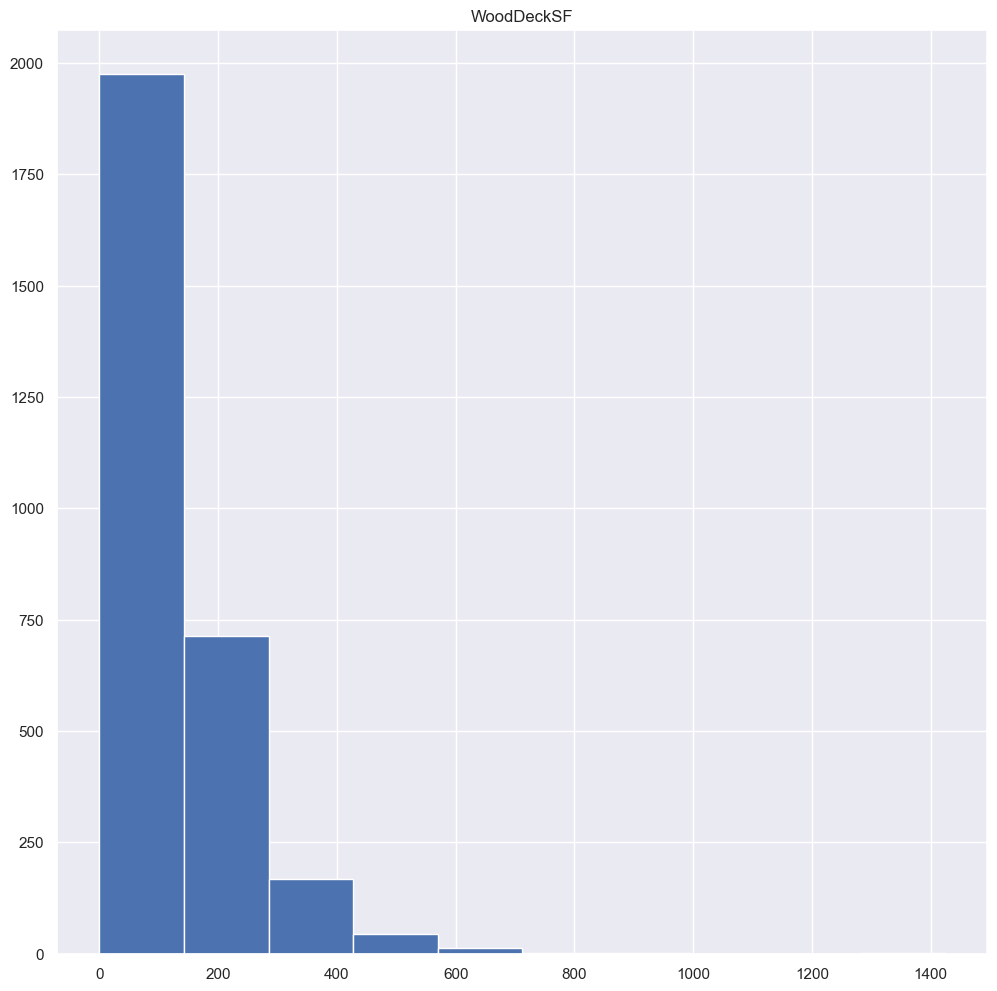

count    2919.000000
mean       47.486811
std        67.575493
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%        26.000000
60%        40.000000
70%        58.000000
80%        85.000000
90%       131.200000
max       742.000000
Name: OpenPorchSF, dtype: float64
######################################


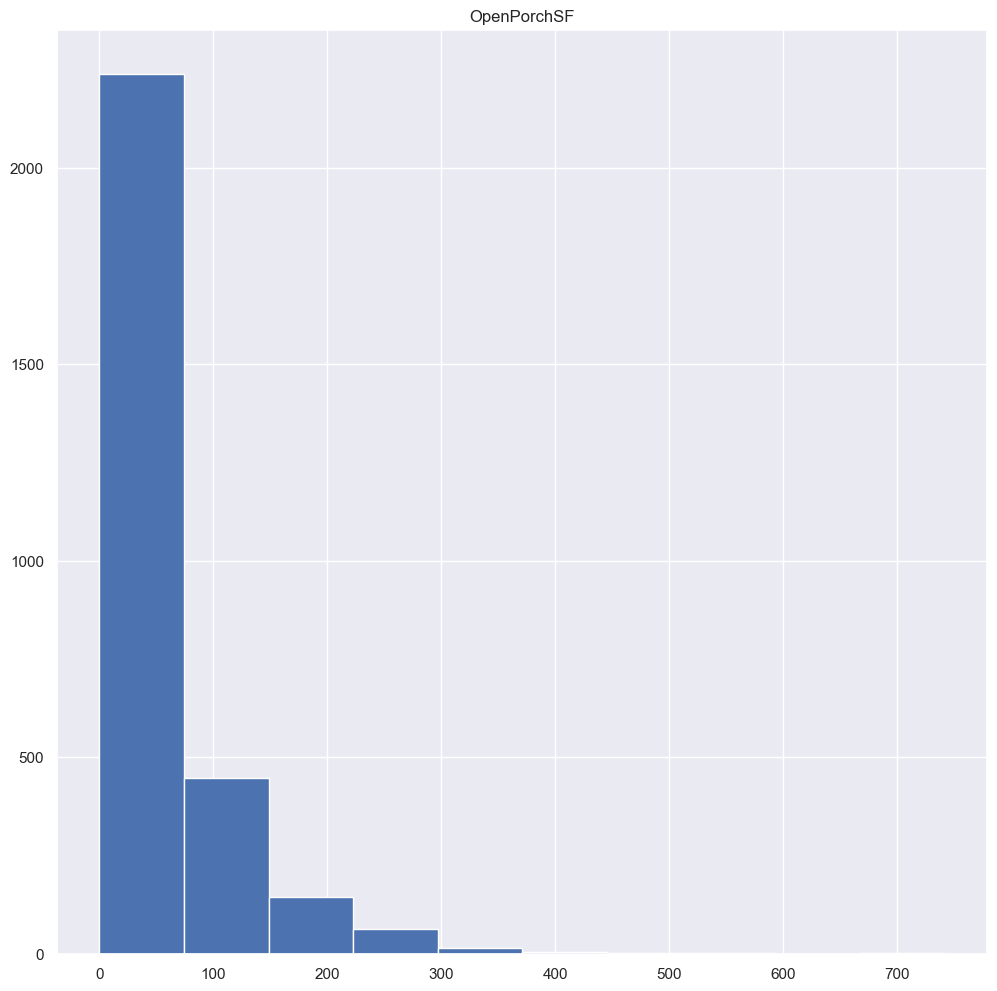

count    2919.000000
mean       23.098321
std        64.244246
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       112.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64
######################################


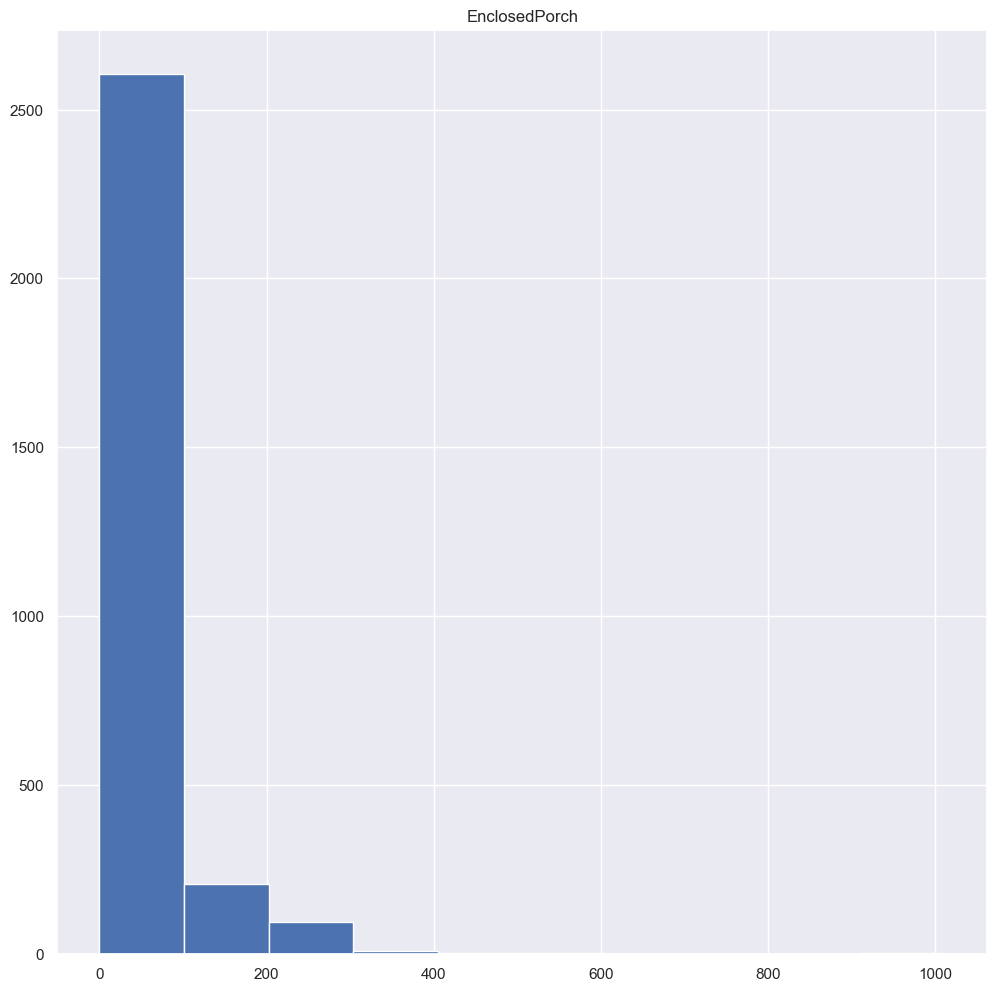

count    2919.000000
mean        2.602261
std        25.188169
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64
######################################


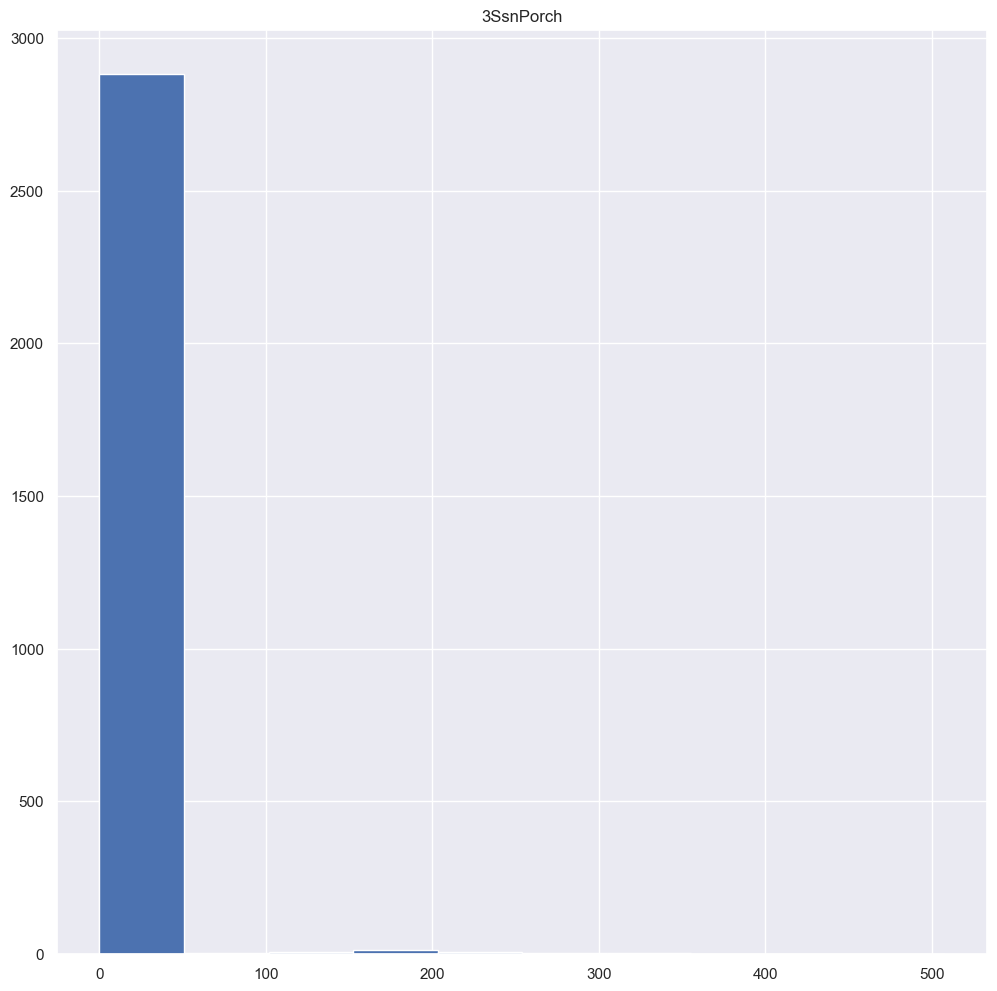

count    2919.000000
mean       16.062350
std        56.184365
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64
######################################


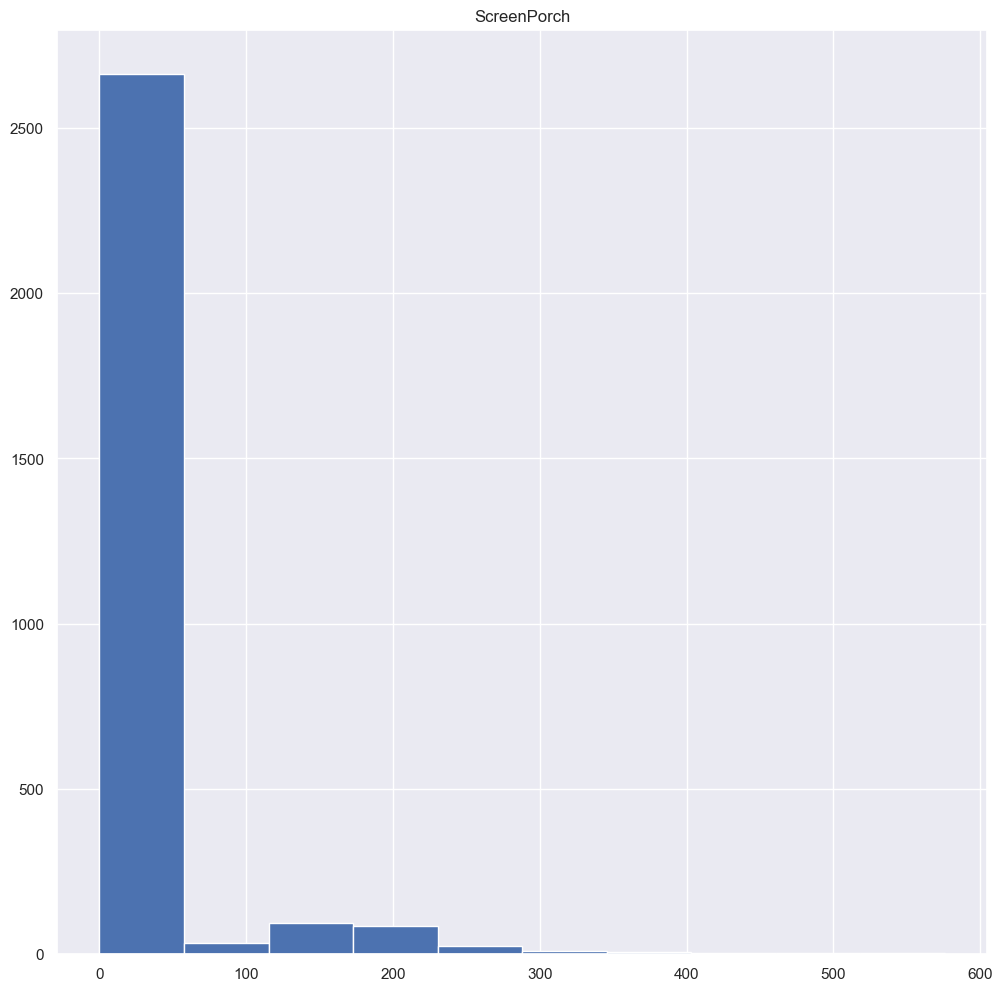

count    2919.000000
mean        2.251799
std        35.663946
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
max       800.000000
Name: PoolArea, dtype: float64
######################################


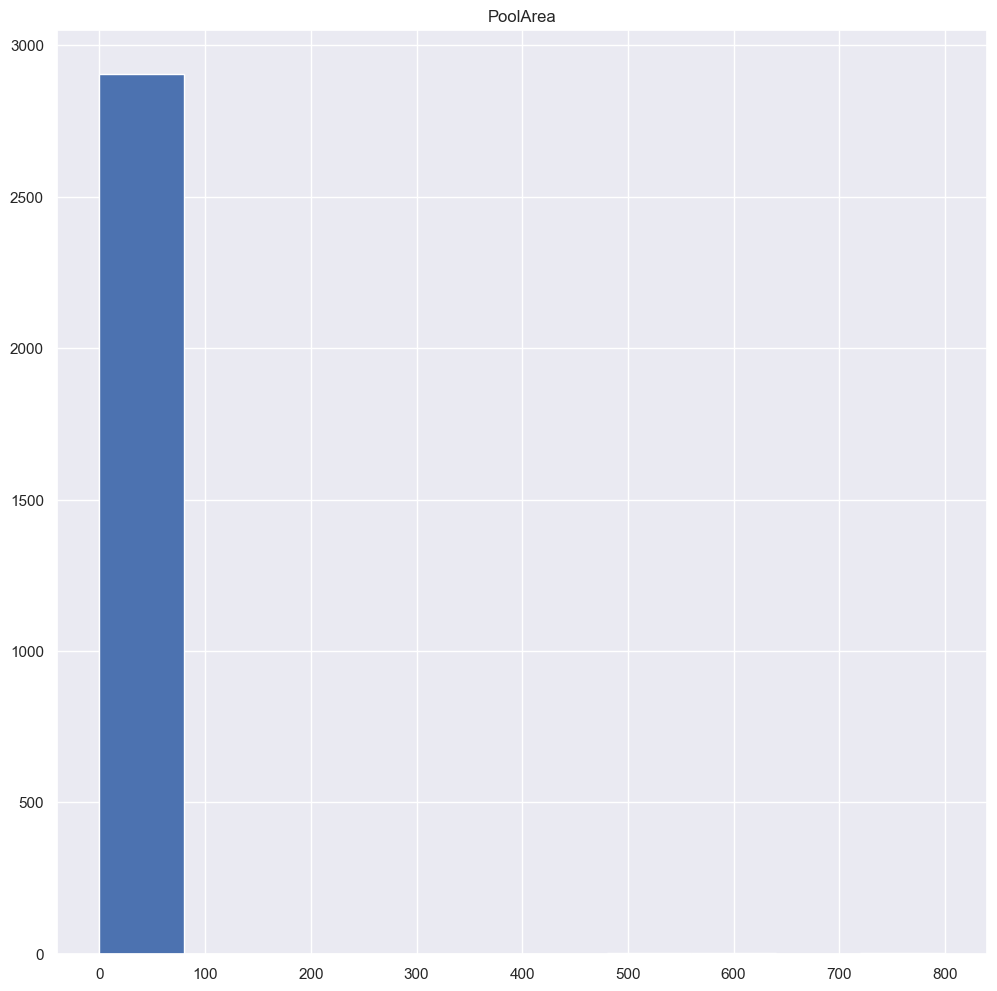

count     2919.000000
mean        50.825968
std        567.402211
min          0.000000
1%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64
######################################


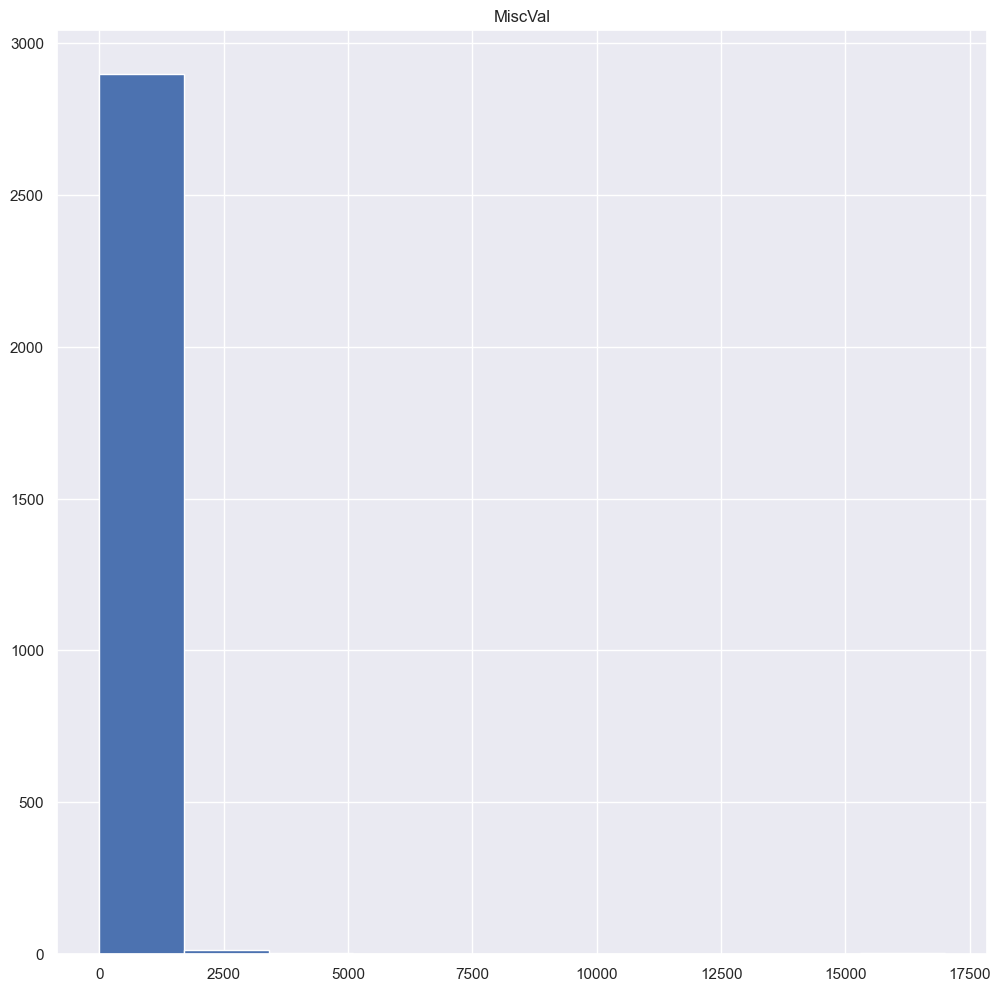

count    2919.000000
mean        6.213087
std         2.714762
min         1.000000
1%          1.000000
10%         3.000000
20%         4.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%        10.000000
max        12.000000
Name: MoSold, dtype: float64
######################################


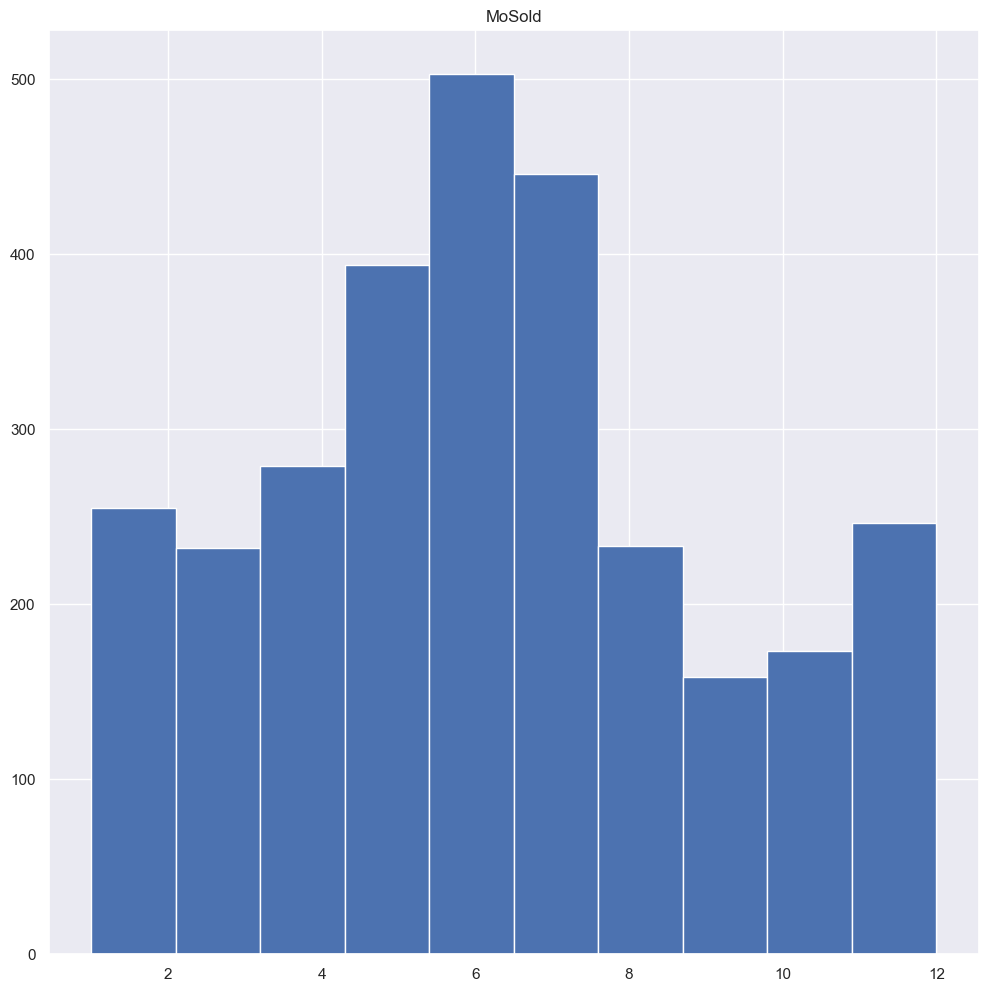

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
1%        61815.970000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
max      755000.000000
Name: SalePrice, dtype: float64
######################################


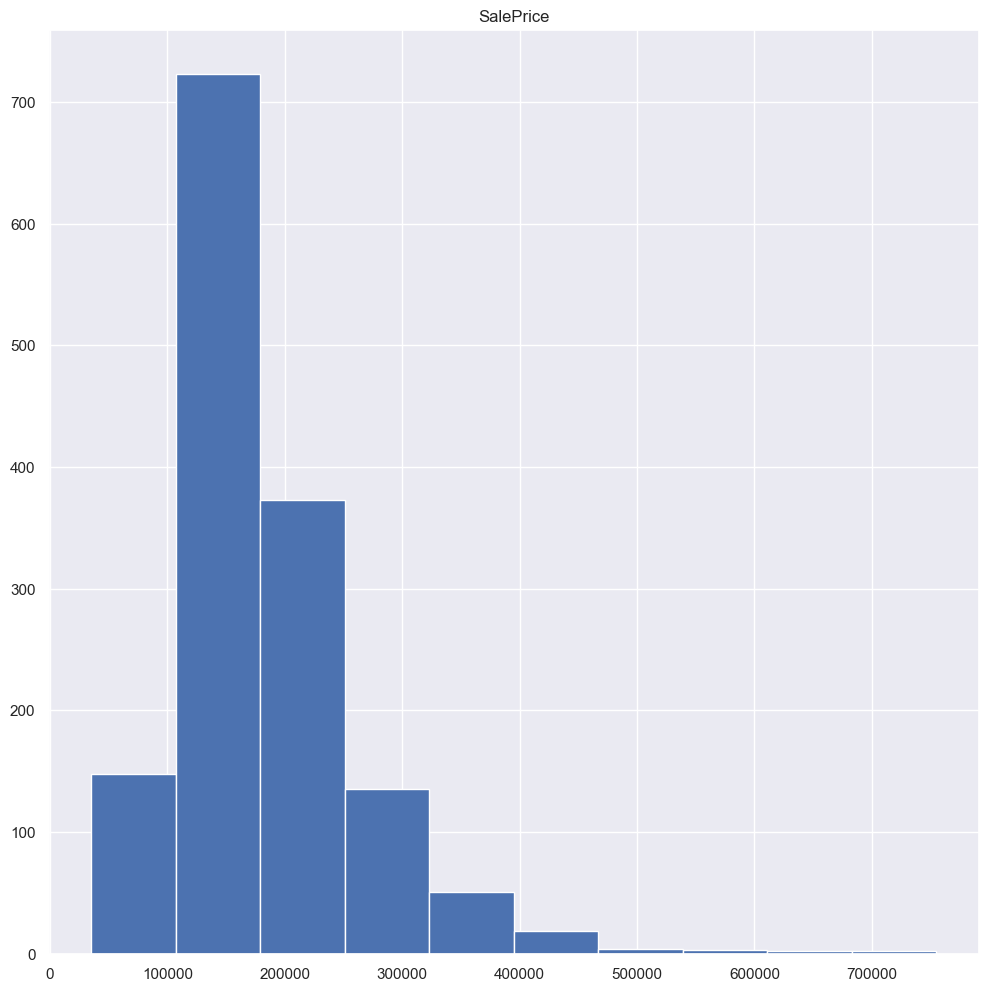

count    2919.000000
mean        5.564577
std         1.113131
min         1.000000
1%          3.000000
10%         5.000000
20%         5.000000
30%         5.000000
40%         5.000000
50%         5.000000
60%         5.000000
70%         6.000000
80%         6.000000
90%         7.000000
max         9.000000
Name: OverallCond, dtype: float64
######################################


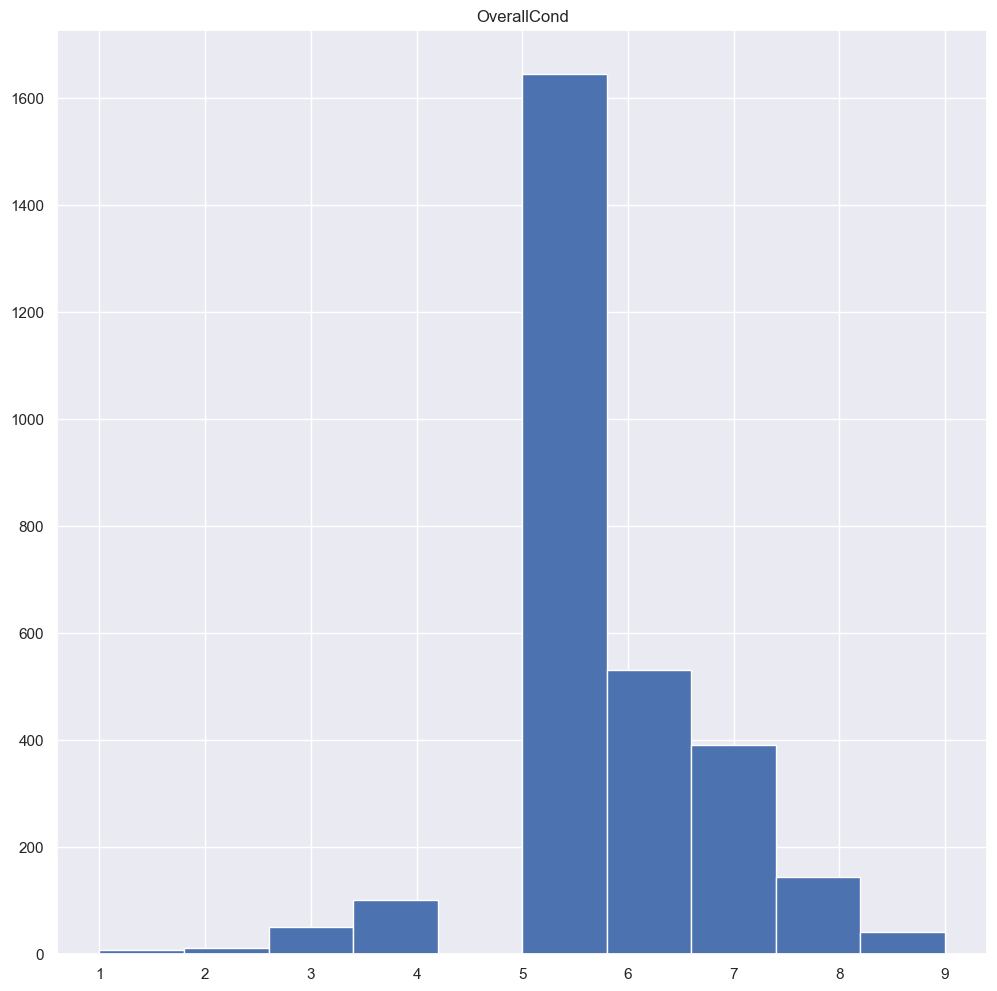

count    2917.000000
mean        0.429894
std         0.524736
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         1.000000
70%         1.000000
80%         1.000000
90%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
######################################


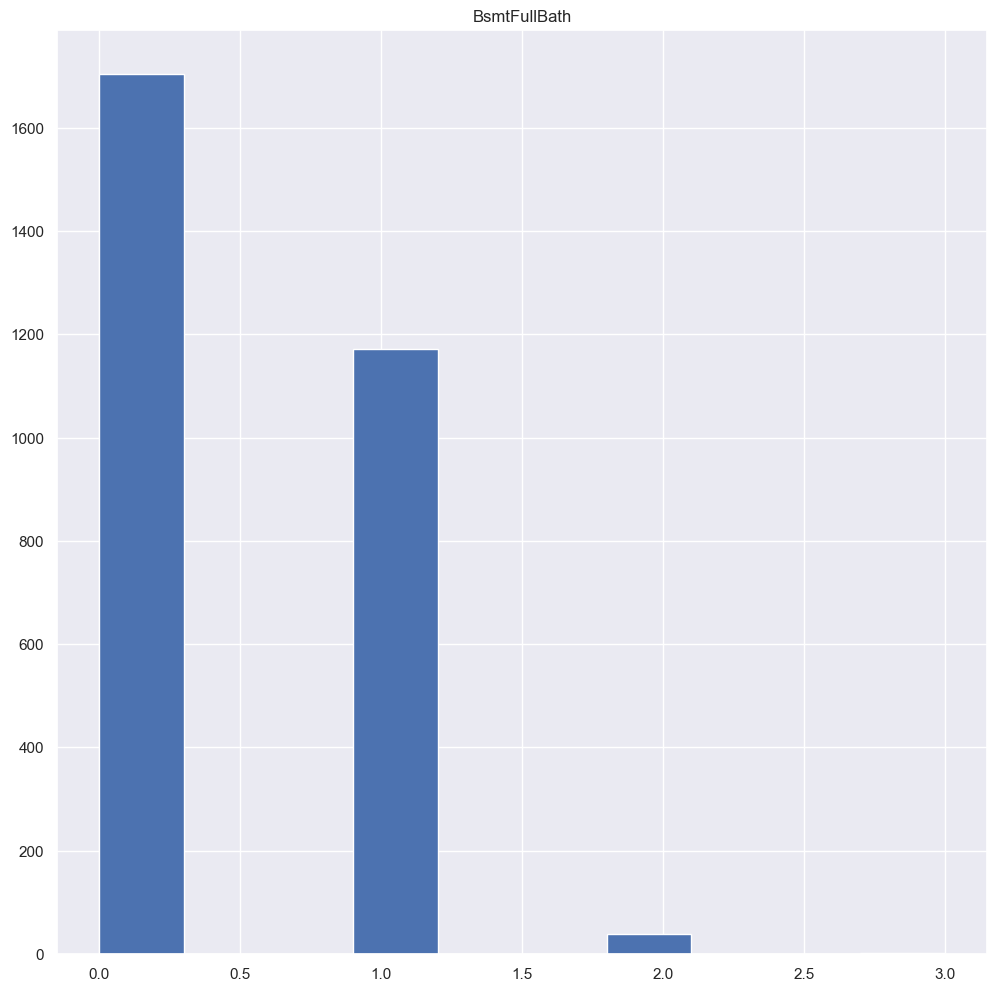

count    2917.000000
mean        0.061364
std         0.245687
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
######################################


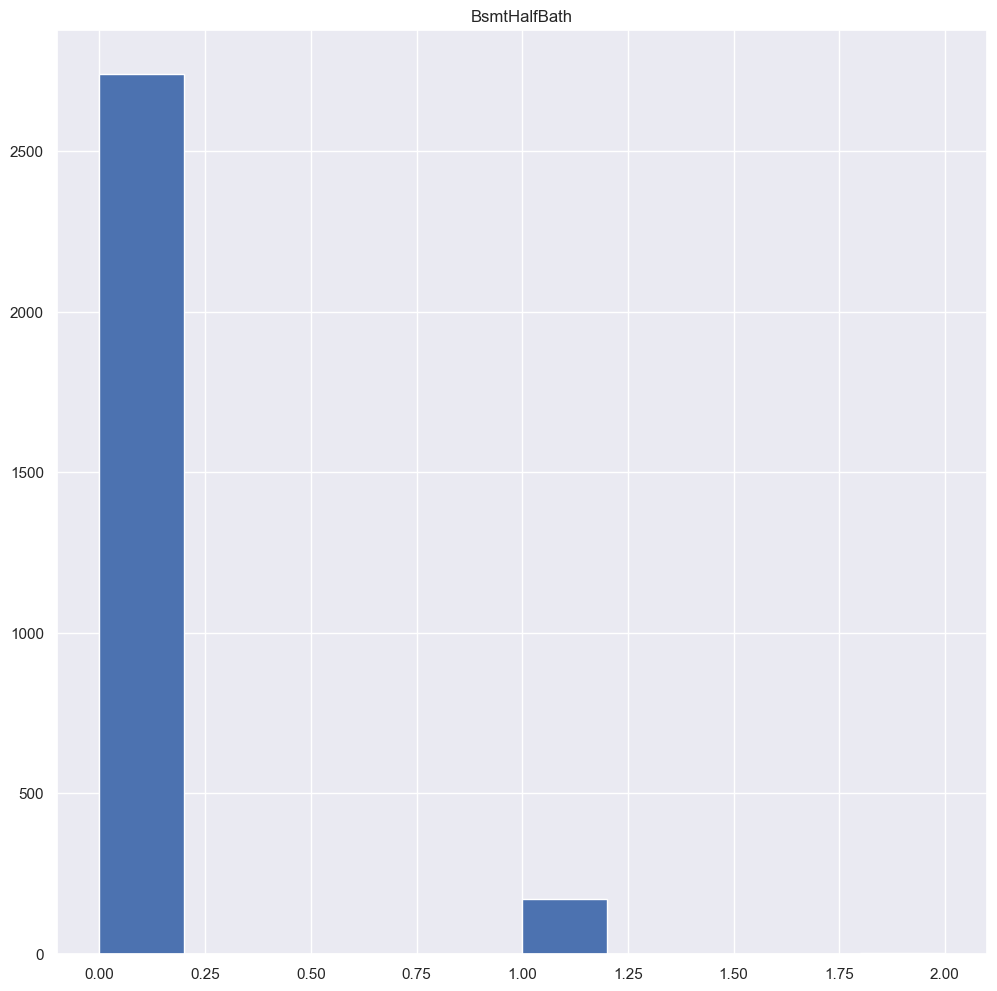

count    2919.000000
mean        1.568003
std         0.552969
min         0.000000
1%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         2.000000
60%         2.000000
70%         2.000000
80%         2.000000
90%         2.000000
max         4.000000
Name: FullBath, dtype: float64
######################################


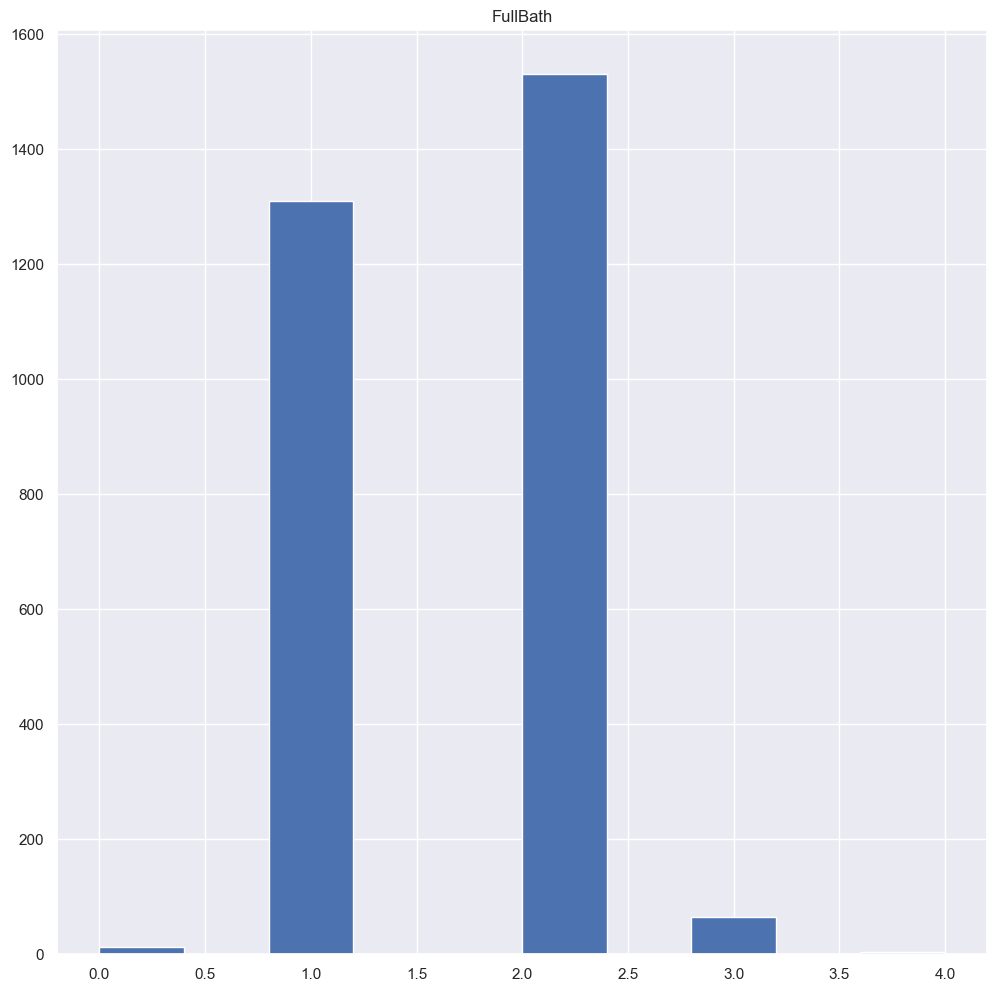

count    2919.000000
mean        0.380267
std         0.502872
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         1.000000
80%         1.000000
90%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
######################################


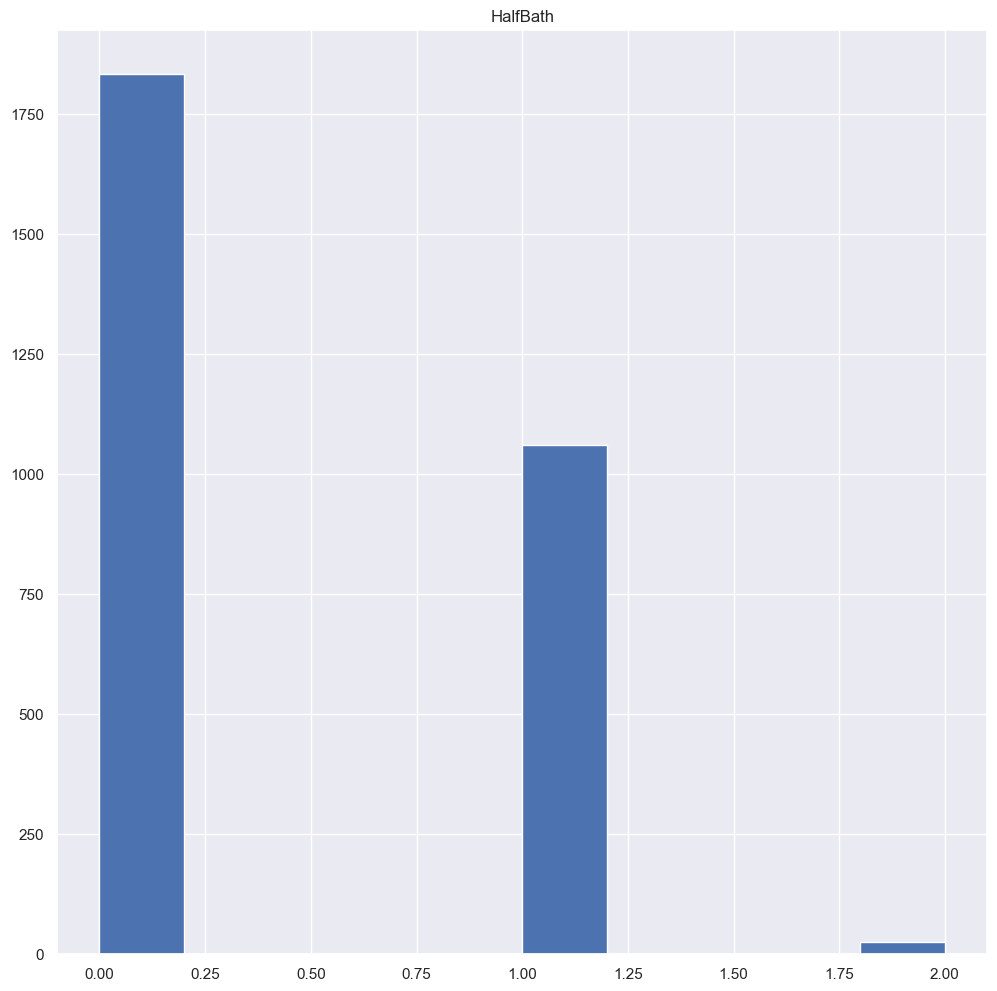

count    2919.000000
mean        2.860226
std         0.822693
min         0.000000
1%          1.000000
10%         2.000000
20%         2.000000
30%         3.000000
40%         3.000000
50%         3.000000
60%         3.000000
70%         3.000000
80%         3.000000
90%         4.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
######################################


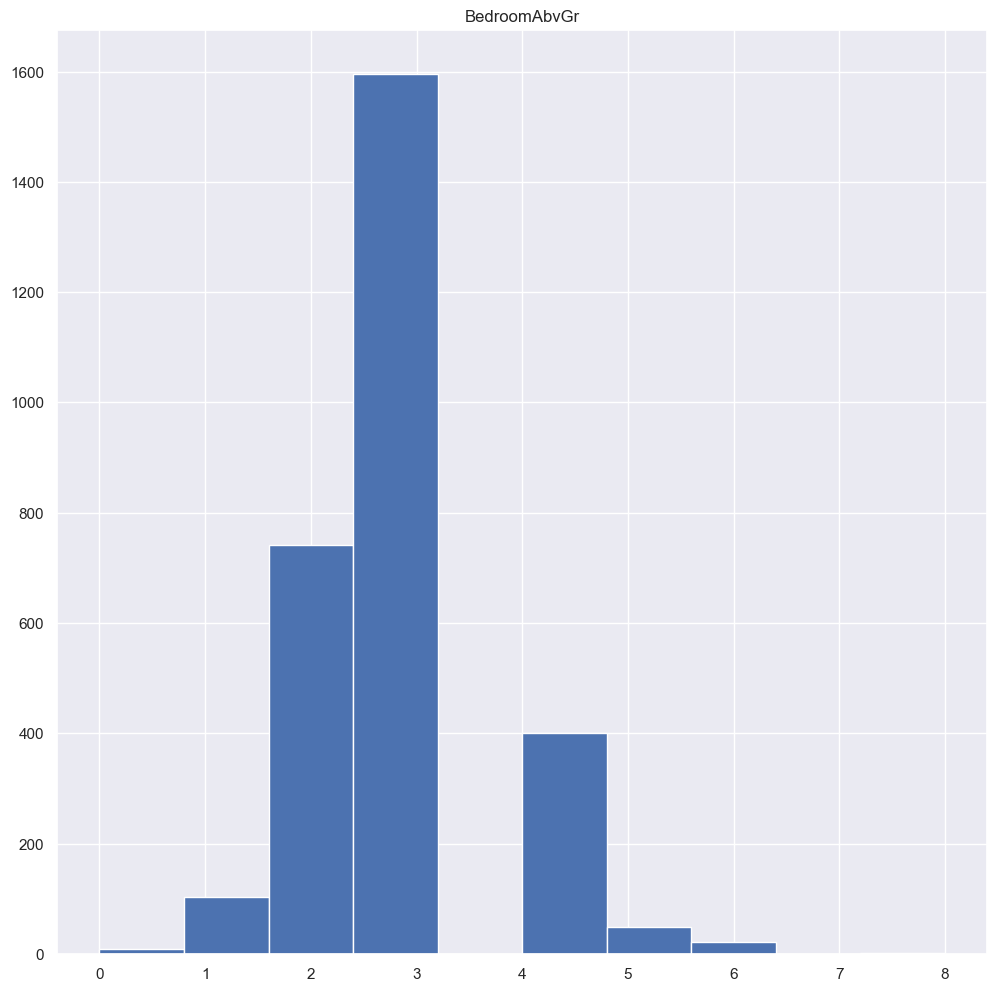

count    2919.000000
mean        1.044536
std         0.214462
min         0.000000
1%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         1.000000
60%         1.000000
70%         1.000000
80%         1.000000
90%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64
######################################


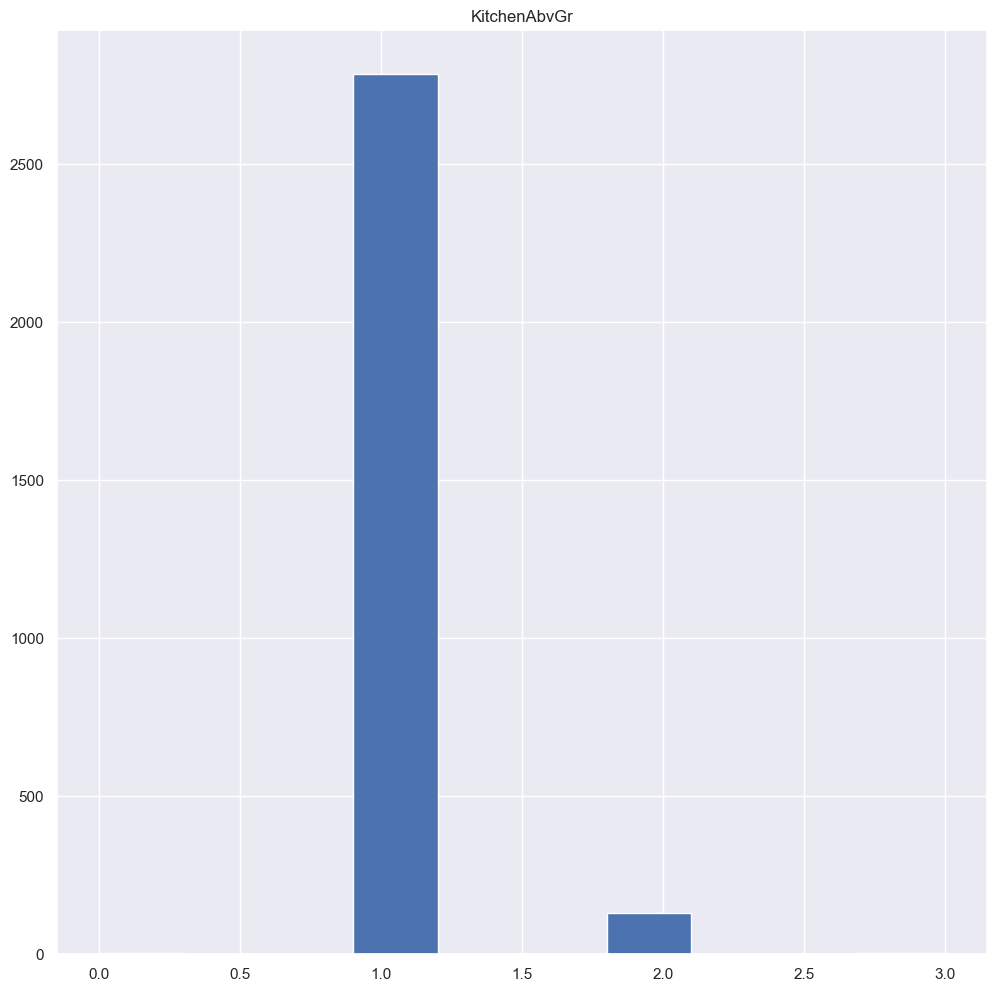

count    2919.000000
mean        0.597122
std         0.646129
min         0.000000
1%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         1.000000
60%         1.000000
70%         1.000000
80%         1.000000
90%         1.000000
max         4.000000
Name: Fireplaces, dtype: float64
######################################


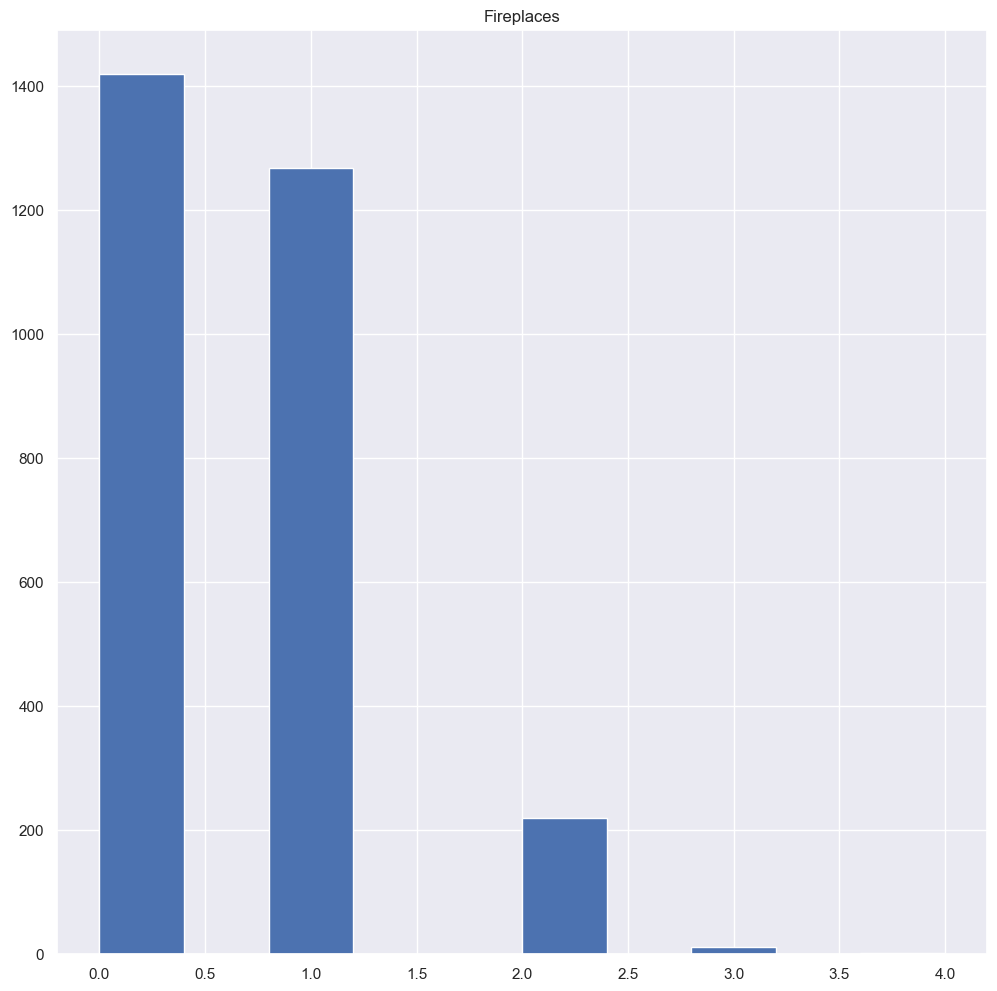

count    2918.000000
mean        1.766621
std         0.761624
min         0.000000
1%          0.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         2.000000
50%         2.000000
60%         2.000000
70%         2.000000
80%         2.000000
90%         3.000000
max         5.000000
Name: GarageCars, dtype: float64
######################################


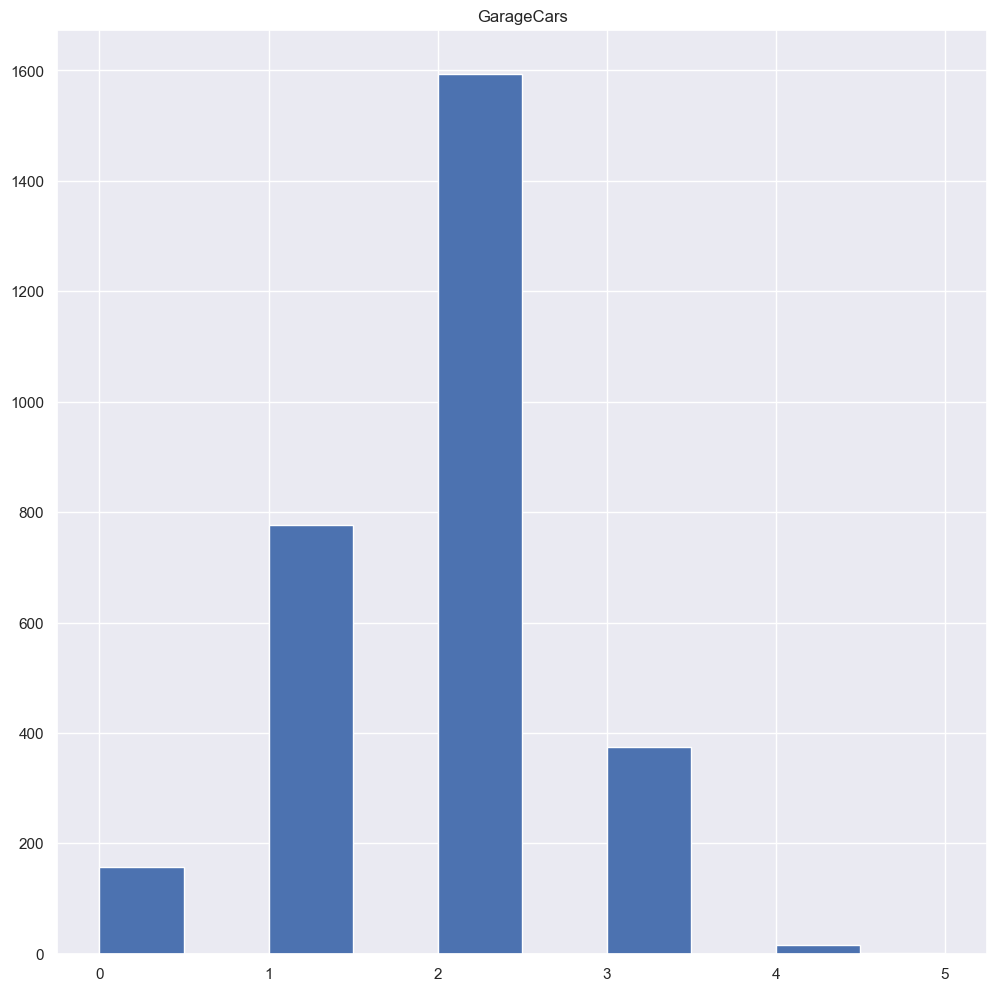

count    2919.000000
mean     2007.792737
std         1.314964
min      2006.000000
1%       2006.000000
10%      2006.000000
20%      2006.000000
30%      2007.000000
40%      2007.000000
50%      2008.000000
60%      2008.000000
70%      2009.000000
80%      2009.000000
90%      2010.000000
max      2010.000000
Name: YrSold, dtype: float64
######################################


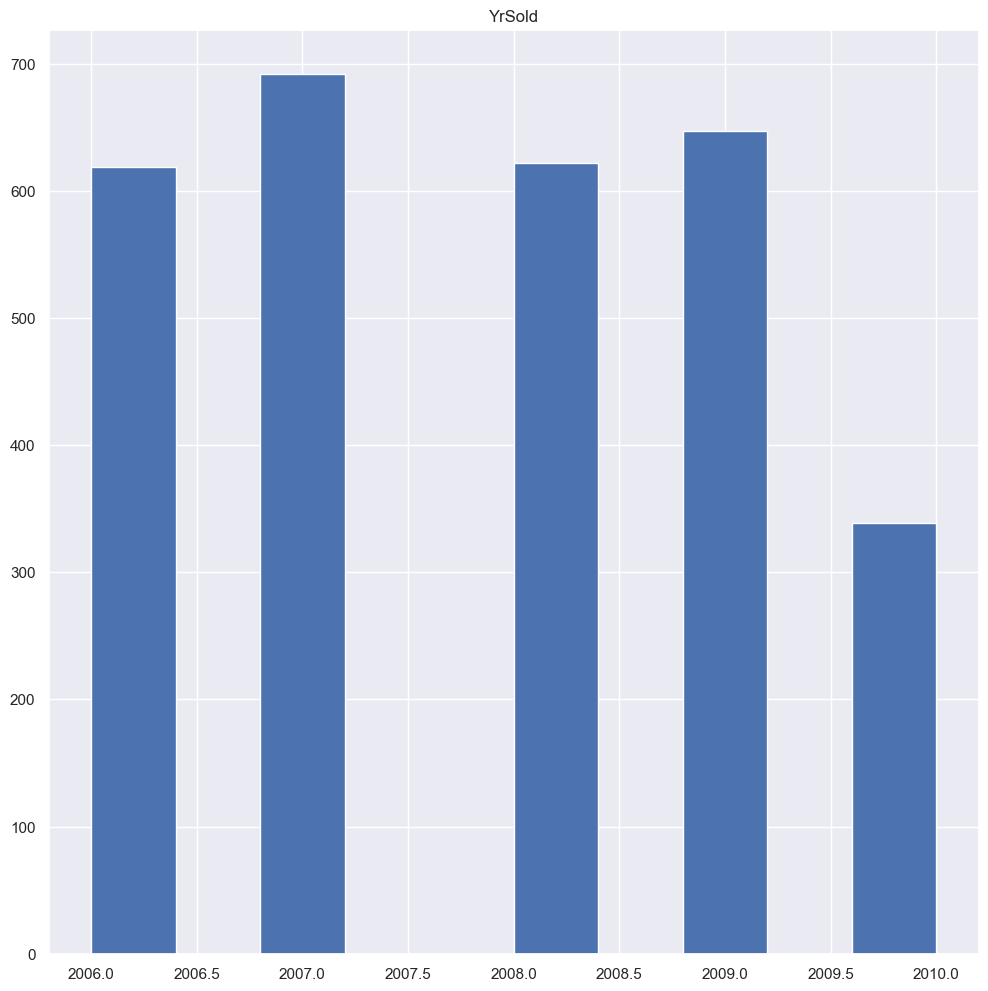

In [131]:
# except id
num_cols = [col for col in num_cols if col not in "Id"]

for col in num_cols:
    eda.num_summary(df, col_name = col, plot = True)

Adım 5: Kategorik değişkenler ile hedef değişken incelemesini yapınız.

In [132]:
for col in cat_cols:
    eda.target_summary_with_cat_cols(df, target_col = "SalePrice", cat_col = col)

            TARGET_MEAN
MSZoning               
C (all)    74528.000000
FV        214014.061538
RH        131558.375000
RL        191004.994787
RM        126316.830275
################################
          TARGET_MEAN
Street               
Grvl    130190.500000
Pave    181130.538514
################################
         TARGET_MEAN
Alley               
Grvl   122219.080000
Pave   168000.585366
################################
            TARGET_MEAN
LotShape               
IR1       206101.665289
IR2       239833.365854
IR3       216036.500000
Reg       164754.818378
################################
               TARGET_MEAN
LandContour               
Bnk          143104.079365
HLS          231533.940000
Low          203661.111111
Lvl          180183.746758
################################
            TARGET_MEAN
Utilities              
AllPub     180950.95682
NoSeWa     137500.00000
################################
             TARGET_MEAN
LotConfig               
Corner    

Adım 6: Aykırı gözlem var mı inceleyiniz.

C:\Users\htcso\AppData\Local\Temp\ipykernel_10904\2477011241.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="RdBu")


<Axes: >

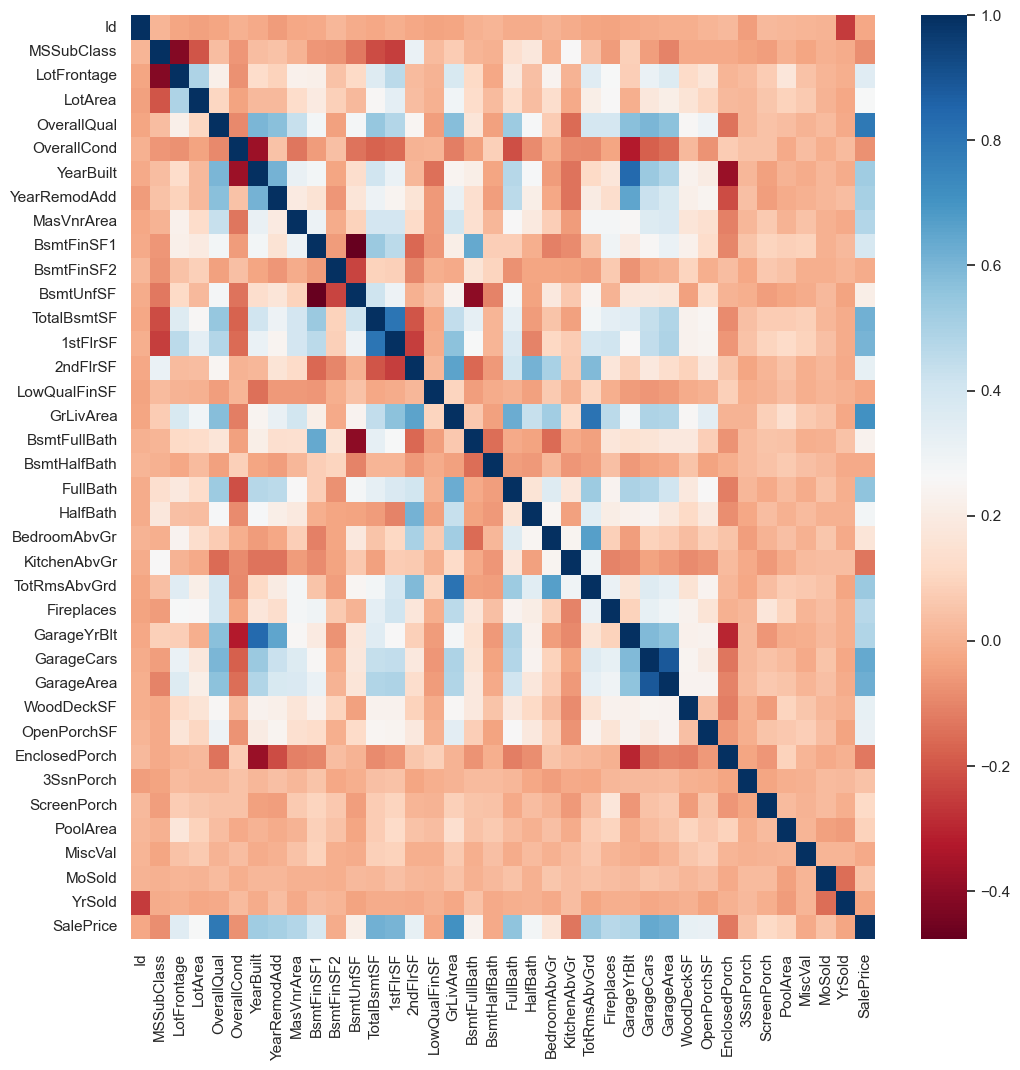

In [133]:
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(df.corr(), cmap="RdBu")

In [134]:
drop_cols = eda.high_corr_cols(df, plot = False, corr_th = 0.9)
drop_cols

C:\Users\htcso\OneDrive\Masaüstü\pythonProject\machine_learning\case_studies\EDA.py:75: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframe.corr()


[]

In [135]:
import outliers

In [136]:
for col in num_cols:
    print(col, outliers.check_outlier(df, col_name = col))

MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 True
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch False
PoolArea True
MiscVal True
MoSold False
SalePrice False
OverallCond False
BsmtFullBath False
BsmtHalfBath False
FullBath False
HalfBath False
BedroomAbvGr False
KitchenAbvGr False
Fireplaces False
GarageCars False
YrSold False


In [137]:
for col in num_cols:
    outliers.replace_with_thresholds(df, col)

In [138]:
for col in num_cols:
    print(col, outliers.check_outlier(df, col_name = col))

MSSubClass False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
PoolArea False
MiscVal False
MoSold False
SalePrice False
OverallCond False
BsmtFullBath False
BsmtHalfBath False
FullBath False
HalfBath False
BedroomAbvGr False
KitchenAbvGr False
Fireplaces False
GarageCars False
YrSold False


Adım 7: Eksik gözlem var mı inceleyiniz.

In [139]:
df.isnull().sum().sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
                ... 
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
HeatingQC          0
Length: 81, dtype: int64

In [140]:
df.shape

(2919, 81)

In [141]:
import missing_values as mv

In [142]:
na_cols = mv.missing_values_table(df, na_name = True)

              n_miss  ratio
PoolQC          2909  99.66
MiscFeature     2814  96.40
Alley           2721  93.22
Fence           2348  80.44
SalePrice       1459  49.98
FireplaceQu     1420  48.65
LotFrontage      486  16.65
GarageCond       159   5.45
GarageYrBlt      159   5.45
GarageFinish     159   5.45
GarageQual       159   5.45
GarageType       157   5.38
BsmtExposure      82   2.81
BsmtCond          82   2.81
BsmtQual          81   2.77
BsmtFinType2      80   2.74
BsmtFinType1      79   2.71
MasVnrType        24   0.82
MasVnrArea        23   0.79
MSZoning           4   0.14
Functional         2   0.07
BsmtHalfBath       2   0.07
BsmtFullBath       2   0.07
Utilities          2   0.07
KitchenQual        1   0.03
TotalBsmtSF        1   0.03
BsmtUnfSF          1   0.03
GarageCars         1   0.03
GarageArea         1   0.03
BsmtFinSF2         1   0.03
BsmtFinSF1         1   0.03
Exterior2nd        1   0.03
Exterior1st        1   0.03
SaleType           1   0.03
Electrical         1

In [143]:
mv.missing_vs_target(df, target = "SalePrice", na_columns = na_cols)

                   TARGET_MEAN  COUNT
MSZoning_NA_FLAG                     
0                 180921.19589   1460
1                          NaN      0


                       TARGET_MEAN  COUNT
LotFrontage_NA_FLAG                      
0                    180770.480433   1201
1                    181620.073359    259


                 TARGET_MEAN  COUNT
Alley_NA_FLAG                      
0              142845.912088     91
1              183452.131483   1369


                    TARGET_MEAN  COUNT
Utilities_NA_FLAG                     
0                  180921.19589   1460
1                           NaN      0


                      TARGET_MEAN  COUNT
Exterior1st_NA_FLAG                     
0                    180921.19589   1460
1                             NaN      0


                      TARGET_MEAN  COUNT
Exterior2nd_NA_FLAG                     
0                    180921.19589   1460
1                             NaN      0


                      TARGET_MEAN  COUNT

In [144]:
# # Bazı değişkenlerdeki boş değerler evin o özelliğe sahip olmadığını ifade etmektedir.
no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
              "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

for col in no_cols:
    df[col].fillna("No",inplace=True)

In [145]:
df.isnull().sum().sort_values(ascending=False)

SalePrice      1459
LotFrontage     486
GarageYrBlt     159
MasVnrType       24
MasVnrArea       23
               ... 
MSSubClass        0
CentralAir        0
1stFlrSF          0
2ndFlrSF          0
HeatingQC         0
Length: 81, dtype: int64

Görev 2: Feature Engineering
----

Adım 1: Eksik ve aykırı gözlemler için gerekli işlemleri yapınız.

In [146]:
from sklearn.impute import KNNImputer, SimpleImputer

In [147]:
num_cols = [col for col in num_cols if col not in "SalePrice"]

knn_imputer = KNNImputer(n_neighbors=5)
df[num_cols] = knn_imputer.fit_transform(df[num_cols])

In [148]:
simple_imputer = imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = simple_imputer.fit_transform(df[cat_cols])

In [149]:
df.isnull().sum().sum()

1459

Adım 2: Rare Encoder uygulayınız.

In [150]:
import rare_analyser as ra

In [152]:
ra.rare_analyser(df, target = "SalePrice", cat_cols = cat_cols)

MSZoning : 5
         COUNT     RATIO    TARGET_MEAN
C (all)     25  0.008565   74528.000000
FV         139  0.047619  214014.061538
RH          26  0.008907  131558.375000
RL        2269  0.777321  191004.994787
RM         460  0.157588  126316.830275


Street : 2
      COUNT     RATIO    TARGET_MEAN
Grvl     12  0.004111  130190.500000
Pave   2907  0.995889  181130.538514


Alley : 3
      COUNT     RATIO    TARGET_MEAN
Grvl    120  0.041110  122219.080000
No     2721  0.932169  183452.131483
Pave     78  0.026721  168000.585366


LotShape : 4
     COUNT     RATIO    TARGET_MEAN
IR1    968  0.331620  206101.665289
IR2     76  0.026036  239833.365854
IR3     16  0.005481  216036.500000
Reg   1859  0.636862  164754.818378


LandContour : 4
     COUNT     RATIO    TARGET_MEAN
Bnk    117  0.040082  143104.079365
HLS    120  0.041110  231533.940000
Low     60  0.020555  203661.111111
Lvl   2622  0.898253  180183.746758


Utilities : 2
        COUNT     RATIO   TARGET_MEAN
AllPub   2918  0

       COUNT     RATIO    TARGET_MEAN
GdPrv    118  0.040425  178927.457627
GdWo     112  0.038369  140379.314815
MnPrv    329  0.112710  148751.089172
MnWw      12  0.004111  134286.363636
No      2348  0.804385  187596.837998


MiscFeature : 5
      COUNT     RATIO    TARGET_MEAN
Gar2      5  0.001713  170750.000000
No     2814  0.964029  182046.410384
Othr      4  0.001370   94000.000000
Shed     95  0.032545  151187.612245
TenC      1  0.000343  250000.000000


SaleType : 9
       COUNT     RATIO    TARGET_MEAN
COD       87  0.029805  143973.255814
CWD       12  0.004111  210600.000000
Con        5  0.001713  269600.000000
ConLD     26  0.008907  138780.888889
ConLI      9  0.003083  200390.000000
ConLw      8  0.002741  143700.000000
New      239  0.081877  274945.418033
Oth        7  0.002398  119850.000000
WD      2526  0.865365  173401.836622


SaleCondition : 6
         COUNT     RATIO    TARGET_MEAN
Abnorml    190  0.065091  146526.623762
AdjLand     12  0.004111  104125.0000

In [155]:
df = ra.rare_encoder(df, rare_perc = 0.01)

In [168]:
ra.rare_analyser(df, target = "SalePrice", cat_cols = cat_cols)

MSZoning : 4
      COUNT     RATIO    TARGET_MEAN
FV      139  0.047619  214014.061538
RL     2269  0.777321  191004.994787
RM      460  0.157588  126316.830275
Rare     51  0.017472  109623.615385


Street : 2
      COUNT     RATIO    TARGET_MEAN
Pave   2907  0.995889  181130.538514
Rare     12  0.004111  130190.500000


Alley : 3
      COUNT     RATIO    TARGET_MEAN
Grvl    120  0.041110  122219.080000
No     2721  0.932169  183452.131483
Pave     78  0.026721  168000.585366


LotShape : 4
      COUNT     RATIO    TARGET_MEAN
IR1     968  0.331620  206101.665289
IR2      76  0.026036  239833.365854
Rare     16  0.005481  216036.500000
Reg    1859  0.636862  164754.818378


LandContour : 4
     COUNT     RATIO    TARGET_MEAN
Bnk    117  0.040082  143104.079365
HLS    120  0.041110  231533.940000
Low     60  0.020555  203661.111111
Lvl   2622  0.898253  180183.746758


Utilities : 2
        COUNT     RATIO   TARGET_MEAN
AllPub   2918  0.999657  180950.95682
Rare        1  0.000343  137

      COUNT     RATIO    TARGET_MEAN
Fa      124  0.042480  123573.354167
No      159  0.054471  103317.283951
Rare     32  0.010963  202277.500000
TA     2604  0.892086  187489.836003


GarageCond : 4
      COUNT     RATIO    TARGET_MEAN
Fa       74  0.025351  114654.028571
No      159  0.054471  103317.283951
Rare     32  0.010963  145937.222222
TA     2654  0.909215  187885.735294


PavedDrive : 3
   COUNT     RATIO    TARGET_MEAN
N    216  0.073998  115039.122222
P     62  0.021240  132330.000000
Y   2641  0.904762  186433.973881


PoolQC : 2
      COUNT     RATIO    TARGET_MEAN
No     2909  0.996574  180404.663455
Rare     10  0.003426  288138.571429


Fence : 5
       COUNT     RATIO    TARGET_MEAN
GdPrv    118  0.040425  178927.457627
GdWo     112  0.038369  140379.314815
MnPrv    329  0.112710  148751.089172
No      2348  0.804385  187596.837998
Rare      12  0.004111  134286.363636


MiscFeature : 3
      COUNT     RATIO    TARGET_MEAN
No     2814  0.964029  182046.410384
Rare

Adım 3: Yeni değişkenler oluşturunuz.

In [159]:
df["NEW_1st*GrLiv"] = df["1stFlrSF"] * df["GrLivArea"]

df["NEW_Garage*GrLiv"] = (df["GarageArea"] * df["GrLivArea"])

df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", 
                      "GarageCond", "Fence"]].sum(axis = 1)


# Total Floor
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

# Total Finished Basement Area
df["NEW_TotalBsmtFin"] = df.BsmtFinSF1 + df.BsmtFinSF2

# Porch Area
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF

# Total House Area
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF

df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF


# Lot Ratio
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea

df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea

df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea

# MasVnrArea
df["NEW_MasVnrRatio"] = df.MasVnrArea / df.NEW_TotalHouseArea

# Dif Area
df["NEW_DifArea"] = (df.LotArea - df["1stFlrSF"] - df.GarageArea - df.NEW_PorchArea - df.WoodDeckSF)


df["NEW_OverallGrade"] = df["OverallQual"] * df["OverallCond"]


df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt # 17

df["NEW_GarageRestorationAge"] = np.abs(df.GarageYrBlt - df.YearRemodAdd)

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt

C:\Users\htcso\AppData\Local\Temp\ipykernel_10904\3493917783.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",


In [160]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,TotalQual,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold
0,1,60.0,RL,65.0,8450.0,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,No,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,No,No,No,0.0,2.0,2008.0,WD,Normal,208500.0,1463760.0,937080.0,12.0,1710.0,706.0,61.0,2566.0,2566.0,0.202367,0.303669,0.064852,0.076383,6985.0,35.0,0.0,5.0,5.0,0.0,0.0,5.0
1,2,20.0,RL,80.0,9600.0,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Rare,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,No,No,No,0.0,5.0,2007.0,WD,Normal,181500.0,1592644.0,580520.0,14.0,1262.0,978.0,298.0,2524.0,2524.0,0.131458,0.262917,0.047917,0.000000,7282.0,48.0,0.0,31.0,31.0,0.0,0.0,31.0
2,3,60.0,RL,68.0,11250.0,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,No,No,No,0.0,9.0,2008.0,WD,Normal,223500.0,1643120.0,1085888.0,12.0,1786.0,486.0,42.0,2706.0,2706.0,0.158756,0.240533,0.054044,0.059867,9680.0,35.0,1.0,7.0,6.0,0.0,1.0,7.0
3,4,70.0,RL,60.0,9550.0,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,No,No,No,0.0,2.0,2006.0,WD,Abnorml,140000.0,1650037.0,1102314.0,12.0,1717.0,216.0,307.0,2473.0,2473.0,0.179791,0.258953,0.067225,0.000000,7640.0,35.0,55.0,91.0,36.0,83.0,28.0,8.0
4,5,60.0,RL,84.0,14260.0,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,No,No,No,0.0,12.0,2008.0,WD,Normal,250000.0,2516710.0,1837528.0,13.0,2198.0,655.0,276.0,3343.0,3343.0,0.154137,0.234432,0.058626,0.104696,11811.0,40.0,0.0,8.0,8.0,0.0,0.0,8.0


In [161]:
df.shape

(2919, 101)

In [165]:
df.Street.value_counts()

Pave    2907
Rare      12
Name: Street, dtype: int64

In [166]:
df.Alley.value_counts()

No      2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [167]:
df.Utilities.value_counts()

AllPub    2918
Rare         1
Name: Utilities, dtype: int64

In [169]:
# ultra rare and cardinal
drop_list = ["Street", "Alley", "LandContour", "Utilities", 
             "LandSlope","Heating", "PoolQC", "MiscFeature",
             "Neighborhood", "RoofMatl", "Condition2", "CentralAir"]

df.drop(drop_list, axis=1, inplace=True)

Adım 4: Encoding işlemlerini gerçekleştiriniz.

In [176]:
cat_cols, num_cols, cat_but_car = eda.grab_col_names(df, cat_th = 10, car_th = 30)

Observations: 2919
Variables: 89
Cat_cols: 42
num_cols: 47
cat_but_car: 0
num_bat_cat: 11


In [178]:
cn = df[cat_cols].select_dtypes(["int64", "float64"]).nunique().index.tolist()
cat_cols = [col for col in cat_cols if col not in cn]
num_cols = num_cols + cn

In [179]:
df = pd.get_dummies(data = df, columns = cat_cols, drop_first = True)

In [180]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,TotalQual,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,MSZoning_RL,MSZoning_RM,MSZoning_Rare,LotShape_IR2,LotShape_Rare,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_No,GarageType_Rare,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_No,GarageQual_Rare,GarageQual_TA,GarageCond_No,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No,Fence_Rare,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare
0,1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,1463760.0,937080.0,12.0,1710.0,706.0,61.0,2566.0,2566.0,0.202367,0.303669,0.064852,0.076383,6985.0,35.0,0.0,5.0,5.0,0.0,0.0,5.0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,1592644.0,580520.0,14.0,1262.0,978.0,298.0,2524.0,2524.0,0.131458,0.262917,0.047917,0.000000,7282.0,48.0,0.0,31.0,31.0,0.0,0.0,31.0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.

Görev 3: Model Kurma
----

Adım 1: Train ve Test verisini ayırınız. (SalePrice değişkeni boş olan değerler test verisidir.)

In [181]:
train = df[df["SalePrice"].notnull()]
test = df[df["SalePrice"].isnull()]

In [182]:
train.shape

(1460, 186)

In [183]:
test.shape

(1459, 186)

Adım 2: Train verisi ile model kurup, model başarısını değerlendiriniz.

In [212]:
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, cross_validate

warnings.filterwarnings('ignore')

In [195]:
X = train.drop(["Id", "SalePrice"], axis=1)
y = train["SalePrice"]

In [196]:
X = MinMaxScaler().fit_transform(X)

In [197]:
models = [('LR', LinearRegression()),
          #("Ridge", Ridge()),
          #("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
          # ("CatBoost", CatBoostRegressor(verbose=False))]

In [198]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 387929630676925.1 (LR) 
RMSE: 47806.8326 (ElasticNet) 
RMSE: 41762.4174 (KNN) 
RMSE: 41255.8981 (CART) 
RMSE: 29148.7432 (RF) 
RMSE: 81120.1614 (SVR) 
RMSE: 26344.3989 (GBM) 
RMSE: 30673.7166 (XGBoost) 
RMSE: 28847.4564 (LightGBM) 


In [199]:
y.mean()

180921.19589041095

Adım 3: Hiperparemetre optimizasyonu gerçekleştiriniz.

In [200]:
gbm_params = {
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 8, 10],
    "n_estimators": [100, 500, 1000],
    "subsample": [1, 0.5, 0.7]
}

lgbm_params = {"learning_rate": [0.1, 0.01],
               "n_estimators":[100 ,300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

rf_params = {
    "max_depth": [5, 8, None],
    "max_features": [3, 5, 7, "auto"],
    "min_samples_split": [2, 5, 8, 15, 20],
    "n_estimators": [100, 200, 500]
}

xgb_params = {
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 8, 5, None],
    "n_estimators": [100, 500, 1000],
    "colsample_bytree": [1, 0.5, None]
}

In [201]:
new_models = [("GBM", GradientBoostingRegressor(), gbm_params),
             ("LightGBM", LGBMRegressor(), lgbm_params),
             ("RF", RandomForestRegressor(), rf_params),
             ("XGBoost", XGBRegressor(objective='reg:squarederror'), xgb_params)]

In [213]:
params = {}

for name, model, params in new_models:
    print(f"########## {name} ##########")
    cv_results = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'))
    rmse = round(np.sqrt(-cv_results["test_neg_mean_squared_error"]).mean(), 4)
    r2 = round(cv_results["test_r2"].mean(), 4)
    print(f"Before RMSE: {rmse}")
    print(f"Before R2: {r2}")
        
    gs_best = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=False).fit(X, y)
    final_model = model.set_params(**gs_best.best_params_)
    params[name] = gs_best.best_params_

    cv_results = cross_validate(final_model, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'))
    rmse = round(np.sqrt(-cv_results["test_neg_mean_squared_error"]).mean(), 4)
    r2 = round(cv_results["test_r2"].mean(), 4)
    print(f"After RMSE: {rmse}")
    print(f"After R2: {r2}")

########## GBM ##########
Before RMSE: 25895.6232
Before R2: 0.8924
After RMSE: 26859.2575
After R2: 0.8845
########## LightGBM ##########
Before RMSE: 28847.4564
Before R2: 0.8662
After RMSE: 28033.3381
After R2: 0.874
########## RF ##########
Before RMSE: 29508.6262
Before R2: 0.86
After RMSE: 29125.9023
After R2: 0.8646
########## XGBoost ##########
Before RMSE: 30673.7166
Before R2: 0.8498
After RMSE: 26243.2425
After R2: 0.8897


In [214]:
best_params = params["XGBoost"]
best_params

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 1000}

In [218]:
gbm_model = XGBRegressor(**best_params).fit(X, y)

Adım 4: Değişken önem düzeyini inceleyeniz.

In [222]:
import feature_importance as fi

In [230]:
dff = df.drop(["Id", "SalePrice"], axis=1)

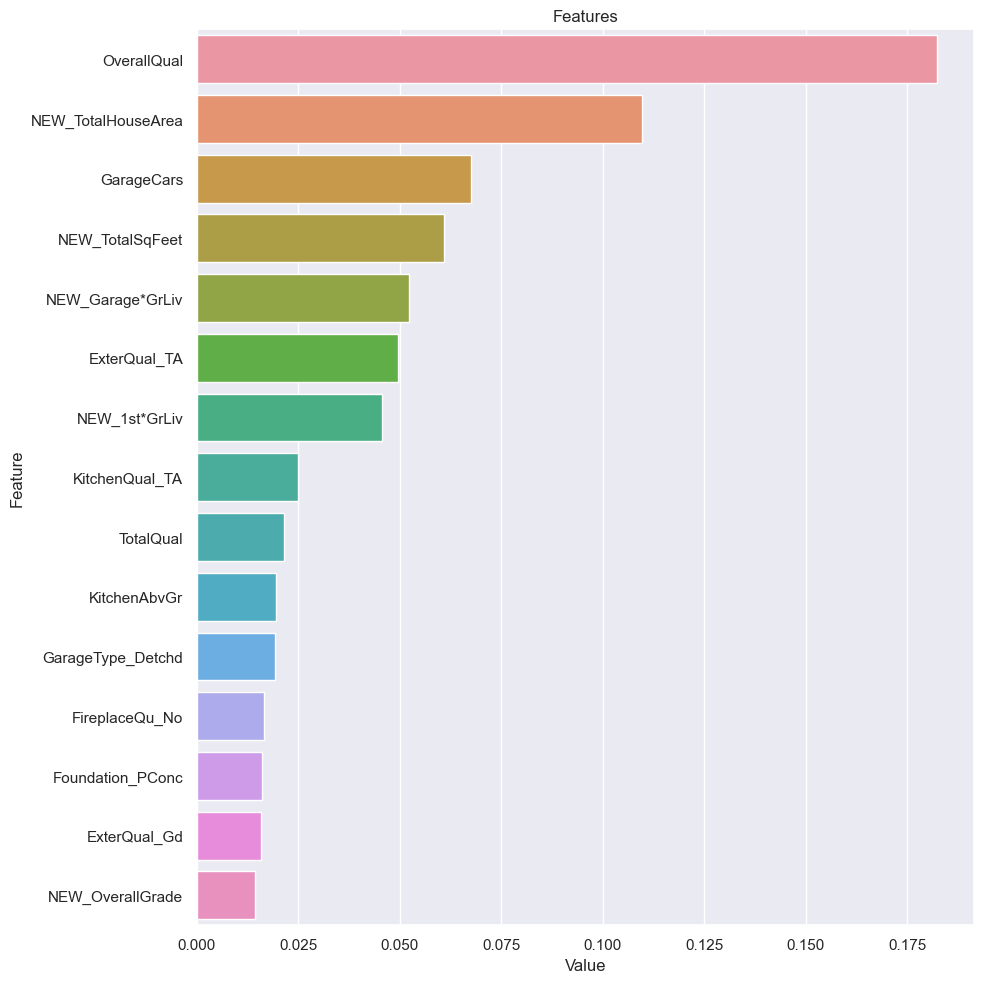

In [235]:
fi.plot_importance(model = gbm_model, features = dff, num = 15, save = False)

Bonus: Test verisinde boş olan salePrice değişkenlerini tahminleyiniz ve Kaggle sayfasına submit etmeye uygun halde bir
dataframe oluşturup sonucunuzu yükleyiniz. (Id, SalePrice)

In [236]:
predictions = gbm_model.predict(test.drop(["Id","SalePrice"], axis=1))
     
dictionary = {"Id": test.index, "SalePrice": predictions}
dfSubmission = pd.DataFrame(dictionary)
dfSubmission.to_csv("housePricePredictions.csv", index=False)